In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import folium
#import requests
import json
import datetime as dt
import seaborn as sns
import matplotlib.dates as mdates

from matplotlib.cbook import boxplot_stats
from pprint import pprint
from glob import glob
from IPython.display import display, Image, IFrame
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from IPython.core.display import HTML
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
from folium import plugins
from sklearn.feature_extraction.text import TfidfVectorizer

path = os.getcwd()

### Projet Olist: Rappel de la problématique
Dans la peau d'un consultant pour l'entreprise <a href=https://olist.com/>Olist</a> spécialisée dans la vente de marketplaces en ligne.<br />
But : opérer une segmentation utilisable par Olist de ses clients pour une utilisation via les campagnes de communication.<br />
Objectifs : 
<ul>
<li>Comprendre les différents types d'utilisateurs à partir des données fournies:
<a href=https://www.kaggle.com/olistbr/brazilian-ecommerce>https://www.kaggle.com/olistbr/brazilian-ecommerce</a></li>
    <li>Fournir à l'équipe marketing une description utilisable de la segmentation réalisée.</li>
    <li>Faire une proposition de contrat de maintenance pour mise à jour de la segmentation dans le temps.</li>
</ul>

### Chargement des données

In [2]:
# 8 fichiers csv issus de BDD + 1 dataset renommé (olist_product_category_name_translation.csv)
Image(url= "https://i.imgur.com/HRhd2Y0.png", width=1100, height=661)

In [3]:
# 9 fichiers csv en tout, préfixés avec le terme 'olist'
filenames = glob(path + '/olist*.csv')
dataframes = [pd.read_csv(file) for file in filenames]
filenames = [filename[:-4] for filename in os.listdir(path) if filename.endswith('.csv') and filename.startswith('olist')]

In [4]:
display(filenames)

['olist_customers_dataset',
 'olist_geolocation_dataset',
 'olist_orders_dataset',
 'olist_order_items_dataset',
 'olist_order_payments_dataset',
 'olist_order_reviews_dataset',
 'olist_products_dataset',
 'olist_product_category_name_translation',
 'olist_sellers_dataset']

In [5]:
df_keys = []
count = 0
for file in filenames:
    if file == 'olist_customers_dataset':
        df_keys.append('customers')
    elif file == 'olist_geolocation_dataset':
        df_keys.append('geolocation')
    elif file == 'olist_orders_dataset':
        df_keys.append('orders')
    elif file == 'olist_order_items_dataset':
        df_keys.append('order_items')
    elif file == 'olist_order_payments_dataset':
        df_keys.append('order_payments')
    elif file == 'olist_order_reviews_dataset':
        df_keys.append('order_reviews')
    elif file == 'olist_products_dataset':
        df_keys.append('products')
    elif file == 'olist_product_category_name_translation':
        df_keys.append('product_category')
    elif file == 'olist_sellers_dataset':
        df_keys.append('sellers')
    else:
        count += 1
if count > 0:
    print("{}/9 fichier(s) n'a/n'ont pas pu être repertorié(s) !".format(count))

In [6]:
display(df_keys)

['customers',
 'geolocation',
 'orders',
 'order_items',
 'order_payments',
 'order_reviews',
 'products',
 'product_category',
 'sellers']

In [7]:
# Si aucun des fichiers n'est manquant, on procède à l'affectation
if count == 0:
    dfs = {k: v for (k, v) in zip(df_keys, dataframes)}

In [8]:
dfs['orders'].head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [9]:
# Affichage de l'ensemble des données disponibles
for name, df in dfs.items():
    print("dfs['{}'] de dimensions : {}".format(name, df.shape))
    display(df.head())

dfs['customers'] de dimensions : (99441, 5)


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

dfs['geolocation'] de dimensions : (1000163, 5)


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

dfs['orders'] de dimensions : (99441, 8)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

dfs['order_items'] de dimensions : (112650, 7)


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

dfs['order_payments'] de dimensions : (103886, 5)


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

dfs['order_reviews'] de dimensions : (100000, 7)


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

dfs['products'] de dimensions : (32951, 9)


product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

dfs['product_category'] de dimensions : (71, 2)


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

dfs['sellers'] de dimensions : (3095, 4)


seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

### Données manquantes (Taux)

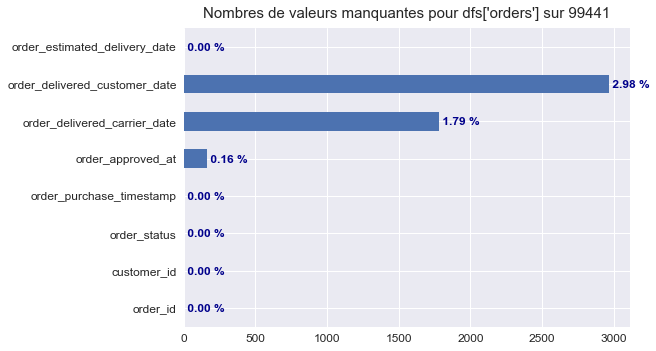

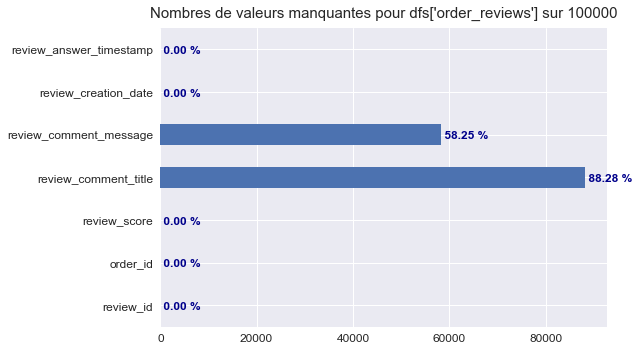

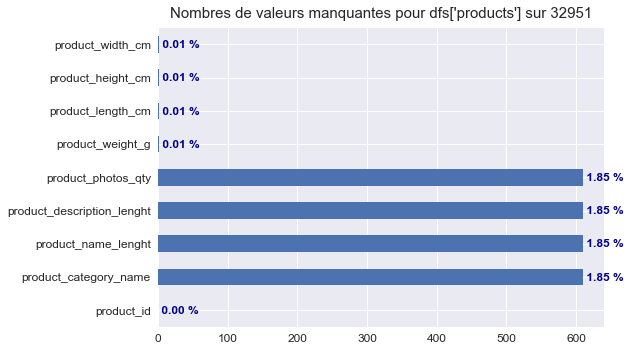

In [10]:
for name, df in dfs.items():

    if np.max(df.isna().sum()) != 0:
        plt.style.use('seaborn')
        df.isna().sum().plot(kind='barh')
        plt.title(
            "Nombres de valeurs manquantes pour dfs['{}'] sur {}".format(name, df.shape[0]),
            fontsize=15,
            pad=10
        )
        for i, v in enumerate(df.isna().sum()):
            plt.text(
                v,
                i - 0.1,
                " {:.2f} %".format((v/df.shape[0])*100),
                color='darkblue',
                fontweight='bold',
                fontsize=12
            )
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

### Exploration et compréhension des relations

#### Utilisateur = customer_id / customer_unique_id ?
Est-ce qu'un "customer_unique_id" peut avoir plusieurs "customer_id" ?

In [11]:
dfs['customers'].head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [12]:
count_duplicate_id = dfs['customers'].groupby('customer_unique_id')['customer_id'].count()

In [13]:
# On peut avoir jusqu'à 17 fois le même customer_id pour un customer_unique_id
count_duplicate_id[count_duplicate_id > 1].cummax()[-1]

17

In [14]:
# On a 6342 customer_id qui ne sont pas uniques.
count_duplicate_id[count_duplicate_id > 1].cumsum()[-1]

6342

In [15]:
# Inspection de valeur typique pour compréhension
dfs['customers'].loc[dfs['customers']['customer_unique_id'] == 'ff36be26206fffe1eb37afd54c70e18b']

customer_id                customer_unique_id  \
13028  13362fc2728edd1397282bb32cf319c1  ff36be26206fffe1eb37afd54c70e18b   
26608  3483b2a9e678865616e7d1b69b28dd4c  ff36be26206fffe1eb37afd54c70e18b   
98551  75c6e03e7206bd1dd59f427c9f75142a  ff36be26206fffe1eb37afd54c70e18b   

       customer_zip_code_prefix customer_city customer_state  
13028                     13057      campinas             SP  
26608                     13057      campinas             SP  
98551                     13057      campinas             SP

In [16]:
# Inspection de valeur typique pour compréhension
dfs['customers'].loc[dfs['customers']['customer_unique_id'] == '004288347e5e88a27ded2bb23747066c']

customer_id                customer_unique_id  \
20023  1b4a75b3478138e99902678254b260f4  004288347e5e88a27ded2bb23747066c   
22066  f6efe5d5c7b85e12355f9d5c3db46da2  004288347e5e88a27ded2bb23747066c   

       customer_zip_code_prefix customer_city customer_state  
20023                     26220   nova iguacu             RJ  
22066                     26220   nova iguacu             RJ

In [17]:
count_duplicate_id = dfs['customers'].groupby('customer_unique_id')['customer_id']

In [18]:
# Inversement il n'y a pas "customer_id" dupliqués
dfs['customers'].loc[dfs['customers'].duplicated(subset=['customer_id'], keep=False)]

Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []

In [19]:
check_customer_id_relation = dfs['customers'].loc[dfs['customers'].duplicated(subset=['customer_unique_id'], keep=False)]

In [20]:
# Il n'y a pas de "customer_id" communs pour plusieurs "customer_unique_id" déjà présents plusieurs fois
check_customer_id_relation.shape[0] == check_customer_id_relation['customer_id'].unique().shape[0]

True

##### Inspection : Recherche d'explications sur l'origine de la multiplication des " customer_id" pour un "customer_unique_id" donné

In [21]:
dfs['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [22]:
# Inspection de valeur typique pour compréhension
dfs['orders'].loc[dfs['orders']['customer_id'] == '75c6e03e7206bd1dd59f427c9f75142a']

order_id                       customer_id  \
22231  81b7c7bbc8ec003eeb67d87441a6a148  75c6e03e7206bd1dd59f427c9f75142a   

      order_status order_purchase_timestamp order_approved_at  \
22231     canceled      2018-08-20 09:03:23               NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
22231                          NaN                           NaN   

      order_estimated_delivery_date  
22231           2018-09-03 00:00:00

In [23]:
# Inspection de valeur typique pour compréhension
dfs['order_payments'].loc[dfs['order_payments']['order_id'] == '81b7c7bbc8ec003eeb67d87441a6a148']

order_id  payment_sequential payment_type  \
68393  81b7c7bbc8ec003eeb67d87441a6a148                   1      voucher   

       payment_installments  payment_value  
68393                     1          92.76

In [24]:
# Inspection de valeur typique pour compréhension
dfs['orders'].loc[dfs['orders']['customer_id'] == '3483b2a9e678865616e7d1b69b28dd4c']

order_id                       customer_id  \
79490  47282cfe5747c1c19920f090e491d285  3483b2a9e678865616e7d1b69b28dd4c   

      order_status order_purchase_timestamp order_approved_at  \
79490     canceled      2018-08-23 12:38:08               NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
79490                          NaN                           NaN   

      order_estimated_delivery_date  
79490           2018-09-06 00:00:00

In [25]:
# Inspection de valeur typique pour compréhension
dfs['order_payments'].loc[dfs['order_payments']['order_id'] == '47282cfe5747c1c19920f090e491d285']

order_id  payment_sequential payment_type  \
98135  47282cfe5747c1c19920f090e491d285                   1      voucher   

       payment_installments  payment_value  
98135                     1          92.76

In [26]:
dfs['orders']['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [27]:
df_inspect_status = dfs['orders'].loc[(dfs['orders']['order_status'] == 'canceled') | 
                                      (dfs['orders']['order_status'] == 'unavailable')]

In [28]:
df_inspect_status.head()

order_id                       customer_id  \
266  8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
397  1b9ecfe83cdc259250e1a8aca174f0ad  6d6b50b66d79f80827b6d96751528d30   
586  c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
613  714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
687  37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   

    order_status order_purchase_timestamp    order_approved_at  \
266  unavailable      2017-11-16 15:09:28  2017-11-16 15:26:57   
397     canceled      2018-08-04 14:29:27  2018-08-07 04:10:26   
586  unavailable      2018-01-31 11:31:37  2018-01-31 14:23:50   
613     canceled      2018-01-26 21:34:08  2018-01-26 21:58:39   
687  unavailable      2017-08-14 17:38:02  2017-08-17 00:15:18   

    order_delivered_carrier_date order_delivered_customer_date  \
266                          NaN                           NaN   
397                          NaN                           NaN   
586                          NaN                           NaN   
613          2018-01-29 22:33:25                           NaN   
687                          NaN                           NaN   

    order_estimated_delivery_date  
266           2017-12-05 00:00:00  
397           2018-08-14 00:00:00  
586           2018-02-16 00:00:00  
613           2018-02-22 00:00:00  
687           2017-09-05 00:00:00

In [29]:
# Inspection de valeur typique pour compréhension
dfs['customers'].loc[dfs['customers']['customer_unique_id'] == 'ff36be26206fffe1eb37afd54c70e18b']

customer_id                customer_unique_id  \
13028  13362fc2728edd1397282bb32cf319c1  ff36be26206fffe1eb37afd54c70e18b   
26608  3483b2a9e678865616e7d1b69b28dd4c  ff36be26206fffe1eb37afd54c70e18b   
98551  75c6e03e7206bd1dd59f427c9f75142a  ff36be26206fffe1eb37afd54c70e18b   

       customer_zip_code_prefix customer_city customer_state  
13028                     13057      campinas             SP  
26608                     13057      campinas             SP  
98551                     13057      campinas             SP

In [30]:
# Inspection de valeur typique pour compréhension
customer_id_to_inspect = [
    '13362fc2728edd1397282bb32cf319c1',
    '3483b2a9e678865616e7d1b69b28dd4c',
    '75c6e03e7206bd1dd59f427c9f75142a'
]
df_inspect_status.loc[df_inspect_status['customer_id'].isin(customer_id_to_inspect)]

order_id                       customer_id  \
22231  81b7c7bbc8ec003eeb67d87441a6a148  75c6e03e7206bd1dd59f427c9f75142a   
79490  47282cfe5747c1c19920f090e491d285  3483b2a9e678865616e7d1b69b28dd4c   

      order_status order_purchase_timestamp order_approved_at  \
22231     canceled      2018-08-20 09:03:23               NaN   
79490     canceled      2018-08-23 12:38:08               NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
22231                          NaN                           NaN   
79490                          NaN                           NaN   

      order_estimated_delivery_date  
22231           2018-09-03 00:00:00  
79490           2018-09-06 00:00:00

In [31]:
# Inspection de valeur typique pour compréhension
dfs['orders'].loc[dfs['orders']['customer_id'].isin(customer_id_to_inspect)]

order_id                       customer_id  \
21189  b02682757340133856bfb99145dd61cd  13362fc2728edd1397282bb32cf319c1   
22231  81b7c7bbc8ec003eeb67d87441a6a148  75c6e03e7206bd1dd59f427c9f75142a   
79490  47282cfe5747c1c19920f090e491d285  3483b2a9e678865616e7d1b69b28dd4c   

      order_status order_purchase_timestamp    order_approved_at  \
21189      shipped      2018-07-28 15:49:27  2018-07-28 16:24:00   
22231     canceled      2018-08-20 09:03:23                  NaN   
79490     canceled      2018-08-23 12:38:08                  NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
21189          2018-07-30 12:27:00                           NaN   
22231                          NaN                           NaN   
79490                          NaN                           NaN   

      order_estimated_delivery_date  
21189           2018-08-13 00:00:00  
22231           2018-09-03 00:00:00  
79490           2018-09-06 00:00:00

Il faut savoir si les "duplications d'ID" concernent uniquement les problèmes de commandes.<br />
idée: comparer la liste des "customer_id" qui reviennent avec le statut des commandes.

In [32]:
#pd.merge -> inner par défaut.
df_inspect_status = pd.merge(dfs['customers'], dfs['orders'], on='customer_id')

In [33]:
#df_inspect_status.head()

In [34]:
df_inspect_status[['customer_id', 'customer_unique_id', 'order_status']] \
.loc[df_inspect_status['customer_unique_id'].duplicated(keep=False)] \
.sort_values(by='customer_unique_id').tail(25)

customer_id                customer_unique_id  \
80851  fb827db7d93060684875e22f58033041  fe81bb32c243a86b2f86fbf053fe6140   
14115  2ba770a39f5caf13266b19d5095c0712  fe81bb32c243a86b2f86fbf053fe6140   
78297  5e6e0e06c988f485293a7341c8e21871  fe81bb32c243a86b2f86fbf053fe6140   
63347  a7c6653654e36720ded54cb3f92432a3  fe81bb32c243a86b2f86fbf053fe6140   
52644  2f7e0d9b02c05f440fea44dd6d81e8b4  fe81bb32c243a86b2f86fbf053fe6140   
50407  f58300dfb9b940e4fe6950df8188c5bb  fed2005ccab4fcf1a40ebdaff032a148   
12940  70a9b3a2a2f6c0e8cc4852bc3a591e2e  fed2005ccab4fcf1a40ebdaff032a148   
42097  4a4df909c2ef2c499e5be7d87d6349b6  fed519569d16e690df6f89cb99d4e682   
35402  fc024c596725f743f0d7bff1b3786457  fed519569d16e690df6f89cb99d4e682   
69293  a1902b753d5eeb9831f1d3f89a13fba8  ff03923ad1eb9e32304deb7f9b2a45c9   
64599  03b400e08714b00279dfdc1356f6f03f  ff03923ad1eb9e32304deb7f9b2a45c9   
66296  4b7decb9b58e2569548b8b4c8e20e8d7  ff22e30958c13ffe219db7d711e8f564   
40786  13bf775a749925a15ef7cc1985b564f1  ff22e30958c13ffe219db7d711e8f564   
13028  13362fc2728edd1397282bb32cf319c1  ff36be26206fffe1eb37afd54c70e18b   
26608  3483b2a9e678865616e7d1b69b28dd4c  ff36be26206fffe1eb37afd54c70e18b   
98551  75c6e03e7206bd1dd59f427c9f75142a  ff36be26206fffe1eb37afd54c70e18b   
88272  09c682ef897935e677a0996cfe2008f3  ff44401d0d8f5b9c54a47374eb48c1b8   
15488  5d0c6c3c37720178553332f2509b2568  ff44401d0d8f5b9c54a47374eb48c1b8   
29670  e53e1eedc9ebf9fa7a3318c60ece1d25  ff8892f7c26aa0446da53d01b18df463   
92931  62a2c35611e8757e40fbbcecb3c9b2bd  ff8892f7c26aa0446da53d01b18df463   
75057  1ae563fdfa500d150be6578066d83998  ff922bdd6bafcdf99cb90d7f39cea5b3   
27992  bec0bf00ac5bee64ce8ef5283051a70c  ff922bdd6bafcdf99cb90d7f39cea5b3   
79859  d064be88116eb8b958727aec4cf56a59  ff922bdd6bafcdf99cb90d7f39cea5b3   
64323  4b231c90751c27521f7ee27ed2dc3b8f  ffe254cc039740e17dd15a5305035928   
12133  0088395699ea0fcd459bfbef084997db  ffe254cc039740e17dd15a5305035928   

      order_status  
80851    delivered  
14115    delivered  
78297    delivered  
63347    delivered  
52644    delivered  
50407    delivered  
12940    delivered  
42097    delivered  
35402    delivered  
69293    delivered  
64599    delivered  
66296      shipped  
40786      shipped  
13028      shipped  
26608     canceled  
98551     canceled  
88272    delivered  
15488    delivered  
29670    delivered  
92931    delivered  
75057    delivered  
27992    delivered  
79859    delivered  
64323    delivered  
12133    delivered

Customer_id et Customer_unique_id : créés pour isoler les données clients ? (RGPD ? probable car on parle "d'anonymisation")<br />
Explication plausible : si on ne prend que la BDD des commandes on ne peut pas caractériser les clients,<br />
puisque l'on ne connait pas la relation de customer_id avec customer_unique_id.<br />
Ceci en supposant que customer_unique_id est la clé permettant de remonter aux informations clients<br />
(nom, prénom, téléphone, email, etc) = identification propre.

In [35]:
# Je vérifie que j'ai bien des "customer_id" uniques
dfs['customers'].shape[0] == dfs['customers']['customer_id'].unique().shape[0]

True

In [36]:
# hypothèse : autant de "customer_id" que d' "order_id"
print("Réponse :", dfs['customers']['customer_id'].unique().shape[0] == dfs['orders']['order_id'].unique().shape[0])
print(dfs['customers']['customer_id'].unique().shape[0])

Réponse : True
99441


In [37]:
# Confirmation : autant de commande que d'ID client ?
print("Réponse :", dfs['customers']['customer_id'].shape[0] == dfs['orders']['order_id'].shape[0])
print(dfs['customers']['customer_id'].shape[0])

Réponse : True
99441


##### Conclusion : customer_id / customer_unique_id
> Donc à chaque fois qu'une commande est passée pour un "order_id" créé,<br />
un "customer_id" nouveau et unique est créé et reporté dans la table "customer_unique_id"<br />
Pour connaître la nature et le nombre des commandes d'un client donné il faut donc passer par "customer_unique_id".

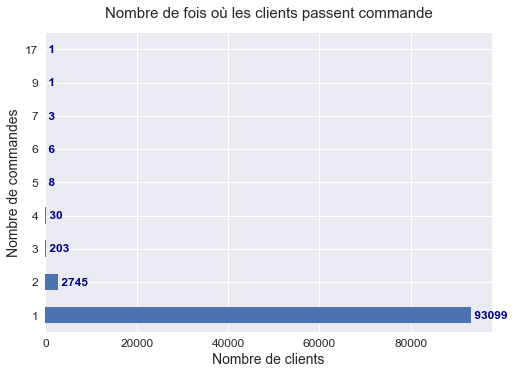

In [38]:
# Nombre des clients ayant commandé plus d'une fois ?
df_customers_orders = dfs['customers'].merge(dfs['orders'], on='customer_id')

count_customer_orders = df_customers_orders.groupby('customer_unique_id')['customer_id'].count()

count_customer_orders.value_counts().plot(kind='barh', fontsize=12)
plt.title("Nombre de fois où les clients passent commande", fontsize=15, pad=15)
plt.xlabel("Nombre de clients", fontsize=14)
plt.ylabel("Nombre de commandes", fontsize=14)
for i, v in enumerate(count_customer_orders.value_counts()):
    plt.text(
        v,
        i - 0.1,
        " {} ".format(v),
        color='darkblue',
        fontweight='bold',
        fontsize=12
    )
plt.show()

In [39]:
print("Nombre de clients ayant commandé plus d'une fois:", len(count_customer_orders[count_customer_orders > 1]))

Nombre de clients ayant commandé plus d'une fois: 2997


In [40]:
count_nunique_orders = count_customer_orders[count_customer_orders > 1]

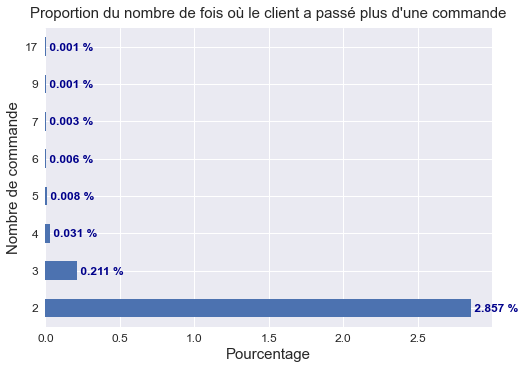

In [41]:
# Proportion du nombre de commandes pour lesquelles le client a commandé plus d'une fois
count_nunique_orders.value_counts().divide(len(count_customer_orders)).multiply(100).plot(kind='barh', fontsize=12)
plt.title(
    "Proportion du nombre de fois où le client a passé plus d'une commande",
    pad=10,
    fontsize=15
)
plt.xlabel("Pourcentage", fontsize=15)
plt.ylabel("Nombre de commande", fontsize=15)
for i, v in enumerate(count_nunique_orders.value_counts().divide(len(count_customer_orders)).multiply(100)):
    plt.text(
        v,
        i - 0.1,
        " {:.3f} %".format(v),
        color='darkblue',
        fontweight='bold',
        fontsize=12
    )
plt.show()

#### Commentaires : inspection & correction
Est-ce que les clients qui ont commandés plus d'une fois sont plus satisfaits globalement ? (que ceux qui ont commandés une fois)<br />
Autre formulation: Est-ce que ceux qui ont commandés plus d'une fois sont des clients satisfaits et convaincus ?<br />
Est-ce que toutes les commandes ont un review_score ? (Oui d'après le taux de NaN calculé)

In [42]:
# dfs['order_id'] à plus d'entrées que dfs['order_reviews'] -> jointure interne pour ne pas avoir de NaN
print("Nombre de commentaires :", dfs['order_reviews'].shape[0])
print("Nombre de commandes :", dfs['order_reviews']['order_id'].unique().shape[0])
# Des commandes ont plus d'un commentaire (review) par commande
df_orders_reviews = dfs['order_reviews'].groupby('order_id').agg({'review_id': 'count'})
df_orders_reviews[df_orders_reviews > 1].value_counts()

Nombre de commentaires : 100000
Nombre de commandes : 99441


review_id
2.0          551
3.0            4
dtype: int64

In [43]:
# Re-vérification : autant de commandes que de customer_id
dfs['orders'].shape[0] == dfs['orders']['customer_id'].unique().shape[0]

True

In [44]:
df_orders_order_reviews = dfs['orders'].merge(dfs['order_reviews'], how='left', on='order_id')
print("dfs['orders'] shape :", dfs['orders'].shape)
print("dfs['order_reviews'] shape :", dfs['order_reviews'].shape)
print("df_orders_order_reviews shape :", df_orders_order_reviews.shape)

dfs['orders'] shape : (99441, 8)
dfs['order_reviews'] shape : (100000, 7)
df_orders_order_reviews shape : (100000, 14)


In [45]:
df_orders_reviews2 = df_orders_order_reviews.groupby('order_id').agg({'review_id': 'count'})
df_orders_reviews2[df_orders_reviews2 > 1].value_counts()

review_id
2.0          551
3.0            4
dtype: int64

In [46]:
# Index des order_id ayant plus d'un commentaire
index_order_id_reviews = df_orders_reviews2[df_orders_reviews2['review_id'] > 1].index

In [47]:
# On regarde les commandes avec plus d'un commentaire
df_inspect_mult_reviews = dfs['order_reviews'][['order_id', 'review_id', 'review_score', 'review_comment_message']] \
.set_index('order_id').loc[index_order_id_reviews, :].sort_values('order_id')
print(df_inspect_mult_reviews.shape)
display(df_inspect_mult_reviews.head(25))

(1114, 3)


review_id  \
order_id                                                             
0035246a40f520710769010f752e7507  2a74b0559eb58fc1ff842ecc999594cb   
0035246a40f520710769010f752e7507  89a02c45c340aeeb1354a24e7d4b2c1e   
013056cfe49763c6f66bda03396c5ee3  ab30810c29da5da8045216f0f62652a2   
013056cfe49763c6f66bda03396c5ee3  73413b847f63e02bc752b364f6d05ee9   
0176a6846bcb3b0d3aa3116a9a768597  830636803620cdf8b6ffaf1b2f6e92b2   
0176a6846bcb3b0d3aa3116a9a768597  d8e8c42271c8fb67b9dad95d98c8ff80   
02355020fd0a40a0d56df9f6ff060413  017f0e1ea6386de662cbeba299c59ad1   
02355020fd0a40a0d56df9f6ff060413  0c8e7347f1cdd2aede37371543e3d163   
029863af4b968de1e5d6a82782e662f5  61fe4e7d1ae801bbe169eb67b86c6eda   
029863af4b968de1e5d6a82782e662f5  04d945e95c788a3aa1ffbee42105637b   
02e0b68852217f5715fb9cc885829454  2eab0b2e6f5bded4d9b0b2afcfdf4534   
02e0b68852217f5715fb9cc885829454  fa493ead9b093fb0fa6f7d4905b0ef3b   
02e723e8edb4a123d414f56cc9c4665e  38821b5c496b678cf91acc34892805ad   
02e723e8edb4a123d414f56cc9c4665e  39b4603793c1c7f5f36d809b4a218664   
03515a836bb855b03f7df9dee520a8fc  1dee9d450a2b8533d2085cef898ca4a2   
03515a836bb855b03f7df9dee520a8fc  5e1ee2e924a1dd10d80b99555383c0a7   
03c939fd7fd3b38f8485a0f95798f1f6  405eb2ea45e1dbe2662541ae5b47e2aa   
03c939fd7fd3b38f8485a0f95798f1f6  b04ed893318da5b863e878cd3d0511df   
03c939fd7fd3b38f8485a0f95798f1f6  f4bb9d6dd4fb6dcc2298f0e7b17b8e1e   
03eba6d9fef8f5b3e811d4b5a7cca9cd  36ce47fb903bec726f89c65eac26dc9f   
03eba6d9fef8f5b3e811d4b5a7cca9cd  55bff212ccac64cbacab9dae14850dcd   
04f1827088d972a62224f5203a071500  c793b25686e244588d4fc71964c95a2c   
04f1827088d972a62224f5203a071500  f543cfa959c3289703f144a32113bd78   
0544030711e50ec2cb6c15764d22891a  dc7a14d3e1984bfc11b484b841697096   
0544030711e50ec2cb6c15764d22891a  72906dc18cd7aaed26be40c859613c65   

                                  review_score  \
order_id                                         
0035246a40f520710769010f752e7507             5   
0035246a40f520710769010f752e7507             5   
013056cfe49763c6f66bda03396c5ee3             5   
013056cfe49763c6f66bda03396c5ee3             4   
0176a6846bcb3b0d3aa3116a9a768597             5   
0176a6846bcb3b0d3aa3116a9a768597             5   
02355020fd0a40a0d56df9f6ff060413             1   
02355020fd0a40a0d56df9f6ff060413             3   
029863af4b968de1e5d6a82782e662f5             4   
029863af4b968de1e5d6a82782e662f5             5   
02e0b68852217f5715fb9cc885829454             4   
02e0b68852217f5715fb9cc885829454             4   
02e723e8edb4a123d414f56cc9c4665e             5   
02e723e8edb4a123d414f56cc9c4665e             5   
03515a836bb855b03f7df9dee520a8fc             5   
03515a836bb855b03f7df9dee520a8fc             5   
03c939fd7fd3b38f8485a0f95798f1f6             3   
03c939fd7fd3b38f8485a0f95798f1f6             3   
03c939fd7fd3b38f8485a0f95798f1f6             4   
03eba6d9fef8f5b3e811d4b5a7cca9cd             4   
03eba6d9fef8f5b3e811d4b5a7cca9cd             5   
04f1827088d972a62224f5203a071500             1   
04f1827088d972a62224f5203a071500             5   
0544030711e50ec2cb6c15764d22891a             4   
0544030711e50ec2cb6c15764d22891a             1   

                                                             review_comment_message  
order_id                                                                             
0035246a40f520710769010f752e7507  Estou acostumada a comprar produtos pelo barat...  
0035246a40f520710769010f752e7507                                                NaN  
013056cfe49763c6f66bda03396c5ee3                                                NaN  
013056cfe49763c6f66bda03396c5ee3                                                NaN  
0176a6846bcb3b0d3aa3116a9a768597                                                NaN  
0176a6846bcb3b0d3aa3116a9a768597                                                NaN  
02355020fd0a40a0d56df9f6ff060413  ja reclamei varias vezes e ate hoje não sei on...  
02355020fd0a40a0d56df9f6ff060413  UM DOS 

> Parmi les commandes commentées plusieurs fois :
- des clients qui donnent plusieurs ratings identiques ou différents (pas de raisons apparentes)
- des clients qui commentent 2 ou plus de fois, après une insatisfaction ou avis à ajouter

In [48]:
# drop duplicates on order_id puis on remplace avec les order_id avec les reviews corrigés pour les 555 dupliqués
agg_functions = {'review_id': 'first', 'review_score': 'mean', 'review_comment_message': 'last'}
df_merge_duplicate_reviews = dfs['order_reviews'][['order_id', 'review_id', 'review_score', 'review_comment_message']] \
.set_index('order_id').loc[index_order_id_reviews, :].groupby('order_id').agg(agg_functions)

In [49]:
print(df_merge_duplicate_reviews.shape)
display(df_merge_duplicate_reviews.sort_values('order_id').head(25))

(555, 3)


review_id  \
order_id                                                             
0035246a40f520710769010f752e7507  2a74b0559eb58fc1ff842ecc999594cb   
013056cfe49763c6f66bda03396c5ee3  ab30810c29da5da8045216f0f62652a2   
0176a6846bcb3b0d3aa3116a9a768597  830636803620cdf8b6ffaf1b2f6e92b2   
02355020fd0a40a0d56df9f6ff060413  017f0e1ea6386de662cbeba299c59ad1   
029863af4b968de1e5d6a82782e662f5  04d945e95c788a3aa1ffbee42105637b   
02e0b68852217f5715fb9cc885829454  2eab0b2e6f5bded4d9b0b2afcfdf4534   
02e723e8edb4a123d414f56cc9c4665e  38821b5c496b678cf91acc34892805ad   
03515a836bb855b03f7df9dee520a8fc  1dee9d450a2b8533d2085cef898ca4a2   
03c939fd7fd3b38f8485a0f95798f1f6  b04ed893318da5b863e878cd3d0511df   
03eba6d9fef8f5b3e811d4b5a7cca9cd  36ce47fb903bec726f89c65eac26dc9f   
04f1827088d972a62224f5203a071500  c793b25686e244588d4fc71964c95a2c   
0544030711e50ec2cb6c15764d22891a  dc7a14d3e1984bfc11b484b841697096   
05452881e2846549b81d39249bb66ad7  61bb221369ffa0c6b0df900f97c5062b   
056bfadd41b8600ad5ecfef2ac132188  acf3f5b4d93975335ee6a76654cd495b   
059bbeb3477ed66fd7e670c3f879009a  85b0c36f463e19aa709b2ee1446513ce   
06b2c7035561ef12b16045ef4bf459e2  29aeeca2ed21aedc552cc21421eeb983   
0715dfcf2383aa72c181d8b47f6cb589  93bff38e529369b84919d539aa3dc449   
073fa4be4665f397a289842b1053229c  5bdf704ce1edc91bc6c73abede903d1c   
0749426d1c48fe5943cbdf1316ace0aa  6d9236aeca36f0a36200fdd41e61e28c   
075a544c5f4ed4bb75f82b160465fe76  c5f404138d9568bebb5dde204d15b25f   
076d991923ee938761994a4255f5c5da  48f315adb0fcfc986321083d894884a6   
08bf75dcf867b9f13026785053e87052  923fa4fc354ec3831b6b39f1dc688e7d   
08c01d43e93f5c485f48758550d41eb9  aace238b157154c2d0f6955b7d05960a   
095e9e0811476409362d72fa70d73a6c  3fb33c49be4d375ddb15913bbb8c0f73   
097abce97e431993434adabc1aaec4e4  c6dbd92da12d8e4bcb5511bdbce042e1   

                                  review_score  \
order_id                                         
0035246a40f520710769010f752e7507      5.000000   
013056cfe49763c6f66bda03396c5ee3      4.500000   
0176a6846bcb3b0d3aa3116a9a768597      5.000000   
02355020fd0a40a0d56df9f6ff060413      2.000000   
029863af4b968de1e5d6a82782e662f5      4.500000   
02e0b68852217f5715fb9cc885829454      4.000000   
02e723e8edb4a123d414f56cc9c4665e      5.000000   
03515a836bb855b03f7df9dee520a8fc      5.000000   
03c939fd7fd3b38f8485a0f95798f1f6      3.333333   
03eba6d9fef8f5b3e811d4b5a7cca9cd      4.500000   
04f1827088d972a62224f5203a071500      3.000000   
0544030711e50ec2cb6c15764d22891a      2.500000   
05452881e2846549b81d39249bb66ad7      5.000000   
056bfadd41b8600ad5ecfef2ac132188      4.000000   
059bbeb3477ed66fd7e670c3f879009a      3.500000   
06b2c7035561ef12b16045ef4bf459e2      5.000000   
0715dfcf2383aa72c181d8b47f6cb589      5.000000   
073fa4be4665f397a289842b1053229c      3.000000   
0749426d1c48fe5943cbdf1316ace0aa      1.000000   
075a544c5f4ed4bb75f82b160465fe76      2.000000   
076d991923ee938761994a4255f5c5da      5.000000   
08bf75dcf867b9f13026785053e87052      4.000000   
08c01d43e93f5c485f48758550d41eb9      1.000000   
095e9e0811476409362d72fa70d73a6c      4.000000   
097abce97e431993434adabc1aaec4e4      5.000000   

                                                             review_comment_message  
order_id                                                                             
0035246a40f520710769010f752e7507  Estou acostumada a comprar produtos pelo barat...  
013056cfe49763c6f66bda03396c5ee3                                               None  
0176a6846bcb3b0d3aa3116a9a768597                                               None  
02355020fd0a40a0d56df9f6ff060413  UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PE...  
029863af4b968de1e5d6a82782e662f5                                               None  
02e0b68852217f5715fb9cc885829454                        Gostei e entregou rapidinho  
02e723e8edb4a123d414f56cc9c4665e                                             Otimo   
03515a836bb855b03f7df9dee520a8fc         

In [50]:
df_merge_duplicate_reviews.reset_index(inplace=True)

In [51]:
df_merge_duplicate_reviews.head()

order_id                         review_id  \
0  0035246a40f520710769010f752e7507  2a74b0559eb58fc1ff842ecc999594cb   
1  013056cfe49763c6f66bda03396c5ee3  ab30810c29da5da8045216f0f62652a2   
2  0176a6846bcb3b0d3aa3116a9a768597  830636803620cdf8b6ffaf1b2f6e92b2   
3  02355020fd0a40a0d56df9f6ff060413  017f0e1ea6386de662cbeba299c59ad1   
4  029863af4b968de1e5d6a82782e662f5  04d945e95c788a3aa1ffbee42105637b   

   review_score                             review_comment_message  
0           5.0  Estou acostumada a comprar produtos pelo barat...  
1           4.5                                               None  
2           5.0                                               None  
3           2.0  UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PE...  
4           4.5                                               None

In [52]:
df_orders_order_reviews.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                         review_id  \
0           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
1           2018-08-13 00:00:00  8d5266042046a06655c8db133d120ba5   
2           2018-09-04 00:00:00  e73b67b67587f7644d5bd1a52deb1b01   
3           2017-12-15 00:00:00  359d03e676b3c069f62cadba8dd3f6e8   
4           2018-02-26 00:00:00  e50934924e227544ba8246aeb3770dd4   

   review_score review_comment_title  \
0             4                  NaN   
1             4     Muito boa a loja   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1                               Muito bom o produto.  2018-08-08 00:00:00   
2                                                NaN  2018-08-18 00:00:00   
3  O produto foi exatamente o que eu esperava e e...  2017-12-03 00:00:00   
4                                                NaN  2018-02-17 00:00:00   

  review_answer_timestamp  
0     2017-10-12 03:43:48  
1     2018-08-08 18:37:50  
2     2018-08-22 19:07:58  
3     2017-12-05 19:21:58  
4     2018-02-18 13:02:51

In [53]:
df_merge_duplicate_reviews.head()

order_id                         review_id  \
0  0035246a40f520710769010f752e7507  2a74b0559eb58fc1ff842ecc999594cb   
1  013056cfe49763c6f66bda03396c5ee3  ab30810c29da5da8045216f0f62652a2   
2  0176a6846bcb3b0d3aa3116a9a768597  830636803620cdf8b6ffaf1b2f6e92b2   
3  02355020fd0a40a0d56df9f6ff060413  017f0e1ea6386de662cbeba299c59ad1   
4  029863af4b968de1e5d6a82782e662f5  04d945e95c788a3aa1ffbee42105637b   

   review_score                             review_comment_message  
0           5.0  Estou acostumada a comprar produtos pelo barat...  
1           4.5                                               None  
2           5.0                                               None  
3           2.0  UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PE...  
4           4.5                                               None

In [54]:
df_orders_order_reviews[[
    'customer_id',
    'order_id',
    'review_id',
    'review_score',
    'review_comment_message'
]][df_orders_order_reviews['order_id'].isin(df_merge_duplicate_reviews['order_id'])]
# On drop duplicates on order_id et on affecte les champs de reviews corrigés -> on obtient un unique commentaire par commande

customer_id                          order_id  \
405    6abf781c5304890987047e9aa239caa8  ac7a92560a9e99f0a0ab4988102f491b   
406    6abf781c5304890987047e9aa239caa8  ac7a92560a9e99f0a0ab4988102f491b   
556    386e96046ce0e77e5c9a9a4e818da93c  7845a2492ab1b4f2cf3d56c7b8da1446   
557    386e96046ce0e77e5c9a9a4e818da93c  7845a2492ab1b4f2cf3d56c7b8da1446   
615    e3fe72696c4713d64d3c10afe71e75ed  714fb133a6730ab81fa1d3c1b2007291   
...                                 ...                               ...   
99604  cf826be53b1fe4a39bc33c7f5f827835  2fcdb0c004a2a538d3dd724ea76916bd   
99639  92fc29e76e4da7c1b189ab092d4c3756  dbfa3d8c05cc5d84083fc259a9feb5bc   
99640  92fc29e76e4da7c1b189ab092d4c3756  dbfa3d8c05cc5d84083fc259a9feb5bc   
99763  3b979b88fbf88354add6870de52d007b  79ce3a0a9eba49ff442b392ab05349a4   
99764  3b979b88fbf88354add6870de52d007b  79ce3a0a9eba49ff442b392ab05349a4   

                              review_id  review_score  \
405    1ce9388b1a3ad76f5f1a64f208a90fce             1   
406    5ac791169055b4994a395a442e3956f6             1   
556    ae501aff8d8cc761c92008e6afd9dcaa             5   
557    8566d94f7bf3bedbb4ca6a29725fc382             5   
615    f242ce44c6572a94907a446b8fda32c8             1   
...                                 ...           ...   
99604  4c4bc2df56b20a1bc3749622240a427f             5   
99639  d70b9aa33dad62363fdda2d758373314             5   
99640  3052a79d76a1932ff98c990a59230f8d             5   
99763  601798aaf8bd13bdb3b80732a36b13c8             5   
99764  68f7ab6b441e02be45eb8ba56476655a             5   

                                  review_comment_message  
405    O prazo era até dia 23/03 e até o momento não ...  
406    Comprei pensando que ia vir conforme a foto, v...  
556                            chegou antesdo programado  
557                            chegou antes do prometido  
615    Olá!\r\nMinha queixa é a não entrega na residê...  
...                                                  ...  
99604                                   Produto exelente  
99639                                                NaN  
99640                                                NaN  
99763                                                NaN  
99764                                                NaN  

[1114 rows x 5 columns]

In [55]:
df_orders_order_reviews.drop_duplicates(subset='order_id', keep='first', inplace=True)

In [56]:
# Index à récupérer
index_to_update_reviews = \
df_orders_order_reviews[df_orders_order_reviews['order_id']\
.isin(df_merge_duplicate_reviews['order_id'])]\
.sort_values('order_id').index

In [57]:
df_orders_order_reviews2 = df_orders_order_reviews.copy()

In [58]:
# Réaffectation des valeurs pour les commandes qui avait plus d'un commentaire
df_orders_order_reviews2.loc[index_to_update_reviews, ['review_score']] = \
df_merge_duplicate_reviews[['review_score']].set_index(index_to_update_reviews)
df_orders_order_reviews2.loc[index_to_update_reviews, ['review_id']] = \
df_merge_duplicate_reviews[['review_id']].set_index(index_to_update_reviews)
df_orders_order_reviews2.loc[index_to_update_reviews, ['review_comment_message']] = \
df_merge_duplicate_reviews[['review_comment_message']].set_index(index_to_update_reviews)

In [59]:
df_merge_duplicate_reviews[['review_score']].set_index(index_to_update_reviews)

review_score
91724           5.0
84711           4.5
94719           5.0
81037           2.0
73796           4.5
...             ...
27870           5.0
85280           5.0
41446           4.0
68613           5.0
84324           3.0

[555 rows x 1 columns]

In [60]:
type(df_orders_order_reviews2.loc[index_to_update_reviews, ['review_score']])

pandas.core.frame.DataFrame

In [61]:
type(df_merge_duplicate_reviews['review_score'])

pandas.core.series.Series

In [62]:
# Vérification
display(df_orders_order_reviews[[
    'order_id',
    'review_id',
    'review_score',
    'review_comment_message'
]][df_orders_order_reviews['order_id'].isin(df_merge_duplicate_reviews['order_id'])].head())

display(df_orders_order_reviews2[[
    'order_id',
    'review_id',
    'review_score',
    'review_comment_message'
]][df_orders_order_reviews2['order_id'].isin(df_merge_duplicate_reviews['order_id'])].head())

df_inspect_mult_reviews[[
    'review_id',
    'review_score',
    'review_comment_message'
]][df_inspect_mult_reviews.index == 'c761a8b74f1e876bc5efc4186f720e27']

order_id                         review_id  \
405  ac7a92560a9e99f0a0ab4988102f491b  1ce9388b1a3ad76f5f1a64f208a90fce   
556  7845a2492ab1b4f2cf3d56c7b8da1446  ae501aff8d8cc761c92008e6afd9dcaa   
615  714fb133a6730ab81fa1d3c1b2007291  f242ce44c6572a94907a446b8fda32c8   
671  acbe07f22f29ad7e5a78f30008cc6ec7  ea1fbd19c48a016b08c92aa1daf658de   
818  c761a8b74f1e876bc5efc4186f720e27  81a90f09c4325e02aedca314ec5cbf71   

     review_score                             review_comment_message  
405             1  O prazo era até dia 23/03 e até o momento não ...  
556             5                          chegou antesdo programado  
615             1  Olá!\r\nMinha queixa é a não entrega na residê...  
671             5                                                NaN  
818             4                                                NaN

order_id                         review_id  \
405  ac7a92560a9e99f0a0ab4988102f491b  1ce9388b1a3ad76f5f1a64f208a90fce   
556  7845a2492ab1b4f2cf3d56c7b8da1446  ae501aff8d8cc761c92008e6afd9dcaa   
615  714fb133a6730ab81fa1d3c1b2007291  f242ce44c6572a94907a446b8fda32c8   
671  acbe07f22f29ad7e5a78f30008cc6ec7  ea1fbd19c48a016b08c92aa1daf658de   
818  c761a8b74f1e876bc5efc4186f720e27  81a90f09c4325e02aedca314ec5cbf71   

     review_score                             review_comment_message  
405           1.0  Comprei pensando que ia vir conforme a foto, v...  
556           5.0                          chegou antes do prometido  
615           1.0  Holá!\r\nNão recebi o produto é nem um telefon...  
671           5.0                                               None  
818           2.5  Realizei a compra de 2 colchas de solteiro e s...

review_id  \
order_id                                                             
c761a8b74f1e876bc5efc4186f720e27  81a90f09c4325e02aedca314ec5cbf71   
c761a8b74f1e876bc5efc4186f720e27  8edd42a7c561e11de943594bfae347e5   

                                  review_score  \
order_id                                         
c761a8b74f1e876bc5efc4186f720e27             4   
c761a8b74f1e876bc5efc4186f720e27             1   

                                                             review_comment_message  
order_id                                                                             
c761a8b74f1e876bc5efc4186f720e27                                                NaN  
c761a8b74f1e876bc5efc4186f720e27  Realizei a compra de 2 colchas de solteiro e s...

> df_orders_order_reviews2 : DataFrame avec un commentaire et un seul pour chaque commande (order_id / customer_id)

##### Satisfaction : évaluation en fonction du rating des clients et du nombre de commandes passées pour un même client

In [63]:
# Nombre des clients ayant commandé plus d'une fois ?
df_customers_orders_order_reviews2 = dfs['customers'].merge(df_orders_order_reviews2, on='customer_id')
df_customers_orders_order_reviews2.loc[df_customers_orders_order_reviews2['customer_unique_id'] == 'ff36be26206fffe1eb37afd54c70e18b']

customer_id                customer_unique_id  \
13028  13362fc2728edd1397282bb32cf319c1  ff36be26206fffe1eb37afd54c70e18b   
26608  3483b2a9e678865616e7d1b69b28dd4c  ff36be26206fffe1eb37afd54c70e18b   
98551  75c6e03e7206bd1dd59f427c9f75142a  ff36be26206fffe1eb37afd54c70e18b   

       customer_zip_code_prefix customer_city customer_state  \
13028                     13057      campinas             SP   
26608                     13057      campinas             SP   
98551                     13057      campinas             SP   

                               order_id order_status order_purchase_timestamp  \
13028  b02682757340133856bfb99145dd61cd      shipped      2018-07-28 15:49:27   
26608  47282cfe5747c1c19920f090e491d285     canceled      2018-08-23 12:38:08   
98551  81b7c7bbc8ec003eeb67d87441a6a148     canceled      2018-08-20 09:03:23   

         order_approved_at order_delivered_carrier_date  \
13028  2018-07-28 16:24:00          2018-07-30 12:27:00   
26608                  NaN                          NaN   
98551                  NaN                          NaN   

      order_delivered_customer_date order_estimated_delivery_date  \
13028                           NaN           2018-08-13 00:00:00   
26608                           NaN           2018-09-06 00:00:00   
98551                           NaN           2018-09-03 00:00:00   

                              review_id  review_score review_comment_title  \
13028  abbfacb2964f74f6487c9c10ac46daa6           3.0                  NaN   
26608  abbfacb2964f74f6487c9c10ac46daa6           3.0                  NaN   
98551  abbfacb2964f74f6487c9c10ac46daa6           3.0                  NaN   

      review_comment_message review_creation_date review_answer_timestamp  
13028                    NaN  2018-08-15 00:00:00     2018-08-19 22:35:54  
26608                    NaN  2018-08-15 00:00:00     2018-08-19 22:35:54  
98551                    NaN  2018-08-15 00:00:00     2018-08-19 22:35:54

In [64]:
df_customers_satisfaction = \
df_customers_orders_order_reviews2.groupby('customer_unique_id')[['review_score', 'customer_id']].agg([np.mean, 'count'])
# Astuce ici : redéfinir les colonnes plutôt que d'accéder par le multi-index -> plus simple...
df_customers_satisfaction.columns = ['mean_review', 'count_review']
display(df_customers_satisfaction.head())

mean_review  count_review
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2          5.0             1
0000b849f77a49e4a4ce2b2a4ca5be3f          4.0             1
0000f46a3911fa3c0805444483337064          3.0             1
0000f6ccb0745a6a4b88665a16c9f078          4.0             1
0004aac84e0df4da2b147fca70cf8255          5.0             1

In [65]:
df_customers_satisfaction_order_2 = df_customers_satisfaction[df_customers_satisfaction['count_review'] == 2]
display(df_customers_satisfaction_order_2)

mean_review  count_review
customer_unique_id                                         
00172711b30d52eea8b313a7f2cced02         4.00             2
004288347e5e88a27ded2bb23747066c         5.00             2
004b45ec5c64187465168251cd1c9c2f         3.00             2
0058f300f57d7b93c477a131a59b36c3         3.00             2
00a39521eb40f7012db50455bf083460         4.00             2
...                                       ...           ...
ff03923ad1eb9e32304deb7f9b2a45c9         3.00             2
ff22e30958c13ffe219db7d711e8f564         1.00             2
ff44401d0d8f5b9c54a47374eb48c1b8         3.00             2
ff8892f7c26aa0446da53d01b18df463         3.25             2
ffe254cc039740e17dd15a5305035928         3.00             2

[2745 rows x 2 columns]

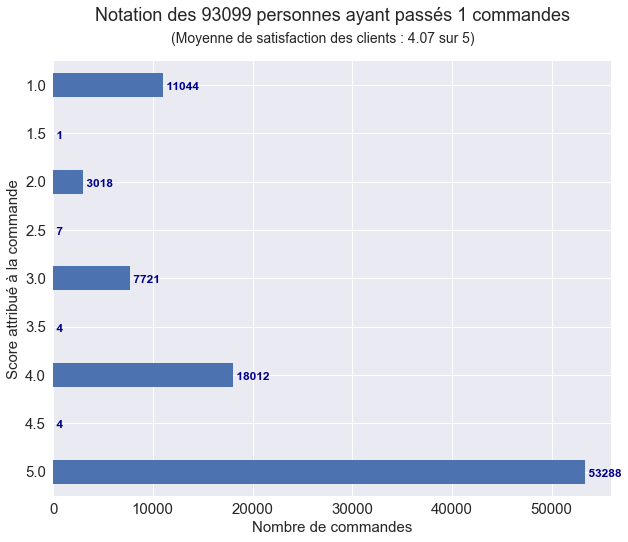

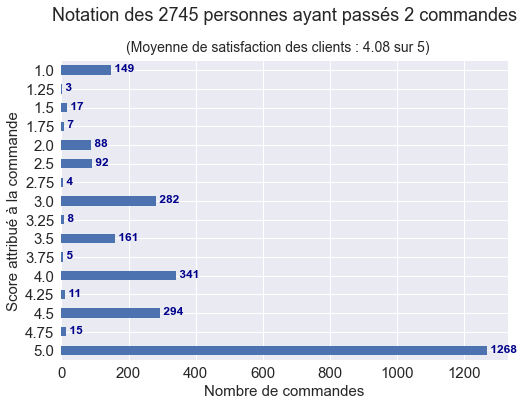

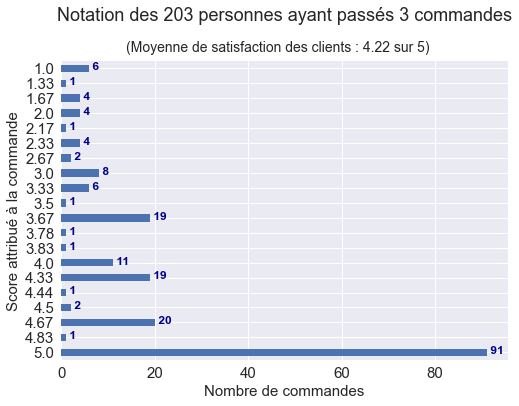

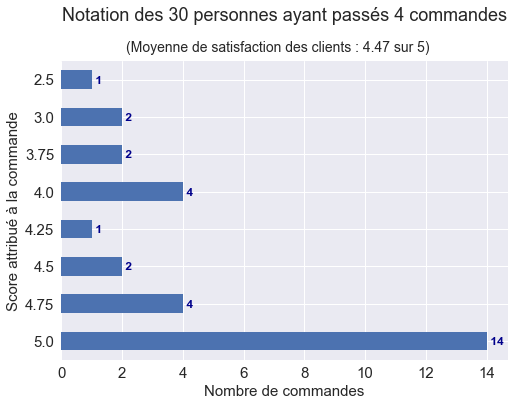

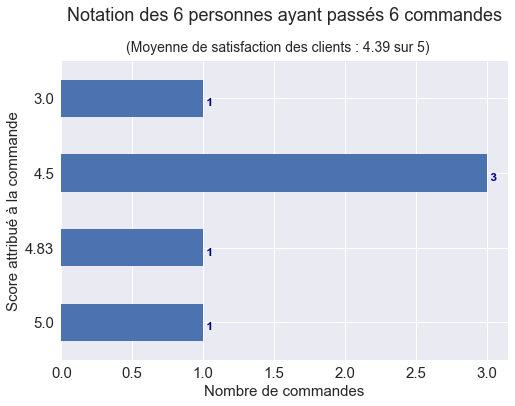

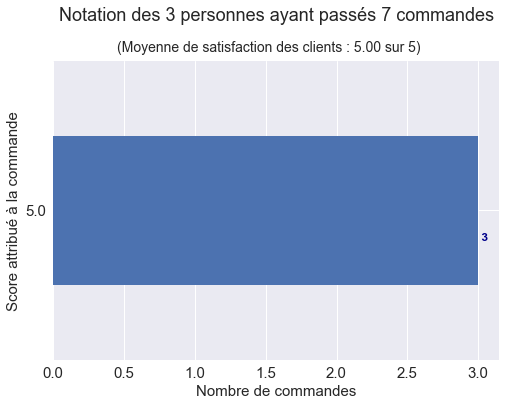

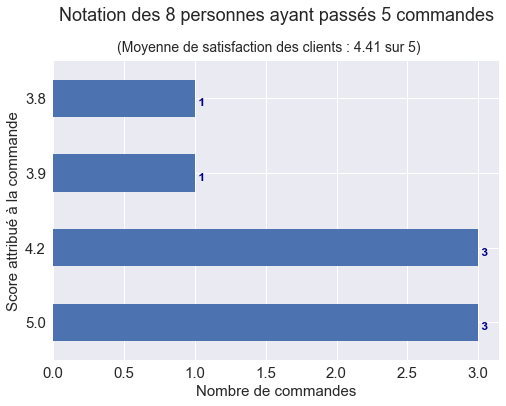

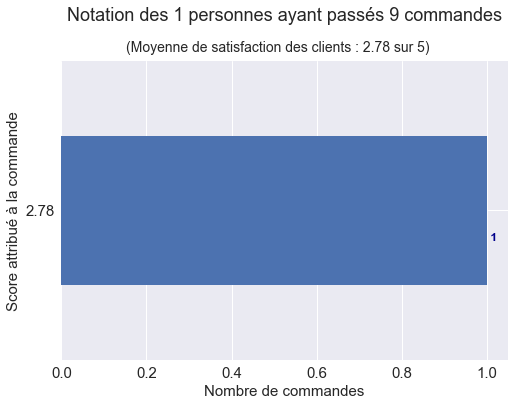

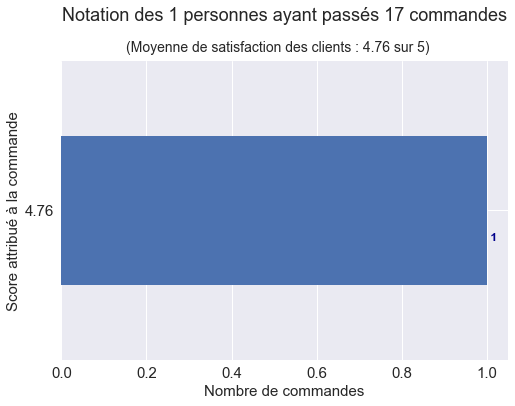

In [66]:
dict_satisfaction_scores = {'nb_order': [], 'customer_nb': [], 'mean_satisfaction_order': []}

def display_customers_satisfaction_per_nb_order():
    """
    Fonction qui permet d'afficher le nombre de notation par groupe de clients ayant passés 1 à n commandes.
    
    Args:
        None
        
    Returns:
        plt.show(): Un graphique pour chaque groupe de clients.
    """

    plt.figure(figsize=(10, 8))
    
    # nombre de commandes passées par le même client
    for nb_order in df_customers_satisfaction['count_review'].unique():
    
        df_customers_satisfaction_orders = df_customers_satisfaction[df_customers_satisfaction['count_review'] == nb_order]

        df_customers_satisfaction_orders['mean_review'].round(2).value_counts().sort_index().plot(kind='barh')

        mean_satisfaction_order = df_customers_satisfaction_orders['mean_review'].sum() / df_customers_satisfaction_orders.shape[0]
        suptitle = "(Moyenne de satisfaction des clients : {:.2f} sur 5)".format(mean_satisfaction_order)

        customer_nb = len(df_customers_satisfaction_orders[['count_review']])
        
        dict_satisfaction_scores['nb_order'].append(nb_order)
        dict_satisfaction_scores['customer_nb'].append(customer_nb)
        dict_satisfaction_scores['mean_satisfaction_order'].append(mean_satisfaction_order)
        
        plt.title("Notation des {} personnes ayant passés {} commandes".format(customer_nb, nb_order), fontsize=18, pad=40)
        plt.suptitle(suptitle, y=0.93, fontsize=14)
        plt.gca().invert_yaxis()
        plt.xlabel("Nombre de commandes", fontsize=15)
        plt.ylabel("Score attribué à la commande", fontsize=15)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)

        for i, v in enumerate(df_customers_satisfaction_orders['mean_review'].round(2).value_counts().sort_index()):
            plt.text(
            v,
            i + 0.1,
            " {}".format(v),
            color='darkblue',
            fontweight='bold',
            fontsize=12
        )
        
        plt.show()
        
    return

display_customers_satisfaction_per_nb_order()

In [67]:
#pprint(dict_satisfaction_scores)

In [68]:
df_satisfaction_scores = pd.DataFrame(dict_satisfaction_scores)

In [69]:
df_satisfaction_scores

nb_order  customer_nb  mean_satisfaction_order
0         1        93099                 4.068594
1         2         2745                 4.082605
2         3          203                 4.219485
3         4           30                 4.475000
4         6            6                 4.388889
5         7            3                 5.000000
6         5            8                 4.412500
7         9            1                 2.777778
8        17            1                 4.764706

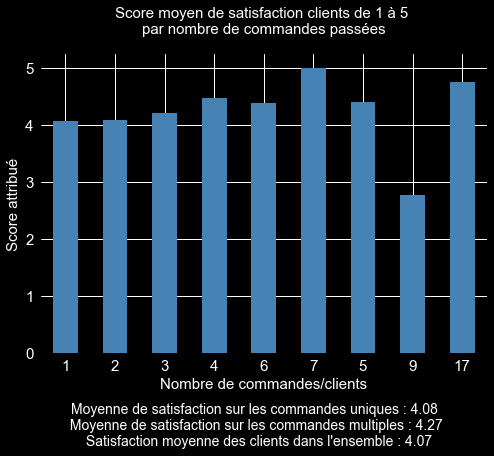

In [70]:
mean_score_multiple_orders = df_satisfaction_scores.loc[1:, 'mean_satisfaction_order'].mean()
mean_score_unique_orders = df_satisfaction_scores.loc[1, 'mean_satisfaction_order']
# Moyenne de satisfaction des clients (pour l'ensemble de leurs commandes (unique ou multiple))
mean_score_customers = df_customers_satisfaction['mean_review'].mean()

plt.style.use('dark_background')

df_satisfaction_scores[['nb_order', 'mean_satisfaction_order']]\
.set_index('nb_order').plot(kind='bar', rot=0, legend=False, color='steelblue')

plt.title('Score moyen de satisfaction clients de 1 à 5 \npar nombre de commandes passées',
          fontsize=15, pad=20)
plt.xlabel("Nombre de commandes/clients", fontsize=15)
plt.ylabel("Score attribué", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
suptitle = "Moyenne de satisfaction sur les commandes uniques : {:.2f} \n Moyenne de satisfaction sur les commandes multiples : {:.2f} \n Satisfaction moyenne des clients dans l'ensemble : {:.2f}"\
.format(mean_score_unique_orders, mean_score_multiple_orders, mean_score_customers)
plt.suptitle(suptitle, y=0, fontsize=14)

plt.show()

> Conclusion : les clients ayant passés plus d'une commande sont globalement plus satisfaits que les clients ayant passés une unique commande.<br >
Attention cependant le nombre de clients ayant passés une unique commande est bien plus important que les clients qui en ont passées plusieurs (minoritaire).

#### Répartition géographique des clients

In [71]:
df_customers_orders.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  
0           2017-05-25 10:35:35           2017-06-05 00:00:00  
1           2018-01-29 12:41:19           2018-02-06 00:00:00  
2           2018-06-14 17:58:51           2018-06-13 00:00:00  
3           2018-03-28 16:04:25           2018-04-10 00:00:00  
4           2018-08-09 20:55:48           2018-08-15 00:00:00

In [72]:
index_customer_unique_id = df_customers_orders['customer_unique_id'].drop_duplicates().index
print(index_customer_unique_id)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            99431, 99432, 99433, 99434, 99435, 99436, 99437, 99438, 99439,
            99440],
           dtype='int64', length=96096)


In [73]:
len(df_customers_orders['customer_unique_id'].unique())

96096

In [74]:
# https://brazil-help.com/brazilian_states.html
# Sélection des clients uniques (customer_unique_id)
ds_customers_per_city = df_customers_orders[[
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state'
]].loc[index_customer_unique_id, :].value_counts('customer_city')
display(ds_customers_per_city)

ds_customers_per_state = df_customers_orders[[
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state'
]].loc[index_customer_unique_id, :].value_counts('customer_state')
display(ds_customers_per_state)

customer_city
sao paulo         14971
rio de janeiro     6611
belo horizonte     2671
brasilia           2066
curitiba           1462
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Length: 4118, dtype: int64

customer_state
SP    40295
RJ    12377
MG    11255
RS     5277
PR     4882
SC     3529
BA     3276
DF     2073
ES     1963
GO     1951
PE     1604
CE     1311
PA      949
MT      875
MA      725
MS      693
PB      519
PI      482
RN      474
AL      401
SE      341
TO      273
RO      239
AM      143
AC       77
AP       67
RR       45
dtype: int64

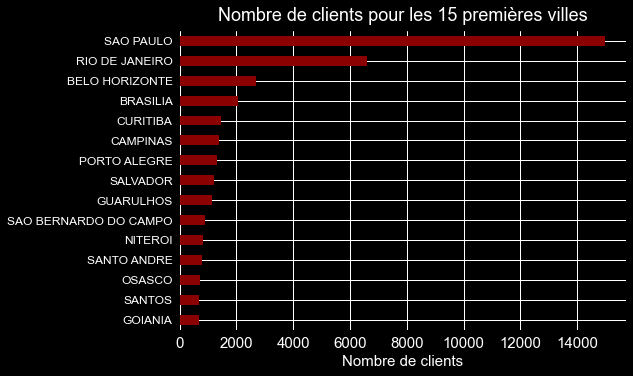

In [75]:
plt.style.use('dark_background')

ds_customers_per_city.nlargest(15).plot(kind='barh', color="darkred")

plt.yticks(
    range(0, len(ds_customers_per_city.nlargest(15).index)),
    [city.upper() for city in ds_customers_per_city.nlargest(15).index],
    fontsize=12
)
plt.title("Nombre de clients pour les 15 premières villes", fontsize=18, pad=10)
plt.ylabel("")
plt.xticks(fontsize=15)
plt.xlabel("Nombre de clients", fontsize=15)
plt.gca().invert_yaxis()

plt.show()

In [76]:
df_customers_per_state = pd.DataFrame(ds_customers_per_state)
df_customers_per_state.reset_index(inplace=True)
df_customers_per_state.head()

customer_state      0
0             SP  40295
1             RJ  12377
2             MG  11255
3             RS   5277
4             PR   4882

In [77]:
df_brazil_states_coord = pd.read_csv(path + '/brazil-states-coordinates.txt', encoding='latin1')
df_brazil_states_coord.head()

state_name state_code  state_lat  state_long
0       Acre         AC      -9.11      -70.52
1    Alagoas         AL      -9.57      -36.55
2      Amapá         AP       1.00      -52.00
3   Amazonas         AM      -5.00      -63.00
4      Bahia         BA     -12.52      -41.69

In [78]:
df_customers_nb_per_state = df_customers_per_state.merge(
    df_brazil_states_coord,
    left_on='customer_state',
    right_on='state_code'
)
df_customers_nb_per_state.columns.values[1] = 'customer_nb'
df_customers_nb_per_state.head()

customer_state  customer_nb      state_name state_code  state_lat  \
0             SP        40295        SãoPaulo         SP -23.533333   
1             RJ        12377    RiodeJaneiro         RJ -22.900000   
2             MG        11255     MinasGerais         MG -19.816667   
3             RS         5277  RioGrandedoSul         RS -30.000000   
4             PR         4882          Paraná         PR -24.000000   

   state_long  
0  -46.633333  
1  -43.200000  
2  -43.950000  
3  -53.000000  
4  -51.000000

In [79]:
# Chargement du fichier geojson pour récupérer les contours des différentes régions
# source : https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson
with open(path + '/brazil-regions.geojson') as geojson_file:
    geojson_regions = json.load(geojson_file, encoding="utf-8")

# geojson_regions
for elt in geojson_regions['features']:
    print(elt['properties']['id'], " : ",  elt['properties']['name'])

1  :  Acre
2  :  Alagoas
3  :  Amazonas
4  :  AmapÃ¡
5  :  Bahia
6  :  CearÃ¡
8  :  EspÃ­rito Santo
9  :  GoiÃ¡s
10  :  MaranhÃ£o
11  :  Minas Gerais
12  :  Mato Grosso do Sul
13  :  Mato Grosso
14  :  ParÃ¡
15  :  ParaÃ­ba
16  :  Pernambuco
17  :  PiauÃ­
18  :  ParanÃ¡
19  :  Rio de Janeiro
20  :  Rio Grande do Norte
21  :  RondÃ´nia
22  :  Roraima
23  :  Rio Grande do Sul
24  :  Santa Catarina
25  :  Sergipe
26  :  SÃ£o Paulo
27  :  Tocantins
7  :  Distrito Federal


In [80]:
df_brazil_states_coord

state_name state_code  state_lat  state_long
0               Acre         AC  -9.110000  -70.520000
1            Alagoas         AL  -9.570000  -36.550000
2              Amapá         AP   1.000000  -52.000000
3           Amazonas         AM  -5.000000  -63.000000
4              Bahia         BA -12.520000  -41.690000
5              Ceará         CE  -5.080000  -39.650000
6    DistritoFederal         DF -15.795000  -47.757778
7      EspíritoSanto         ES -20.318889  -40.337778
8              Goiás         GO -15.933333  -50.133333
9           Maranhão         MA  -6.183333  -45.616667
10        MatoGrosso         MT -15.566667  -56.066667
11   MatoGrossodoSul         MS -20.442778  -54.645833
12       MinasGerais         MG -19.816667  -43.950000
13              Pará         PA  -5.666667  -52.733333
14           Paraíba         PB  -7.166667  -36.833333
15            Paraná         PR -24.000000  -51.000000
16        Pernambuco         PE  -8.340000  -37.810000
17             Piauí         PI  -8.233333  -43.100000
18      RiodeJaneiro         RJ -22.900000  -43.200000
19  RioGrandedoNorte         RN  -5.740000  -36.550000
20    RioGrandedoSul         RS -30.000000  -53.000000
21          Rondônia         RO -10.900000  -62.760000
22           Roraima         RR   2.050000  -61.400000
23     SantaCatarina         SC -27.250000  -50.333333
24          SãoPaulo         SP -23.533333  -46.633333
25           Sergipe         SE -10.590000  -37.380000
26         Tocantins         TO -10.183333  -48.333333

In [81]:
# Ajout de l'index du fichier geojson pour correspondance avec le DataFrame via la choroplèthe
df_brazil_states_coord['idx_geojson'] = [1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 13, 12, 11, 14, 15,
                                         18, 16, 17, 19, 20, 23, 21, 22, 24, 26, 25, 27]
display(df_brazil_states_coord.head())
display(df_customers_nb_per_state.head())

state_name state_code  state_lat  state_long  idx_geojson
0       Acre         AC      -9.11      -70.52            1
1    Alagoas         AL      -9.57      -36.55            2
2      Amapá         AP       1.00      -52.00            4
3   Amazonas         AM      -5.00      -63.00            3
4      Bahia         BA     -12.52      -41.69            5

customer_state  customer_nb      state_name state_code  state_lat  \
0             SP        40295        SãoPaulo         SP -23.533333   
1             RJ        12377    RiodeJaneiro         RJ -22.900000   
2             MG        11255     MinasGerais         MG -19.816667   
3             RS         5277  RioGrandedoSul         RS -30.000000   
4             PR         4882          Paraná         PR -24.000000   

   state_long  
0  -46.633333  
1  -43.200000  
2  -43.950000  
3  -53.000000  
4  -51.000000

In [82]:
df_choropleth = df_customers_nb_per_state.merge(
    df_brazil_states_coord[['state_code', 'idx_geojson']],
    how='left',
    on='state_code'
)
df_choropleth.drop('state_code', axis=1, inplace=True)
display(df_choropleth.head())

customer_state  customer_nb      state_name  state_lat  state_long  \
0             SP        40295        SãoPaulo -23.533333  -46.633333   
1             RJ        12377    RiodeJaneiro -22.900000  -43.200000   
2             MG        11255     MinasGerais -19.816667  -43.950000   
3             RS         5277  RioGrandedoSul -30.000000  -53.000000   
4             PR         4882          Paraná -24.000000  -51.000000   

   idx_geojson  
0           26  
1           19  
2           11  
3           23  
4           18

In [83]:
# https://python-visualization.github.io/folium

# Pointage de coordonnées sur le brazil (à la louche)
brazil_location = [-15.7757875, -48.0778477]
# Création de la map
customers_map = folium.Map(
    location = brazil_location,
    zoom_start = 4,
    tiles = 'cartodbpositron' # type de d'affichage
)

# Ajout du plugin 'Minimap'
plugin_mini_map = plugins.MiniMap(toggle_display = True)
# Ajout de la 'mini map' à la carte principale
customers_map.add_child(plugin_mini_map)
# Ajout du "Scroll zoom toggler" à la map pour savoir où l'on se situe
plugins.ScrollZoomToggler().add_to(customers_map)
# Ajout d'un bouton pour l'affichage plein écran de la map (utile pour les ultra-portables à petit écran)
plugins.Fullscreen(position='topright').add_to(customers_map)

# Ajout de la choroplèthe 
folium.Choropleth(
    geo_data = geojson_regions,
    name = 'Calque des états',
    data = df_choropleth,
    columns = ['idx_geojson', 'customer_nb'],
    key_on = 'feature.properties.id',
    bins = 6, # Pas au delà de 9 -> plante à cause du 'color cycle'
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Plage de nombre de clients par états fédérés',
    highlight = True
).add_to(customers_map)

# Ajout des informations complémentaires à partir du DataFrame (Markers)
for elt in df_choropleth.itertuples():
    
    # Utilisation du html pour la mise en forme des popup / tooltip
    # html = f"<i>État fédéral :</i> <b>{elt.state_name}</b><br /><i>Clients :</i> <b>{elt.customer_nb}</b>"
    # iframe = folium.IFrame(html)
    # msg = folium.Popup(iframe, min_width = 250, max_width = 250)
    
    # Mise en forme du marker
    folium.Marker(
        location = [elt.state_lat, elt.state_long],
        # popup = msg,
        tooltip = f"<i>État fédéral :</i> <b>{elt.state_name}</b><br /><i>Clients :</i> <b>{elt.customer_nb}</b>",
        # Utilisation de font awesome icons -> prefix='fa' (https://fontawesome.com)
        icon = folium.Icon(color='darkred', icon='info-circle', prefix='fa')
    ).add_to(customers_map)
    # print(elt)

# Ajout du calque de contrôle pour afficher ou non le contour des états
folium.LayerControl().add_to(customers_map)

# Affichage de la map
customers_map

In [84]:
# Sauvegarde de la map
customers_map.save(path + '/olist_customers_map.html')

#### Moyens de paiements (dfs['customers'] & ds['orders'])

In [85]:
# fusion de dfs['customers'] et dfs['orders']
# Vérification: autant de customer_id que de commandes ?
print(
    (
    dfs['customers'][['customer_id']].sort_values('customer_id').reset_index(drop=True) ==
    dfs['orders'][['customer_id']].sort_values('customer_id').reset_index(drop=True)
    ).mean()
) #  100% identiques -> True -> donc merge -> inner sur customer_id

customer_id    1.0
dtype: float64


In [86]:
# Y a t-il des "pertes" à l'intersection ? (merge inner)
df_customers_orders.shape[0] == dfs['customers'].shape[0] == dfs['orders'].shape[0] # Si True -> réponse: non

True

In [87]:
# Nombre de commandes par clients (=nombre de customer_id par customer_unique_id)
print(df_customers_orders.shape)
display(df_customers_orders.head())

(99441, 12)


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  
0           2017-05-25 10:35:35           2017-06-05 00:00:00  
1           2018-01-29 12:41:19           2018-02-06 00:00:00  
2           2018-06-14 17:58:51           2018-06-13 00:00:00  
3           2018-03-28 16:04:25           2018-04-10 00:00:00  
4           2018-08-09 20:55:48           2018-08-15 00:00:00

In [88]:
# Pour une commande on peut avoir plusieurs type de paiements ? 
# (paiement de la totalité d'une commande avec différents moyens: coupon, carte, etc)
display(
    dfs['order_payments']\
    .loc[dfs['order_payments']\
         .duplicated(subset=['order_id'],
                     keep=False)]\
    .sort_values('order_id').head(25)
)

# On remarque que 'payment_sequential' donne le nombre de moyens mis en oeuvre pour payer la totalité d'une commande.
print(
    "Nombre max. de paiements pour un même commande :",
    dfs['order_payments']['payment_sequential'].max()
) # retourne 29 fois !

display(dfs['order_payments']['order_id'][dfs['order_payments']['payment_sequential'] == 29])

# Détail des opérations de paiements en 29 fois de la même commande !!
display(dfs['order_payments'][dfs['order_payments']['order_id'] == \
                              'fa65dad1b0e818e3ccc5cb0e39231352'].sort_values(by='payment_sequential'))

# On veut connaître le nombre de commandes qui sont payées en plus d'une fois:
print(
    "Nombre de commandes qui ont été payées en plus d'une fois :",
    (dfs['order_payments']['payment_sequential'] > 1).sum()
)

order_id  payment_sequential payment_type  \
80856  0016dfedd97fc2950e388d2971d718c7                   2      voucher   
89575  0016dfedd97fc2950e388d2971d718c7                   1  credit_card   
20036  002f19a65a2ddd70a090297872e6d64e                   1      voucher   
98894  002f19a65a2ddd70a090297872e6d64e                   2      voucher   
30155  0071ee2429bc1efdc43aa3e073a5290e                   2      voucher   
10244  0071ee2429bc1efdc43aa3e073a5290e                   1      voucher   
16459  009ac365164f8e06f59d18a08045f6c4                   2      voucher   
15298  009ac365164f8e06f59d18a08045f6c4                   6      voucher   
32058  009ac365164f8e06f59d18a08045f6c4                   4      voucher   
285    009ac365164f8e06f59d18a08045f6c4                   5      voucher   
73837  009ac365164f8e06f59d18a08045f6c4                   3      voucher   
16053  009ac365164f8e06f59d18a08045f6c4                   1  credit_card   
12874  00b4a910f64f24dbcac04fe54088a443                   2      voucher   
59042  00b4a910f64f24dbcac04fe54088a443                   1  credit_card   
8869   00bd50cdd31bd22e9081e6e2d5b3577b                   3      voucher   
20650  00bd50cdd31bd22e9081e6e2d5b3577b                   2      voucher   
34559  00bd50cdd31bd22e9081e6e2d5b3577b                   1  credit_card   
67123  00c405bd71187154a7846862f585a9d4                   1  credit_card   
76930  00c405bd71187154a7846862f585a9d4                   4      voucher   
20594  00c405bd71187154a7846862f585a9d4                   7      voucher   
54653  00c405bd71187154a7846862f585a9d4                   2      voucher   
60979  00c405bd71187154a7846862f585a9d4                   3      voucher   
52049  00c405bd71187154a7846862f585a9d4                   5      voucher   
26391  00c405bd71187154a7846862f585a9d4                   6      voucher   
34579  00c95282163553a982f38481f9488481                   4      voucher   

       payment_installments  payment_value  
80856                     1          17.92  
89575                     5          52.63  
20036                     1          44.11  
98894                     1          33.18  
30155                     1          92.44  
10244                     1         100.00  
16459                     1           4.50  
15298                     1           4.17  
32058                     1           5.45  
285                       1           8.75  
73837                     1           8.25  
16053                     1           0.88  
12874                     1          48.05  
59042                     1           2.54  
8869                      1          40.46  
20650                     1          40.46  
34559                     1           4.88  
67123                     1           6.03  
76930                     1           0.25  
20594                     1          20.00  
54653                     1           0.21  
60979                     1           0.10  
52049                     1           0.10  
26391                     1          20.00  
34579                     1          20.00

Nombre max. de paiements pour un même commande : 29


39108    fa65dad1b0e818e3ccc5cb0e39231352
Name: order_id, dtype: object

order_id  payment_sequential payment_type  \
14321   fa65dad1b0e818e3ccc5cb0e39231352                   1      voucher   
23074   fa65dad1b0e818e3ccc5cb0e39231352                   2      voucher   
65641   fa65dad1b0e818e3ccc5cb0e39231352                   3      voucher   
9985    fa65dad1b0e818e3ccc5cb0e39231352                   4      voucher   
28330   fa65dad1b0e818e3ccc5cb0e39231352                   5      voucher   
29648   fa65dad1b0e818e3ccc5cb0e39231352                   6      voucher   
82593   fa65dad1b0e818e3ccc5cb0e39231352                   7      voucher   
68853   fa65dad1b0e818e3ccc5cb0e39231352                   8      voucher   
17274   fa65dad1b0e818e3ccc5cb0e39231352                   9      voucher   
19565   fa65dad1b0e818e3ccc5cb0e39231352                  10      voucher   
32519   fa65dad1b0e818e3ccc5cb0e39231352                  11      voucher   
73537   fa65dad1b0e818e3ccc5cb0e39231352                  12      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
63369   fa65dad1b0e818e3ccc5cb0e39231352                  15      voucher   
78050   fa65dad1b0e818e3ccc5cb0e39231352                  16      voucher   
79670   fa65dad1b0e818e3ccc5cb0e39231352                  17      voucher   
80321   fa65dad1b0e818e3ccc5cb0e39231352                  18      voucher   
74721   fa65dad1b0e818e3ccc5cb0e39231352                  19      voucher   
93337   fa65dad1b0e818e3ccc5cb0e39231352                  20      voucher   
74239   fa65dad1b0e818e3ccc5cb0e39231352                  21      voucher   
100606  fa65dad1b0e818e3ccc5cb0e39231352                  22      voucher   
85166   fa65dad1b0e818e3ccc5cb0e39231352                  23      voucher   
99213   fa65dad1b0e818e3ccc5cb0e39231352                  24      voucher   
24879   fa65dad1b0e818e3ccc5cb0e39231352                  25      voucher   
79587   fa65dad1b0e818e3ccc5cb0e39231352                  26      voucher   
4885    fa65dad1b0e818e3ccc5cb0e39231352                  27      voucher   
39111   fa65dad1b0e818e3ccc5cb0e39231352                  28      voucher   
39108   fa65dad1b0e818e3ccc5cb0e39231352                  29      voucher   

        payment_installments  payment_value  
14321                      1           3.71  
23074                      1           8.51  
65641                      1           2.95  
9985                       1          29.16  
28330                      1           0.66  
29648                      1           5.02  
82593                      1           0.32  
68853                      1          26.02  
17274                      1           1.08  
19565                      1          12.86  
32519                      1           4.03  
73537                      1           3.60  
77885                      1           0.00  
36822                      1           0.00  
63369                      1          14.04  
78050                      1          12.86  
79670                      1           3.72  
80321                      1           0.73  
74721                      1           5.02  
93337                      1         150.00  
74239                      1           4.11  
100606                     1           4.03  
85166                      1          18.86  
99213                      1           0.42  
24879                      1           3.68  
79587                      1          28.27  
4885                       1          66.02  
39111                      1          29.05  
39108                      1          19.26

Nombre de commandes qui ont été payées en plus d'une fois : 4526


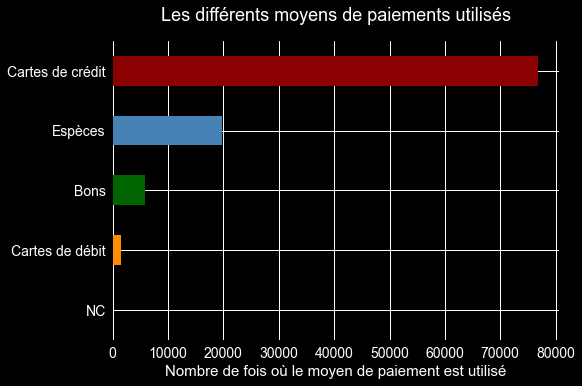

In [89]:
ax = dfs['order_payments']['payment_type'].value_counts()\
.plot(kind='barh', color=['darkred', 'steelblue', 'darkgreen', 'darkorange', 'yellow'])

plt.title("Les différents moyens de paiements utilisés", fontsize=18, pad=20)
plt.xlabel("Nombre de fois où le moyen de paiement est utilisé", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_yticklabels(['Cartes de crédit', 'Espèces', 'Bons', 'Cartes de débit', 'NC'])
plt.gca().invert_yaxis()

plt.show()

In [90]:
# On a plus de commandes (order_id) dans dfs['order_payments'] que dans dfs['orders']
dfs_merge_02 = pd.merge(df_customers_orders, dfs['order_payments'], on='order_id')
print("order_id unique count: ", len(dfs_merge_02['order_id'].unique()))
print(dfs_merge_02.shape, "\n")
print(dfs_merge_02.isna().any())
display(dfs_merge_02.loc[dfs_merge_02.duplicated(subset=['order_id'], keep=False)].sort_values('order_id'))

order_id unique count:  99440
(103886, 16) 

customer_id                      False
customer_unique_id               False
customer_zip_code_prefix         False
customer_city                    False
customer_state                   False
order_id                         False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
payment_sequential               False
payment_type                     False
payment_installments             False
payment_value                    False
dtype: bool


customer_id                customer_unique_id  \
76104   2c8b917c5d7dd720ebe36a5ed3b501ec  33febb33a42a35f5826a22584b127f9d   
76103   2c8b917c5d7dd720ebe36a5ed3b501ec  33febb33a42a35f5826a22584b127f9d   
103510  7fa80efb1ef15ca4104627910c29791c  205d5aa158338f2b733a07326aae8c87   
103511  7fa80efb1ef15ca4104627910c29791c  205d5aa158338f2b733a07326aae8c87   
74930   081a2d41949e652a50988fd39febb4a8  d462d9e30ff3df8b64ade2aac3cafc7a   
...                                  ...                               ...   
69272   f37c2634dfc8ac0ce3475d3cfc665b43  26cbea974bc958bc0192ab80777f3a06   
96085   26978239b9a0ccb40d576a0a099158b0  a86680d985911437a0c3f42c3f661b52   
96086   26978239b9a0ccb40d576a0a099158b0  a86680d985911437a0c3f42c3f661b52   
59475   7ba25938d3d2de27a81b3af43e2c5a51  753891c0cbdd8778fb704e13fac815e8   
59474   7ba25938d3d2de27a81b3af43e2c5a51  753891c0cbdd8778fb704e13fac815e8   

        customer_zip_code_prefix customer_city customer_state  \
76104                      45860   canavieiras             BA   
76103                      45860   canavieiras             BA   
103510                     42804      camacari             BA   
103511                     42804      camacari             BA   
74930                       4963     sao paulo             SP   
...                          ...           ...            ...   
69272                      72260      brasilia             DF   
96085                      91520  porto alegre             RS   
96086                      91520  porto alegre             RS   
59475                       3445     sao paulo             SP   
59474                       3445     sao paulo             SP   

                                order_id order_status  \
76104   0016dfedd97fc2950e388d2971d718c7    delivered   
76103   0016dfedd97fc2950e388d2971d718c7    delivered   
103510  002f19a65a2ddd70a090297872e6d64e      shipped   
103511  002f19a65a2ddd70a090297872e6d64e      shipped   
74930   0071ee2429bc1efdc43aa3e073a5290e    delivered   
...                                  ...          ...   
69272   ffa1dd97810de91a03abd7bd76d2fed1    delivered   
96085   ffa39020fe7c8a3e907320e1bec4b985    delivered   
96086   ffa39020fe7c8a3e907320e1bec4b985    delivered   
59475   ffc730a0615d28ec19f9cad02cb41442    delivered   
59474   ffc730a0615d28ec19f9cad02cb41442    delivered   

       order_purchase_timestamp    order_approved_at  \
76104       2017-04-28 19:54:40  2017-04-29 10:05:12   
76103       2017-04-28 19:54:40  2017-04-29 10:05:12   
103510      2018-03-21 13:05:30  2018-03-21 13:15:27   
103511      2018-03-21 13:05:30  2018-03-21 13:15:27   
74930       2018-01-22 11:08:15  2018-01-22 14:17:41   
...                         ...                  ...   
69272       2017-05-22 22:35:09  2017-05-23 22:42:56   
96085       2017-10-31 18:34:34  2017-10-31 19:34:38   
96086       2017-10-31 18:34:34  2017-10-31 19:34:38   
59475       2018-07-25 14:03:13  2018-07-25 14:15:15   
59474       2018-07-25 14:03:13  2018-07-25 14:15:15   

       order_delivered_carrier_date order_delivered_customer_date  \
76104           2017-05-16 08:40:49           2017-05-22 18:32:21   
76103           2017-05-16 08:40:49           2017-05-22 18:32:21   
103510          2018-03-22 00:13:35                           NaN   
103511          2018-03-22 00:13:35                           NaN   
74930           2018-01-26 15:12:17           2018-01-31 23:58:36   
...                             ...                           ...   
69272           2017-05-25 10:33:08           2017-06-06 16:40:29   
96085           2017-11-03 23:57:43           2017-11-21 20:41:55   
96086           2017-11-03 23:57:43           2017-11-21 20:41:55   
59475           2018-07-25 14:56:00           2018-07-26 22:05:08   
59474           2018-07-25 14:56:00           2018-07-26 22:05:08   

       order_estimated_delivery_date  payment_sequential payment_type  \
76104            2017-06-01 00:00:00               

In [91]:
# Ajout des order_reviews par commande (order_id)
# Une même commande peut avoir plusieurs commentaires différents
dfs_merge_03 = pd.merge(
    dfs_merge_02, dfs['order_reviews'],
    on='order_id',
    how='inner'
)
print("order_id unique count: ", len(dfs_merge_03['order_id'].unique()))
print(dfs_merge_03.shape, "\n")
print(dfs_merge_03.isna().any())
display(dfs_merge_03[[
    'order_id',
    'payment_sequential',
    'review_comment_message'
]].loc[dfs_merge_03.duplicated(subset=['order_id'], keep=False)].sort_values('order_id').tail(25))

order_id unique count:  99440
(104485, 22) 

customer_id                      False
customer_unique_id               False
customer_zip_code_prefix         False
customer_city                    False
customer_state                   False
order_id                         False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
payment_sequential               False
payment_type                     False
payment_installments             False
payment_value                    False
review_id                        False
review_score                     False
review_comment_title              True
review_comment_message            True
review_creation_date             False
review_answer_timestamp          False
dtype: bool


order_id  payment_sequential  \
39943  ff027db47fd74b1bcf2dd6c24f0b809e                   2   
60229  ff1f8f328e5a59ac754240b6dd31bcb4                   3   
60228  ff1f8f328e5a59ac754240b6dd31bcb4                   1   
60230  ff1f8f328e5a59ac754240b6dd31bcb4                   4   
60227  ff1f8f328e5a59ac754240b6dd31bcb4                   2   
69052  ff20ee702706d9e407a34de9fe2ff768                   1   
69051  ff20ee702706d9e407a34de9fe2ff768                   2   
53536  ff7400d904161b62b6e830b3988f5cbd                   2   
53535  ff7400d904161b62b6e830b3988f5cbd                   1   
16649  ff763b73e473d03c321bcd5a053316e8                   1   
16648  ff763b73e473d03c321bcd5a053316e8                   1   
31786  ff850ba359507b996e8b2fbb26df8d03                   1   
31785  ff850ba359507b996e8b2fbb26df8d03                   1   
37477  ff978de32e717acd3b5abe1fb069d2b6                   1   
37476  ff978de32e717acd3b5abe1fb069d2b6                   3   
37475  ff978de32e717acd3b5abe1fb069d2b6                   2   
37474  ff978de32e717acd3b5abe1fb069d2b6                   4   
69670  ffa1dd97810de91a03abd7bd76d2fed1                   2   
69671  ffa1dd97810de91a03abd7bd76d2fed1                   1   
96650  ffa39020fe7c8a3e907320e1bec4b985                   2   
96651  ffa39020fe7c8a3e907320e1bec4b985                   1   
77102  ffaabba06c9d293a3c614e0515ddbabc                   1   
77103  ffaabba06c9d293a3c614e0515ddbabc                   1   
59808  ffc730a0615d28ec19f9cad02cb41442                   1   
59807  ffc730a0615d28ec19f9cad02cb41442                   2   

                                  review_comment_message  
39943                                         Tudo certo  
60229  Amei....superou minhas expectivas!\r\nProduto ...  
60228  Amei....superou minhas expectivas!\r\nProduto ...  
60230  Amei....superou minhas expectivas!\r\nProduto ...  
60227  Amei....superou minhas expectivas!\r\nProduto ...  
69052                              Entrega super rápida   
69051                              Entrega super rápida   
53536                                                NaN  
53535                                                NaN  
16649                                                NaN  
16648  Não sei que haverá acontecido os demais chegaram   
31786                       Envio rapido... Produto 100%  
31785  Envio rapido, produto conforme descrito no anu...  
37477                          Ótimo produto, Recomendo.  
37476                          Ótimo produto, Recomendo.  
37475                          Ótimo produto, Recomendo.  
37474                          Ótimo produto, Recomendo.  
69670  Entrega feita antes do prazo e produto veio em...  
69671  Entrega feita antes do prazo e produto veio em...  
96650                                                NaN  
96651                                                NaN  
77102                                                NaN  
77103                                                NaN  
59808                                                NaN  
59807                                                NaN

Point rapide sur les relations :
<ul>
<li>A chaque commande (order_id) un customer_id est créé pour un client unique donné (customer_unique_id)</li>
<li>Une commande (order_id) peut être payée en plusieurs fois par différents moyens de paiements (payment_sequential)</li>
<li>Une commande (order_id) peut avoir plusieurs commentaires différents (mm si c'est pas fréquent) -> review_comment_message</li>
</ul>

In [92]:
# On ajoute dfs['geolocation']
# Un grand nombre de code postal sont présents plus d'une fois
print("Shape de dfs['geolocation'] :", dfs['geolocation'].shape)
print("Nombre de zip_code unique :", len(dfs['geolocation']['geolocation_zip_code_prefix'].unique()))
print(
    "Nombre de zip_code présent plus d'une fois :",
    (dfs['geolocation']['geolocation_zip_code_prefix'].value_counts() > 1).sum()
)

Shape de dfs['geolocation'] : (1000163, 5)
Nombre de zip_code unique : 19015
Nombre de zip_code présent plus d'une fois : 17972


In [93]:
df_unique_zip_code = dfs['geolocation'][[
    'geolocation_zip_code_prefix',
    'geolocation_city',
    'geolocation_state'
]].loc[dfs['geolocation']['geolocation_zip_code_prefix'].unique()]
df_unique_zip_code.head()

geolocation_zip_code_prefix geolocation_city geolocation_state
1037                         1046        sao paulo                SP
1046                         1003        sao paulo                SP
1041                         1012        sao paulo                SP
1035                         1007        sao paulo                SP
1012                         1035        são paulo                SP

In [94]:
# Plusieurs valeurs de geolocalisation pour un même code postal.
display(dfs['geolocation'].loc[dfs['geolocation']['geolocation_zip_code_prefix'] == 24220])
display(dfs['customers'].loc[dfs['customers']['customer_zip_code_prefix'] == 24220])

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
470805                        24220       -22.905817       -43.106989   
470811                        24220       -22.902306       -43.112545   
470812                        24220       -22.904567       -43.110491   
470820                        24220       -22.902575       -43.109192   
470821                        24220       -22.907500       -43.106170   
...                             ...              ...              ...   
474265                        24220       -22.904023       -43.111683   
474266                        24220       -22.905393       -43.100512   
474269                        24220       -22.906420       -43.104933   
474270                        24220       -22.909701       -43.108452   
474273                        24220       -22.903291       -43.113633   

       geolocation_city geolocation_state  
470805          niteroi                RJ  
470811          niteroi                RJ  
470812          niteroi                RJ  
470820          niteroi                RJ  
470821          niteroi                RJ  
...                 ...               ...  
474265          niteroi                RJ  
474266          niterói                RJ  
474269          niteroi                RJ  
474270          niteroi                RJ  
474273          niteroi                RJ  

[1146 rows x 5 columns]

customer_id                customer_unique_id  \
243    70ea60b3eebc4ffc330e070df05f0e00  2c77113623e849d30d75a10480b57108   
410    3d14c748bab7ae77e8dff7a9efb1bd38  c1c7632732a487b1221e7bfb627c575f   
515    2ad0fa5dbcc34ae3e276ceb5eeb3fd33  eb3c04f545e10b9e1c89a7db0051a334   
1008   78dbd9bbc19efcbc2dc802f2fcf30d9c  2161aebe2d9d920cb9d7ae3c8aa39940   
2060   d3e82ccec3cb5f956a38d96c057ceaae  fd7069cf6891edbf32ba84c9c3f083d4   
...                                 ...                               ...   
94283  bb1eb76deae42911446b07fa4fcfcd10  22955c4f2b6b70d8b0eca2d89232b202   
94410  4537e1008a9afab2213beb76df625f95  7014b6141883847be921f098927b239f   
94852  b8bf2f05b300b8e4dd66c7e74db08896  e2290c66058783b7308ba61b25e05550   
96079  f741f29bd8d93889055d286e667ea900  7df85229150b1552fb015ce85deea753   
98711  da7d957a36ea44a3b6dc9531d2e83148  6967046ccb04a0d6b57f4760f6048d18   

       customer_zip_code_prefix customer_city customer_state  
243                       24220       niteroi             RJ  
410                       24220       niteroi             RJ  
515                       24220       niteroi             RJ  
1008                      24220       niteroi             RJ  
2060                      24220       niteroi             RJ  
...                         ...           ...            ...  
94283                     24220       niteroi             RJ  
94410                     24220       niteroi             RJ  
94852                     24220       niteroi             RJ  
96079                     24220       niteroi             RJ  
98711                     24220       niteroi             RJ  

[124 rows x 5 columns]

#### Les produits 

In [95]:
df_products_w_en_cat = dfs['products'].merge(
    dfs['product_category'],
    on='product_category_name',
    how='left'
)
print(df_products_w_en_cat.shape)
# Y a t-il des catégories non traduites en anglais ? (oui correspond au graphique des valeurs manquantes sur les NaN)
df_products_w_en_cat.loc[df_products_w_en_cat['product_category_name_english'].isna()]

(32951, 10)


product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm product_category_name_english  
105                12.0                           NaN  
128                20.0                           NaN  
145                20.0                           NaN  
154                41.0                           NaN  
197                12.0                           NaN  
...                 ...                           ...  
32515              70.0                           NaN  
32589              23.0                           NaN  
32616              16.0                           NaN  
32772              45.0                           NaN  
32852              43.0                           NaN  

[623 rows x 10 columns]

In [96]:
# Inventaire des différents types de catégories (homogénéité ? = nommage ?)
# dfs['product_category'].info()
dfs['product_category']['product_category_name_english'].sort_values().head(50)

37           agro_industry_and_commerce
24                     air_conditioning
46                                  art
67                arts_and_craftmanship
20                                audio
2                                  auto
11                                 baby
3                        bed_bath_table
48               books_general_interest
57                       books_imported
39                      books_technical
64                    cds_dvds_musicals
54                   christmas_supplies
59                           cine_photo
53                            computers
1                 computers_accessories
19                       consoles_games
25      construction_tools_construction
43            construction_tools_lights
49            construction_tools_safety
22                           cool_stuff
27             costruction_tools_garden
36              costruction_tools_tools
68                  diapers_and_hygiene
58                               drinks


In [97]:
def split_category_words(value):
    """
        Fonction passée en apply d'un DataFrame et qui permet de modifier les 'strings'
    """
    #value = "'" + value + "'"
    value = value.replace("_", ", ")
    value = value.strip() # on joue la sécurité
    return value

In [98]:
en_product_cat = dfs['product_category']['product_category_name_english']

In [99]:
print(en_product_cat)

0                 health_beauty
1         computers_accessories
2                          auto
3                bed_bath_table
4               furniture_decor
                ...            
66                      flowers
67        arts_and_craftmanship
68          diapers_and_hygiene
69    fashion_childrens_clothes
70        security_and_services
Name: product_category_name_english, Length: 71, dtype: object


#### Les produits achetés

In [100]:
dfs_merge_03.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  ... payment_sequential  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57  ...                  1   
1  2018-01-12 20:58:32          2018-01-15 17:14:59  ...                  1   
2  2018-05-20 16:19:10          2018-06-11 14:31:00  ...                  1   
3  2018-03-13 17:29:19          2018-03-27 23:22:42  ...                  1   
4  2018-07-29 10:10:09          2018-07-30 15:16:00  ...                  1   

  payment_type  payment_installments payment_value  \
0  credit_card                     2        146.87   
1  credit_card                     8        335.48   
2  credit_card                     7        157.73   
3  credit_card                     1        173.30   
4  credit_card                     8        252.25   

                          review_id  review_score review_comment_title  \
0  88b8b52d46df026a9d1ad2136a59b30b             4                  NaN   
1  02fc48a9efa3e3d0f1a8ea26507eeec3             5                  NaN   
2  5ad6695d76ee186dc473c42706984d87             5                  NaN   
3  059a801bb31f6aab2266e672cab87bc5             5                  NaN   
4  8490879d58d6c5d7773f2739a03f089a             5        a melhor nota   

                          review_comment_message review_creation_date  \
0                                            NaN  2017-05-26 00:00:00   
1                                            NaN  2018-01-30 00:00:00   
2                                            NaN  2018-06-15 00:00:00   
3                                            NaN  2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon  2018-08-10 00:00:00   

  review_answer_timestamp  
0     2017-05-30 22:34:40  
1     2018-02-10 22:43:29  
2     2018-06-15 12:10:59  
3     2018-04-02 18:36:47  
4     2018-08-17 01:59:52  

[5 rows x 22 columns]

In [101]:
# Pour une commande (order_id) on peut avoir plusieurs fois le même produit (product_id)
dfs['order_items'][dfs['order_items']['order_item_id'] > 7]

order_id  order_item_id  \
1654    03caa2c082116e1d31e67e9ae3700499              8   
2039    04993613aee4046caf92ea17b316dcfb              8   
11939   1b15974a0141d54e36626dca3fdc731a              8   
11940   1b15974a0141d54e36626dca3fdc731a              9   
11941   1b15974a0141d54e36626dca3fdc731a             10   
...                                  ...            ...   
108270  f60ce04ff8060152c83c7c97e246d6a8              9   
108271  f60ce04ff8060152c83c7c97e246d6a8             10   
109128  f80549a97eb203e1566e026ab66f045b              8   
109129  f80549a97eb203e1566e026ab66f045b              9   
109130  f80549a97eb203e1566e026ab66f045b             10   

                              product_id                         seller_id  \
1654    5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   
2039    96d1c06692244e2fed6e1f9aa9552770  00ee68308b45bc5e2660cd833c3f81cc   
11939   ee3d532c8a438679776d222e997606b3  8e6d7754bc7e0f22c96d255ebda59eba   
11940   ee3d532c8a438679776d222e997606b3  8e6d7754bc7e0f22c96d255ebda59eba   
11941   ee3d532c8a438679776d222e997606b3  8e6d7754bc7e0f22c96d255ebda59eba   
...                                  ...                               ...   
108270  58efb9b638561ce132216a9a612513e2  701938c450705b8ae65fc923b70f35c7   
108271  58efb9b638561ce132216a9a612513e2  701938c450705b8ae65fc923b70f35c7   
109128  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109129  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109130  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   

        shipping_limit_date    price  freight_value  
1654    2017-10-06 15:28:20  1680.00          28.01  
2039    2018-02-07 02:52:44    62.00          10.54  
11939   2018-03-01 02:50:48   100.00          10.12  
11940   2018-03-01 02:50:48   100.00          10.12  
11941   2018-03-01 02:50:48   100.00          10.12  
...                     ...      ...            ...  
108270  2017-12-04 22:31:28   109.97          34.04  
108271  2017-12-04 22:31:28   109.97          34.04  
109128  2017-09-19 03:15:47   137.90          38.81  
109129  2017-09-19 03:15:47   137.90          38.81  
109130  2017-09-19 03:15:47   137.90          38.81  

[155 rows x 7 columns]

In [102]:
# Inspection de valeur spécifique pour compréhension
dfs['order_items'][dfs['order_items']['order_id'] == '001ab0a7578dd66cd4b0a71f5b6e1e41']

order_id  order_item_id  \
42  001ab0a7578dd66cd4b0a71f5b6e1e41              1   
43  001ab0a7578dd66cd4b0a71f5b6e1e41              2   
44  001ab0a7578dd66cd4b0a71f5b6e1e41              3   

                          product_id                         seller_id  \
42  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
43  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
44  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   

    shipping_limit_date  price  freight_value  
42  2018-01-04 02:33:42  24.89          17.63  
43  2018-01-04 02:33:42  24.89          17.63  
44  2018-01-04 02:33:42  24.89          17.63

In [103]:
dfs['order_items'][dfs['order_items']['order_id'] == 'f80549a97eb203e1566e026ab66f045b']

order_id  order_item_id  \
109121  f80549a97eb203e1566e026ab66f045b              1   
109122  f80549a97eb203e1566e026ab66f045b              2   
109123  f80549a97eb203e1566e026ab66f045b              3   
109124  f80549a97eb203e1566e026ab66f045b              4   
109125  f80549a97eb203e1566e026ab66f045b              5   
109126  f80549a97eb203e1566e026ab66f045b              6   
109127  f80549a97eb203e1566e026ab66f045b              7   
109128  f80549a97eb203e1566e026ab66f045b              8   
109129  f80549a97eb203e1566e026ab66f045b              9   
109130  f80549a97eb203e1566e026ab66f045b             10   

                              product_id                         seller_id  \
109121  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109122  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109123  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109124  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109125  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109126  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109127  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109128  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109129  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   
109130  d5991653e037ccb7af6ed7d94246b249  25c5c91f63607446a97b143d2d535d31   

        shipping_limit_date  price  freight_value  
109121  2017-09-19 03:15:47  137.9          38.81  
109122  2017-09-19 03:15:47  137.9          38.81  
109123  2017-09-19 03:15:47  137.9          38.81  
109124  2017-09-19 03:15:47  137.9          38.81  
109125  2017-09-19 03:15:47  137.9          38.81  
109126  2017-09-19 03:15:47  137.9          38.81  
109127  2017-09-19 03:15:47  137.9          38.81  
109128  2017-09-19 03:15:47  137.9          38.81  
109129  2017-09-19 03:15:47  137.9          38.81  
109130  2017-09-19 03:15:47  137.9          38.81

In [104]:
dfs['order_items'][dfs['order_items']['order_item_id'] > 1].sort_values('order_id').head(25)

order_id  order_item_id  \
14   0008288aa423d2a3f00fcb17cd7d8719              2   
33   00143d0f86d6fbd9f9b38ab440ac16f5              2   
34   00143d0f86d6fbd9f9b38ab440ac16f5              3   
43   001ab0a7578dd66cd4b0a71f5b6e1e41              2   
44   001ab0a7578dd66cd4b0a71f5b6e1e41              3   
49   001d8f0e34a38c37f7dba2a37d4eba8b              2   
76   002c9def9c9b951b1bec6d50753c9891              2   
81   002f98c0f7efd42638ed6100ca699b42              2   
88   003324c70b19a16798817b2b3640e721              2   
92   00337fe25a3780b3424d9ad7c5a4b35e              2   
102  003822434f91204da0a51fe4cf2aba18              2   
112  003f201cdd39cdd59b6447cff2195456              2   
136  005059edee63c8c708ba61910793b31b              2   
138  00526a9d4ebde463baee25f386963ddc              2   
139  00526a9d4ebde463baee25f386963ddc              3   
140  00526a9d4ebde463baee25f386963ddc              4   
144  00571ded73b3c061925584feab0db425              2   
152  005d9a5423d47281ac463a968b3936fb              2   
153  005d9a5423d47281ac463a968b3936fb              3   
167  0068c109948b9a1dfb8530d1978acef3              2   
210  008d9bf350ff02ed444b3452cf3f57e0              2   
220  00946f674d880be1f188abc10ad7cf46              2   
231  0097f0545a302aafa32782f1734ff71c              2   
235  009905140e9f8cc35d5be897937381db              2   
253  00a57dfbb049fbaae10763e2cf15f797              2   

                           product_id                         seller_id  \
14   368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
33   e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34   e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
43   0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
44   0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
49   e67307ff0f15ade43fcb6e670be7a74c  f4aba7c0bca51484c30ab7bdc34bcdd1   
76   2d9ff06c8870a518f5f6909774e140fb  00720abe85ba0859807595bbf045a33b   
81   880be32f4db1d9f6e2bec38fb6ac23ab  fa40cc5b934574b62717c68f3d678b6d   
88   2b939dc9b176d7fa21594d588815d4a4  dbc22125167c298ef99da25668e1011f   
92   13944d17b257432717fd260e69853140  cfb1a033743668a192316f3c6d1d2671   
102  99e71b776debf2f01a69dce207e3e4f8  c54679b132454625907c773d273d4126   
112  656e0eca68dcecf6a31b8ececfabe3e8  0b90b6df587eb83608a64ea8b390cf07   
136  84f456958365164420cfc80fbe4c7fab  4a3ca9315b744ce9f8e9374361493884   
138  0c4a0f8ab44f9acd2d04e7024f9ba362  7210cd29727d674c00741e5e387b3ccd   
139  0c4a0f8ab44f9acd2d04e7024f9ba362  7210cd29727d674c00741e5e387b3ccd   
140  0c4a0f8ab44f9acd2d04e7024f9ba362  7210cd29727d674c00741e5e387b3ccd   
144  8695c431b31927efef5343e675f279e7  fe2032dab1a61af8794248c8196565c9   
152  4c3ae5db49258df0784827bdacf3b396  d98eec89afa3380e14463da2aabaea72   
153  4c3ae5db49258df0784827bdacf3b396  d98eec89afa3380e14463da2aabaea72   
167  525f8fbde09c9bf777025c3141fbbc6e  8b321bb669392f5163d04c59e235e066   
210  efec0b0b076ce3f164b80145743ebc02  1da3aeb70d7989d1e6d9b0e887f97c23   
220  9bb2d066e4b33b624cbdfec7d50b3dcb  5cf13accae3222c70a9cac40818ae839   
231  636598095d69a5718e67d2c9a3c7dde6  7901646fdd36a55f564ffaf2dbccaaf7   
235  06edb72f1e0c64b14c5b79353f7abea3  391fc6631aebcf3004804e51b40bcf1e   
253  56cdfe67fbda57c1dcc752f5f361f981  1c68394e931a64f90ea236c5ea590300   

     shipping_limit_date   price  freight_value  
14   2018-02-21 02:55:52   49.90          13.37  
33   2017-10-20 16:07:52   21.33          15.10  
34   2017-10-20 16:07:52   21.33          15.10  
43   2018-01-04 02:33:42   24.89          17.63  
44   2018-01-04 02:33:42   24.89          17.63  
49   2017-05-18 17:35:11   18.99           7.78  
76   2018-05-21 17:32:03   78.00           8.90  
81   2017-08-10 09:30:15   44.90           7.16  
88   2017-05-24 19:22:34  102.90          14.45  
92   2017-09-29 17:50:16   59.90           9.94  
102  2018-06-21 02:30:28   69.00          18.58  
112  2018-03-05 17:10

In [105]:
# Bizarre : chaque fois qu'une commande compte plusieurs articles c'est automatiquement le même produit commandé !?
dfs['order_items'][
    (dfs['order_items']['order_item_id'] > 1) & \
    (dfs['order_items']['product_id'] != dfs['order_items']['product_id'])
].sort_values(by='order_id')

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []

In [106]:
# Est-ce qu'un produit (product_id) peut être vendu par plusieurs vendeurs (seller_id)
# hypothèse -> un unique vendeur pour un seul produit ?
print(len(dfs['order_items']['product_id'].unique()) == len(dfs['order_items']['seller_id'].unique()))

# nombre de produits différents vendus par vendeurs
display(dfs['order_items'].groupby('seller_id').agg({'product_id': 'count'}))

# nombre de vendeurs différents par produits
product_sellers = dfs['order_items'].groupby('product_id').agg({'seller_id': 'count'})
display(product_sellers[product_sellers['seller_id'] > 1].sort_values('seller_id', ascending=False))
print("Nombre de produits uniques :" ,product_sellers.shape[0]) # Correspond bien à la table dfs['sellers']

False


product_id
seller_id                                   
0015a82c2db000af6aaaf3ae2ecb0532           3
001cca7ae9ae17fb1caed9dfb1094831         239
001e6ad469a905060d959994f1b41e4f           1
002100f778ceb8431b7a1020ff7ab48f          55
003554e2dce176b5555353e4f3555ac8           1
...                                      ...
ffcfefa19b08742c5d315f2791395ee5           1
ffdd9f82b9a447f6f8d4b91554cc7dd3          20
ffeee66ac5d5a62fe688b9d26f83f534          14
fffd5413c0700ac820c7069d66d98c89          61
ffff564a4f9085cd26170f4732393726          20

[3095 rows x 1 columns]

seller_id
product_id                                 
aca2eb7d00ea1a7b8ebd4e68314663af        527
99a4788cb24856965c36a24e339b6058        488
422879e10f46682990de24d770e7f83d        484
389d119b48cf3043d311335e499d9c6b        392
368c6c730842d78016ad823897a372db        388
...                                     ...
7ba2e13e168f62391e3f2e9c946bc2be          2
7b969300f6d3f896ec4d7af6227ecc07          2
7b822833c7cc8905ab8174b55ac878fa          2
7b7867b1566350578959e705c5a46b2f          2
815d8a47625751d186ae410a78cb58bc          2

[14834 rows x 1 columns]

Nombre de produits uniques : 32951


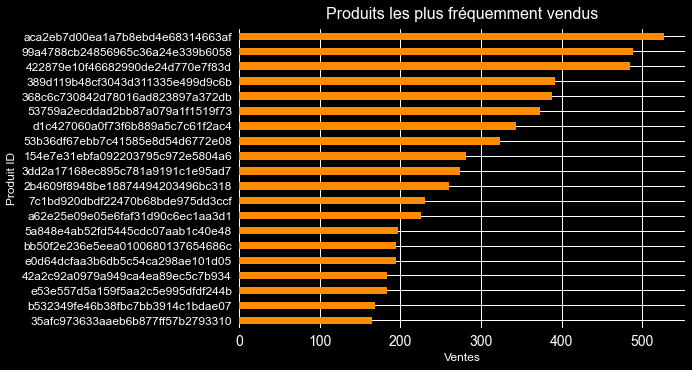

In [107]:
ds_most_sold_products = dfs['order_items'].value_counts('product_id')
ds_most_sold_products.nlargest(20).plot(kind='barh', color='darkorange')

plt.gca().invert_yaxis()
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel("Ventes", fontsize=12)
plt.ylabel("Produit ID", fontsize=12)
plt.title("Produits les plus fréquemment vendus", fontsize=16, pad=10)

plt.show()

#### Statut des commandes

order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
dtype: float64

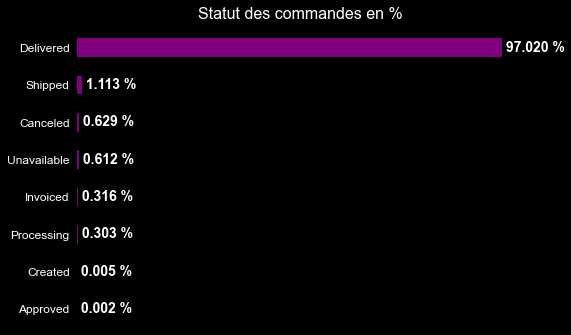

In [108]:
ds_orders_status = dfs['orders'].value_counts('order_status').divide(len(dfs['orders'])).multiply(100)
display(ds_orders_status)

ds_orders_status.plot(kind='barh', color='purple')
plt.gca().invert_yaxis()
plt.xticks(fontsize=14)
plt.yticks(
    range(0, len(ds_orders_status)),
    [status.capitalize() for status in ds_orders_status.index],      
    fontsize=12
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False
)
plt.ylabel("")
plt.title("Statut des commandes en %", fontsize=16, pad=10)
for i, v in enumerate(ds_orders_status):
    plt.text(
        v,
        i + 0.1,
        " {:.3f} %".format(v),
        color='w',
        fontweight='bold',
        fontsize=14
    )
plt.grid() # On enlève la grille

plt.show()

#### Fréquence des commandes

In [109]:
dfs['orders'].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [110]:
# On convertit les dtypes correspondants en datetime
dfs['orders'].dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [111]:
dfs['orders'][[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]] = dfs['orders'][[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]].apply(pd.to_datetime, infer_datetime_format=True, errors='coerce') 

In [112]:
# Affichage des "premières" dates par colonne type
dfs['orders'][[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]].min()

order_purchase_timestamp        2016-09-04 21:15:19
order_approved_at               2016-09-15 12:16:38
order_delivered_carrier_date    2016-10-08 10:34:01
order_delivered_customer_date   2016-10-11 13:46:32
order_estimated_delivery_date   2016-09-30 00:00:00
dtype: datetime64[ns]

In [113]:
# Affichage des "dernières" dates par colonne type
dfs['orders'][[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]].max()

order_purchase_timestamp        2018-10-17 17:30:18
order_approved_at               2018-09-03 17:40:06
order_delivered_carrier_date    2018-09-11 19:48:28
order_delivered_customer_date   2018-10-17 13:22:46
order_estimated_delivery_date   2018-11-12 00:00:00
dtype: datetime64[ns]

In [114]:
# Affichage de la fréquence (par jour) des commandes clients (sans distinction) -> Validé ou non
df_order_freq = dfs['orders'].groupby(dfs['orders']['order_purchase_timestamp'].dt.date)['order_id'].agg('count')

In [115]:
print("Nombre maximum de commandes en une journée sur 2 ans : ", df_order_freq.max())

Nombre maximum de commandes en une journée sur 2 ans :  1176


In [116]:
idx_max_orders = df_order_freq[df_order_freq == df_order_freq.max()].index[0]
date_max_orders = idx_max_orders.strftime('%d/%m/%Y')
mpl_idx_max_orders = dt.datetime(2017, 11, 24)
print(idx_max_orders)
print(date_max_orders)
print(mpl_idx_max_orders)
print(mdates.date2num(mpl_idx_max_orders))

2017-11-24
24/11/2017
2017-11-24 00:00:00
17494.0


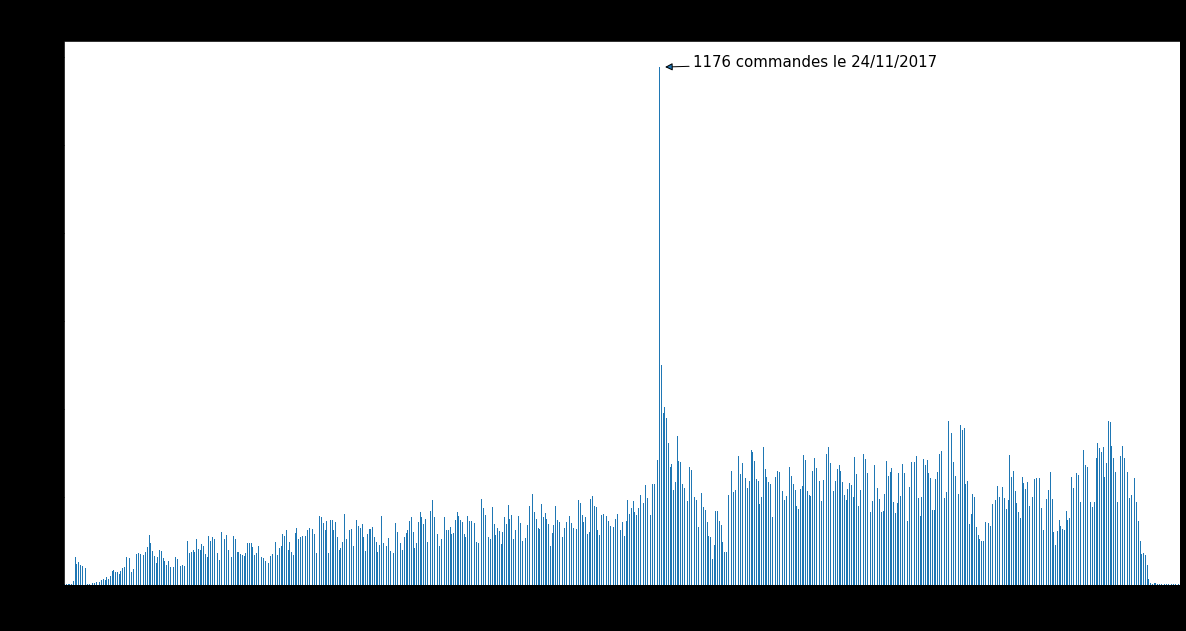

In [117]:
plt.figure(figsize=(20, 10))
plt.style.use('default')

df_order_freq.plot(kind='bar', rot=0)
plt.xticks(
    plt.xticks()[0][1::60], # Retourne la position 1 fois sur 60
    [str(x)[:-3] for x in df_order_freq.index[1::60]], # Retourne la date 1/60 avec l'année et le mois
    fontsize=12
)
plt.yticks(fontsize=12)
plt.ylabel("Nombre de commandes par jour", fontsize=16)
plt.xlabel("Date de commande", fontsize=16)
plt.title("Observation du nombre de commandes par dates", fontsize=18, pad=20)
plt.annotate(
    "{} commandes le {}".format(df_order_freq.max(), date_max_orders),
    xy=(340, 1176),
    xytext=(30, 0), # position relative par rapport au marqueur
    textcoords='offset points',
    arrowprops=dict(arrowstyle='-|>'),
    fontsize=15
    )

plt.show()

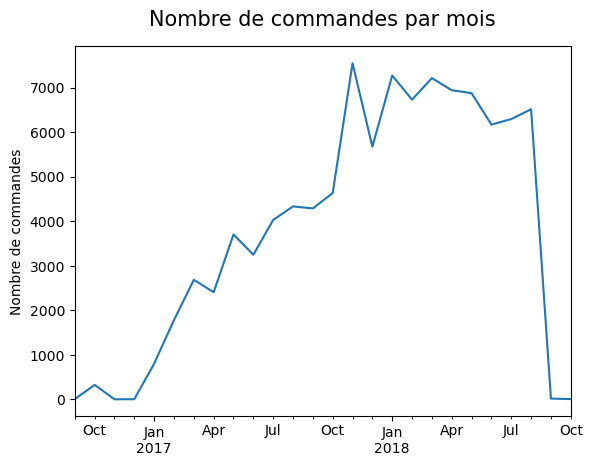

In [118]:
df_orders_month = pd.DataFrame(df_order_freq)
df_orders_month.index = pd.to_datetime(df_orders_month.index) # format en datetimeindex avec secondes

df_orders_month['order_id'].resample('M').sum().plot()
plt.title("Nombre de commandes par mois", fontsize=15, pad=15)
plt.xlabel("")
plt.ylabel("Nombre de commandes")

plt.show()

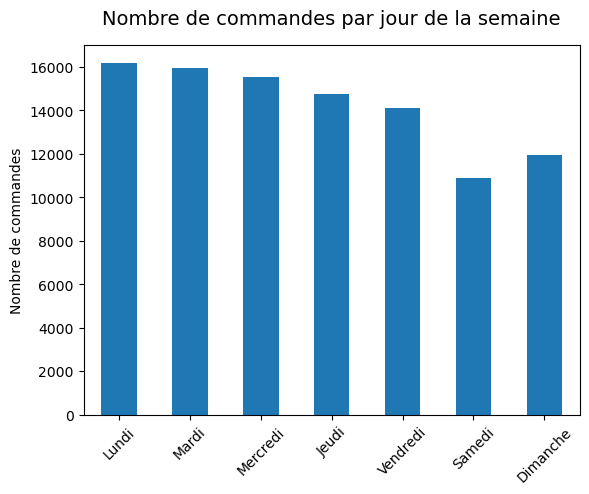

In [119]:
ds_orders_weekday = df_orders_month.groupby(df_orders_month.index.strftime("%A"))['order_id'].agg('sum')\
.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ds_orders_weekday.plot(kind='bar', rot=45)

plt.title("Nombre de commandes par jour de la semaine", fontsize=14, pad=15)
plt.xlabel("")
plt.ylabel("Nombre de commandes")
plt.xticks(
    range(0, len(ds_orders_weekday)),
    ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
)

plt.show()

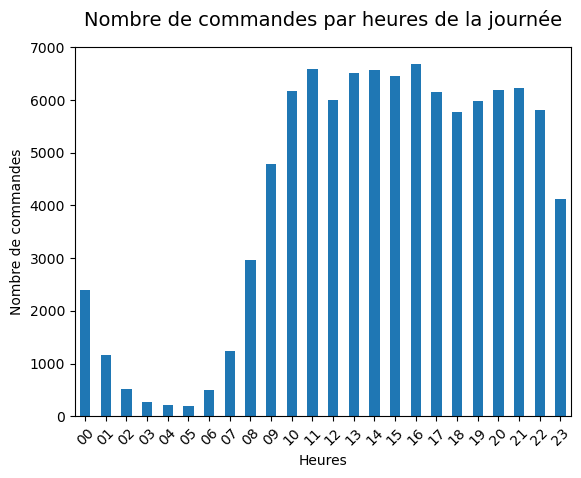

In [120]:
# Heures où les commandes sont passées
# https://strftime.org/
ds_orders_hourly = \
dfs['orders'].groupby(dfs['orders']['order_purchase_timestamp'].dt.strftime("%H"))['order_id'].count()

ds_orders_hourly.plot(kind='bar', rot=45)
plt.title("Nombre de commandes par heures de la journée", fontsize=14, pad=15)
plt.xlabel("Heures")
plt.ylabel("Nombre de commandes")

plt.show()

In [121]:
df_orders_freq = dfs['orders'].sort_values(by='order_purchase_timestamp').copy()

In [122]:
df_orders_freq['order_freq'] = df_orders_freq['order_purchase_timestamp'].diff()

In [123]:
df_orders_freq[['order_purchase_timestamp', 'order_freq']].head()

order_purchase_timestamp       order_freq
4541       2016-09-04 21:15:19              NaT
4396       2016-09-05 00:15:34  0 days 03:00:15
10071      2016-09-13 15:24:19  8 days 15:08:45
30710      2016-09-15 12:16:38  1 days 20:52:19
83078      2016-10-02 22:07:52 17 days 09:51:14

In [124]:
df_orders_diff = pd.DataFrame(df_orders_freq.iloc[1:, -1]).reset_index(drop=True)

In [125]:
df_orders_diff 

order_freq
0      0 days 03:00:15
1      8 days 15:08:45
2      1 days 20:52:19
3     17 days 09:51:14
4      0 days 11:36:58
...                ...
99435  3 days 00:32:48
99436  2 days 06:17:06
99437  2 days 03:25:20
99438 13 days 01:20:33
99439  0 days 21:14:16

[99440 rows x 1 columns]

In [126]:
print(
    "Temps médian entre deux commandes : {} minutes".format(
        df_orders_diff['order_freq'].dt.total_seconds().sort_values().median() / 60)
)

Temps médian entre deux commandes : 3.7 minutes


#### Montants des commandes

In [127]:
dfs['order_payments'].head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [128]:
dfs['order_payments']['payment_value'].isna().sum()

0

In [129]:
df_payments_stats = dfs['order_payments']['payment_value'].describe()

In [130]:
df_payments_stats['median'] = dfs['order_payments']['payment_value'].median()

In [131]:
df_payments_stats

count     103886.000000
mean         154.100380
std          217.494064
min            0.000000
25%           56.790000
50%          100.000000
75%          171.837500
max        13664.080000
median       100.000000
Name: payment_value, dtype: float64

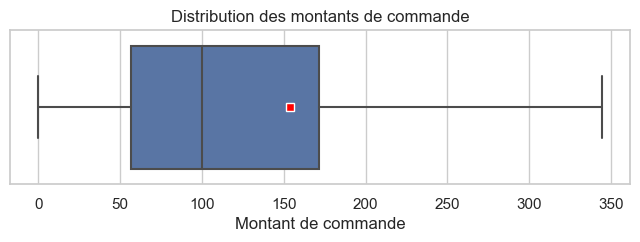

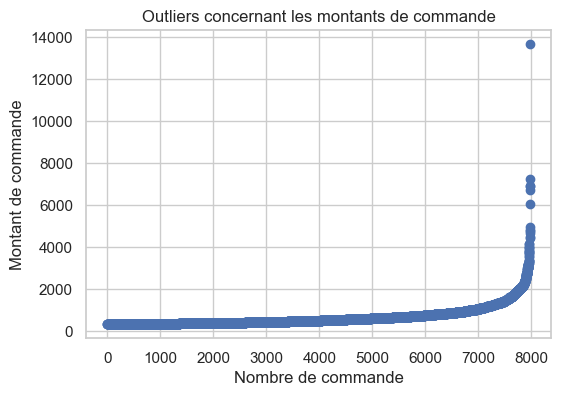

In [132]:
plt.figure(figsize=(8,2))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(
    x=dfs['order_payments']['payment_value'],
    showfliers=False,
    showmeans=True,
    meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"white"}
)
plt.title("Distribution des montants de commande")
plt.xlabel("Montant de commande")
plt.show()

# On récupère les outliers séparément (ici on les calcule)
outliers = [x for stat in boxplot_stats(dfs['order_payments']['payment_value']) for x in stat['fliers']]
# print(outliers)
type(outliers)
plt.figure(figsize=(6,4))
plt.scatter(x=range(0, len(outliers)), y=sorted(outliers))
plt.title("Outliers concernant les montants de commande")
plt.xlabel("Nombre de commande")
plt.ylabel("Montant de commande")

plt.show()

In [133]:
dfs['order_items']

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [134]:
# On a plusieurs order_id (non uniques)
# Hypothèse : un order_id par product_id (produit commandé plusieurs fois = plusieurs order_id ?)
print(dfs['order_items'].shape[0])
print(len(dfs['order_items']['order_id'].unique()))
# On observe les valeurs ayant plusieurs product_id pour un order_id
dfs['order_items']\
.loc[dfs['order_items'][dfs['order_items']['order_item_id'] > 1].index]\
.sort_values('order_id')\
.head()

112650
98666


order_id  order_item_id  \
14  0008288aa423d2a3f00fcb17cd7d8719              2   
33  00143d0f86d6fbd9f9b38ab440ac16f5              2   
34  00143d0f86d6fbd9f9b38ab440ac16f5              3   
43  001ab0a7578dd66cd4b0a71f5b6e1e41              2   
44  001ab0a7578dd66cd4b0a71f5b6e1e41              3   

                          product_id                         seller_id  \
14  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
33  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
43  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
44  0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   

    shipping_limit_date  price  freight_value  
14  2018-02-21 02:55:52  49.90          13.37  
33  2017-10-20 16:07:52  21.33          15.10  
34  2017-10-20 16:07:52  21.33          15.10  
43  2018-01-04 02:33:42  24.89          17.63  
44  2018-01-04 02:33:42  24.89          17.63

In [135]:
# On regarde les premières lignes pour compréhension:
# Ici le produit est commandé deux fois soit 49.90 * 2 + 2 fois le frais de port.
dfs['order_payments'][dfs['order_payments']['order_id'] == '0008288aa423d2a3f00fcb17cd7d8719']

order_id  payment_sequential payment_type  \
85982  0008288aa423d2a3f00fcb17cd7d8719                   1       boleto   

       payment_installments  payment_value  
85982                     1         126.54

In [136]:
# On inspecte les valeurs de comandes à zéro (avoir intégral ou partiel du site ?)
# Réponse : oui c'est possible
dfs['order_payments'][dfs['order_payments']['payment_value'] == 0]

order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
51280                      1            0.0  
57411                      1            0.0  
62674                      1            0.0  
77885                      1            0.0  
94427                      1            0.0  
100766                     1            0.0

In [137]:
# On regarde pour la commande dont le montant est maximum
dfs['order_payments'].sort_values('payment_value').iloc[-1, :]

order_id                03caa2c082116e1d31e67e9ae3700499
payment_sequential                                     1
payment_type                                 credit_card
payment_installments                                   1
payment_value                                   13664.08
Name: 52107, dtype: object

In [138]:
# Par correspondance on regarde l'order_id dans le DataFrame dfs['order_items']
display(dfs['order_items'][dfs['order_items']['order_id'] == '03caa2c082116e1d31e67e9ae3700499'])
print(dfs['order_items'][[
    'price',
    'freight_value'
]][dfs['order_items']['order_id'] == '03caa2c082116e1d31e67e9ae3700499'].sum())

order_id  order_item_id  \
1647  03caa2c082116e1d31e67e9ae3700499              1   
1648  03caa2c082116e1d31e67e9ae3700499              2   
1649  03caa2c082116e1d31e67e9ae3700499              3   
1650  03caa2c082116e1d31e67e9ae3700499              4   
1651  03caa2c082116e1d31e67e9ae3700499              5   
1652  03caa2c082116e1d31e67e9ae3700499              6   
1653  03caa2c082116e1d31e67e9ae3700499              7   
1654  03caa2c082116e1d31e67e9ae3700499              8   

                            product_id                         seller_id  \
1647  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   
1648  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   
1649  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   
1650  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   
1651  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   
1652  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   
1653  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   
1654  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2   

      shipping_limit_date   price  freight_value  
1647  2017-10-06 15:28:20  1680.0          28.01  
1648  2017-10-06 15:28:20  1680.0          28.01  
1649  2017-10-06 15:28:20  1680.0          28.01  
1650  2017-10-06 15:28:20  1680.0          28.01  
1651  2017-10-06 15:28:20  1680.0          28.01  
1652  2017-10-06 15:28:20  1680.0          28.01  
1653  2017-10-06 15:28:20  1680.0          28.01  
1654  2017-10-06 15:28:20  1680.0          28.01

price            13440.00
freight_value      224.08
dtype: float64


#### Relation price vs freight_value ?

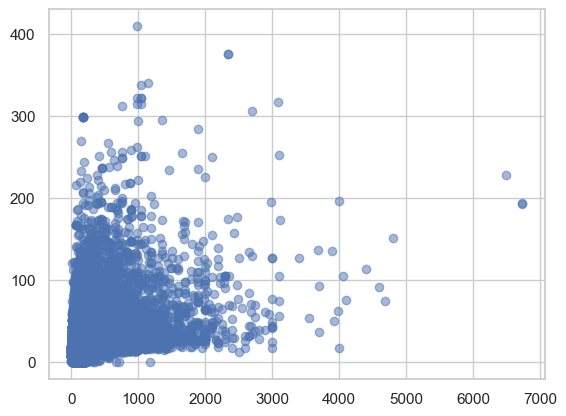

In [139]:
plt.scatter(x=dfs['order_items']['price'], y=dfs['order_items']['freight_value'], alpha=0.5)
plt.show()

In [140]:
# Observation des variables qui caractérisent un produit (pairplot)
df_products_order_items = dfs['products'].merge(dfs['order_items'], how='left', on='product_id')

In [141]:
df_products_order_items.drop_duplicates('product_id', keep='first', inplace=True)

In [142]:
df_products_order_items.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

                           order_id  order_item_id  \
0  e17e4f88e31525f7deef66779844ddce              1   
1  5236307716393b7114b53ee991f36956              1   
2  01f66e58769f84129811d43eefd187fb              1   
3  143d00a4f2dde4e0364ee1821577adb3              1   
4  86cafb8794cb99a9b1b77fc8e48fbbbb              1   

                          seller_id  shipping_limit_date   price  \
0  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-30 17:33:54   10.91   
1  b561927807645834b59ef0d16ba55a24  2018-02-06 19:11:15  248.00   
2  7b07b3c7487f0ea825fc6df75abd658b  2018-07-11 21:30:20   79.80   
3  c510bc1718f0f2961eaa42a23330681a  2018-08-07 09:10:13  112.30   
4  0be8ff43f22e456b4e0371b2245e4d01  2018-04-17 01:30:23   37.90   

   freight_value  
0           7.39  
1          17.99  
2           7.82  
3           9.54  
4           8.29

In [143]:
df_products_order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   order_id                    32951 non-null  object 
 10  order_item_id               32951 non-null  int64  
 11  seller_id                   32951 non-null  object 
 12  shipping_limit_date         32951 non-null  object 
 13  price                       32

In [144]:
"""sns.pairplot(df_products_order_items[[
    'product_weight_g',
    'price',
    'freight_value',
    'product_category_name'
]], hue='product_category_name', diag_kind='hist')"""

"sns.pairplot(df_products_order_items[[\n    'product_weight_g',\n    'price',\n    'freight_value',\n    'product_category_name'\n]], hue='product_category_name', diag_kind='hist')"

#### Temps entre la commande et la livraison client

In [145]:
dfs['orders'].dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [146]:
dfs['orders']['order_delivery_time'] = \
dfs['orders']['order_delivered_customer_date'] - dfs['orders']['order_purchase_timestamp']

In [147]:
dfs['orders']['order_delivery_time'].isna().sum()

2965

In [148]:
dfs['orders']['order_delivery_time'].describe()

count                         96476
mean     12 days 13:24:31.879068369
std       9 days 13:07:00.181125305
min                 0 days 12:48:07
25%          6 days 18:23:37.250000
50%                10 days 05:13:34
75%         15 days 17:17:16.250000
max               209 days 15:05:12
Name: order_delivery_time, dtype: object

In [149]:
dfs['orders'][dfs['orders']['order_delivery_time'] == dfs['orders']['order_delivery_time'].max()]

order_id                       customer_id  \
19590  ca07593549f1816d26a572e06dc1eab6  75683a92331068e2d281b11a7866ba44   

      order_status order_purchase_timestamp   order_approved_at  \
19590    delivered      2017-02-21 23:31:27 2017-02-23 02:35:15   

      order_delivered_carrier_date order_delivered_customer_date  \
19590          2017-03-08 13:47:46           2017-09-19 14:36:39   

      order_estimated_delivery_date order_delivery_time  
19590                    2017-03-22   209 days 15:05:12

In [150]:
# On doit garder 'order_purchase_timestamp' pour savoir à quel période le client a commandé
# Par contre on peut supprimer 'order_delivered_customer_date' ensuite
dfs['orders'].drop(['order_delivered_customer_date'], axis=1, inplace=True)

In [151]:
# Conversion du dtype en days uniquement
# display(dfs['orders']['order_delivery_time'])
dfs['orders']['order_delivery_time'] = dfs['orders']['order_delivery_time'] / np.timedelta64(1, 'D')
display(dfs['orders']['order_delivery_time'])

0         8.436574
1        13.782037
2         9.394213
3        13.208750
4         2.873877
           ...    
99436     8.218009
99437    22.193727
99438    24.859421
99439    17.086424
99440     7.674306
Name: order_delivery_time, Length: 99441, dtype: float64

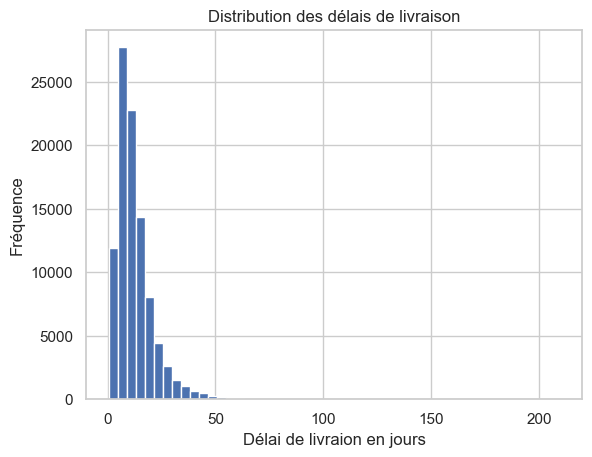

Valeur de bin max :  [4.71531829]
Fréquence correspondante :  27722.0


In [152]:
counts, bins, bars = plt.hist(
    x=dfs['orders']['order_delivery_time'],
    bins=50)

plt.title("Distribution des délais de livraison")
plt.xlabel("Délai de livraion en jours")
plt.ylabel("Fréquence")

plt.show()
print("Valeur de bin max : ", bins[np.where(counts == counts.max())])
print("Fréquence correspondante : ", counts.max())

### Catégories produits

In [153]:
# Est-ce que les deux tables ont bien les mêmes catégories ?
dfs['product_category'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [154]:
df_product_cat_en = dfs['products'].merge(dfs['product_category'], on='product_category_name', how='left')
# Est-ce que les Nan de 'product_category_name' et sont ceux de 'product_category_name_english' sont les mêmes ?
print(len(df_product_cat_en[df_product_cat_en['product_category_name_english'].isnull()]))
print(len(df_product_cat_en[df_product_cat_en['product_category_name'].isnull()]))

623
610


In [155]:
idx_list_to_check = \
sorted(list(set(df_product_cat_en[df_product_cat_en['product_category_name_english'].isnull()].index) - \
set(df_product_cat_en[df_product_cat_en['product_category_name'].isnull()].index)))

In [156]:
df_product_cat_en[['product_category_name', 'product_category_name_english']].loc[idx_list_to_check, :]

product_category_name  \
1628                                        pc_gamer   
5821   portateis_cozinha_e_preparadores_de_alimentos   
7325   portateis_cozinha_e_preparadores_de_alimentos   
7478                                        pc_gamer   
8819   portateis_cozinha_e_preparadores_de_alimentos   
11039  portateis_cozinha_e_preparadores_de_alimentos   
14266  portateis_cozinha_e_preparadores_de_alimentos   
16182  portateis_cozinha_e_preparadores_de_alimentos   
16930                                       pc_gamer   
17800  portateis_cozinha_e_preparadores_de_alimentos   
18610  portateis_cozinha_e_preparadores_de_alimentos   
26890  portateis_cozinha_e_preparadores_de_alimentos   
29919  portateis_cozinha_e_preparadores_de_alimentos   

      product_category_name_english  
1628                            NaN  
5821                            NaN  
7325                            NaN  
7478                            NaN  
8819                            NaN  
11039                           NaN  
14266                           NaN  
16182                           NaN  
16930                           NaN  
17800                           NaN  
18610                           NaN  
26890                           NaN  
29919                           NaN

In [157]:
# On corrige les lignes de la colonne 'product_category_name_english' n'ayant pas de valeur
df_product_cat_en.loc[df_product_cat_en['product_category_name'] == \
                      "pc_gamer", 'product_category_name_english'] = "pc gamer"

# idem (portugais) : portable kitchen food preparers -> portateis_cozinha_e_preparadores_de_alimentos
df_product_cat_en.loc[df_product_cat_en['product_category_name'] == \
                      "portateis_cozinha_e_preparadores_de_alimentos",
                      'product_category_name_english'] = "portable kitchen food preparers"

df_product_cat_en.loc[df_product_cat_en['product_category_name'].isnull(),
                      ['product_category_name', 'product_category_name_english']] = "unknown"

In [158]:
df_product_cat_en.loc[df_product_cat_en['product_category_name'] == "unknown"]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a               unknown   
128    d8dee61c2034d6d075997acef1870e9b               unknown   
145    56139431d72cd51f19eb9f7dae4d1617               unknown   
154    46b48281eb6d663ced748f324108c733               unknown   
197    5fb61f482620cb672f5e586bb132eae9               unknown   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a               unknown   
32589  10dbe0fbaa2c505123c17fdc34a63c56               unknown   
32616  bd2ada37b58ae94cc838b9c0569fecd8               unknown   
32772  fa51e914046aab32764c41356b9d4ea4               unknown   
32852  c4ceee876c82b8328e9c293fa0e1989b               unknown   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm product_category_name_english  
105                12.0                       unknown  
128                20.0                       unknown  
145                20.0                       unknown  
154                41.0                       unknown  
197                12.0                       unknown  
...                 ...                           ...  
32515              70.0                       unknown  
32589              23.0                       unknown  
32616              16.0                       unknown  
32772              45.0                       unknown  
32852              43.0                       unknown  

[610 rows x 10 columns]

In [159]:
df_products_list_w_en_cat = df_product_cat_en['product_category_name_english'].apply(split_category_words)

In [160]:
df_products_list_w_en_cat.shape

(32951,)

In [161]:
tfidf = TfidfVectorizer()
csr_matrix = tfidf.fit_transform(df_products_list_w_en_cat)
print("csr_matrix size :", csr_matrix.shape, "\n")

#print(csr_matrix.todense(), "\n")
words_cat = tfidf.get_feature_names()
print(words_cat)

csr_matrix size : (32951, 113) 

['accessories', 'agro', 'air', 'and', 'appliances', 'art', 'arts', 'audio', 'auto', 'baby', 'bags', 'bath', 'beach', 'beauty', 'bed', 'bedroom', 'blu', 'books', 'business', 'cds', 'childrens', 'christmas', 'cine', 'clothes', 'clothing', 'coffee', 'comfort', 'commerce', 'computers', 'conditioning', 'confort', 'consoles', 'construction', 'cool', 'costruction', 'craftmanship', 'cuisine', 'decor', 'diapers', 'dining', 'drink', 'drinks', 'dvds', 'electronics', 'fashio', 'fashion', 'female', 'fixed', 'flowers', 'food', 'furniture', 'gamer', 'games', 'garden', 'general', 'gifts', 'health', 'home', 'housewares', 'hygiene', 'image', 'imported', 'industry', 'instruments', 'interest', 'kitchen', 'la', 'laundry', 'leisure', 'lights', 'living', 'luggage', 'male', 'market', 'mattress', 'music', 'musical', 'musicals', 'office', 'oven', 'party', 'pc', 'perfumery', 'pet', 'photo', 'place', 'portable', 'preparers', 'printing', 'ray', 'room', 'safety', 'security', 'servic

In [162]:
df_products_list_w_en_cat.head()

0          perfumery
1                art
2    sports, leisure
3               baby
4         housewares
Name: product_category_name_english, dtype: object

In [163]:
df_product_cat_en_num = df_product_cat_en[df_product_cat_en.columns.difference(
    ['product_category_name', 'product_category_name_english', 'product_id']
)]

In [164]:
df_product_cat_en_num[df_product_cat_en_num.isna().any(axis=1)]

product_description_lenght  product_height_cm  product_length_cm  \
105                           NaN               14.0               17.0   
128                           NaN                7.0               16.0   
145                           NaN               20.0               20.0   
154                           NaN               30.0               41.0   
197                           NaN                7.0               35.0   
...                           ...                ...                ...   
32515                         NaN               20.0               30.0   
32589                         NaN               10.0               30.0   
32616                         NaN                8.0               21.0   
32772                         NaN               16.0               45.0   
32852                         NaN                3.0               28.0   

       product_name_lenght  product_photos_qty  product_weight_g  \
105                    NaN                 NaN             650.0   
128                    NaN                 NaN             300.0   
145                    NaN                 NaN             200.0   
154                    NaN                 NaN           18500.0   
197                    NaN                 NaN             300.0   
...                    ...                 ...               ...   
32515                  NaN                 NaN            1800.0   
32589                  NaN                 NaN             800.0   
32616                  NaN                 NaN             200.0   
32772                  NaN                 NaN            1300.0   
32852                  NaN                 NaN             700.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[611 rows x 7 columns]

In [165]:
print(df_product_cat_en_num.isna().any(), "\n")
print(df_product_cat_en_num.isna().sum())
display(df_product_cat_en_num.describe())

product_description_lenght    True
product_height_cm             True
product_length_cm             True
product_name_lenght           True
product_photos_qty            True
product_weight_g              True
product_width_cm              True
dtype: bool 

product_description_lenght    610
product_height_cm               2
product_length_cm               2
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_width_cm                2
dtype: int64


product_description_lenght  product_height_cm  product_length_cm  \
count                32341.000000       32949.000000       32949.000000   
mean                   771.495285          16.937661          30.815078   
std                    635.115225          13.637554          16.914458   
min                      4.000000           2.000000           7.000000   
25%                    339.000000           8.000000          18.000000   
50%                    595.000000          13.000000          25.000000   
75%                    972.000000          21.000000          38.000000   
max                   3992.000000         105.000000         105.000000   

       product_name_lenght  product_photos_qty  product_weight_g  \
count         32341.000000        32341.000000      32949.000000   
mean             48.476949            2.188986       2276.472488   
std              10.245741            1.736766       4282.038731   
min               5.000000            1.000000          0.000000   
25%              42.000000            1.000000        300.000000   
50%              51.000000            1.000000        700.000000   
75%              57.000000            3.000000       1900.000000   
max              76.000000           20.000000      40425.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [166]:
list_of_nan_rows = df_product_cat_en_num[df_product_cat_en_num.isna().any(axis=1)].index
#print(list_of_nan_rows)

In [167]:
# Comptage de mots pour discerner des catégories
df_products_list_w_en_cat.head(25)

0                       perfumery
1                             art
2                 sports, leisure
3                            baby
4                      housewares
5            musical, instruments
6                     cool, stuff
7                furniture, decor
8                home, appliances
9                            toys
10               bed, bath, table
11                           baby
12           musical, instruments
13               furniture, decor
14    construction, tools, safety
15                sports, leisure
16                      perfumery
17         computers, accessories
18               furniture, decor
19               bed, bath, table
20               furniture, decor
21               bed, bath, table
22                 health, beauty
23                           baby
24               furniture, decor
Name: product_category_name_english, dtype: object

In [168]:
count_words_cat_freq = {}

def count_words(field):
    """
    Fonction utilisée en apply du dataframe qui permet de compter la fréquence d'un mot-clé.
    """
    desc = field.split(',')

    for elt in desc:
        elt = elt.strip()
        if elt in count_words_cat_freq:
            count_words_cat_freq[elt] += 1
        else:
            # sinon on créé l'élément et on ajoute 1
            count_words_cat_freq[elt] = 1
    return field

In [169]:
df_products_list_w_en_cat.apply(count_words)

0                          perfumery
1                                art
2                    sports, leisure
3                               baby
4                         housewares
                    ...             
32946               furniture, decor
32947    construction, tools, lights
32948               bed, bath, table
32949         computers, accessories
32950               bed, bath, table
Name: product_category_name_english, Length: 32951, dtype: object

In [170]:
df_count_words_cat_freq = pd.DataFrame(count_words_cat_freq, index=[0])
df_count_words_cat_freq = df_count_words_cat_freq.melt()
df_count_words_cat_freq.rename(columns={'variable' : 'word', 'value': 'count'}, inplace=True)

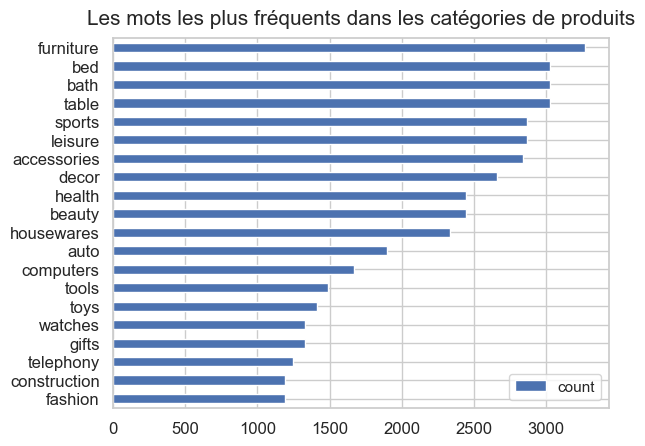

In [171]:
most_current_cat_words = df_count_words_cat_freq.nlargest(20, 'count')
ax = most_current_cat_words.plot.barh()

ax.set_yticklabels(most_current_cat_words['word'].tolist(), fontsize=12)
plt.gca().invert_yaxis()
plt.xticks(fontsize=12)
plt.title("Les mots les plus fréquents dans les catégories de produits", fontsize=15, pad=10)

plt.show()

#### Catégories -> simplification
Agglomérative clustering ou clustering hiérarchique (avec visualisation: dendrogramme)

In [172]:
df_product_cat_en[['product_category_name_english']].head()

product_category_name_english
0                     perfumery
1                           art
2                sports_leisure
3                          baby
4                    housewares

In [173]:
print(
    "Nombre de catégorie produit par défaut:",
    len(df_product_cat_en['product_category_name'].unique()), "\n"
)

Nombre de catégorie produit par défaut: 74 



In [174]:
words_cat_labels = df_product_cat_en['product_category_name_english'].apply(lambda x: x.replace("_", ", ")).unique()
print(words_cat_labels, "\n")

default_cat_labels = df_product_cat_en['product_category_name_english'].unique()
print(default_cat_labels)

['perfumery' 'art' 'sports, leisure' 'baby' 'housewares'
 'musical, instruments' 'cool, stuff' 'furniture, decor'
 'home, appliances' 'toys' 'bed, bath, table'
 'construction, tools, safety' 'computers, accessories' 'health, beauty'
 'luggage, accessories' 'garden, tools' 'office, furniture' 'auto'
 'electronics' 'fashion, shoes' 'telephony' 'stationery'
 'fashion, bags, accessories' 'computers' 'home, construction'
 'watches, gifts' 'construction, tools, construction' 'pet, shop'
 'small, appliances' 'agro, industry, and, commerce' 'unknown'
 'furniture, living, room' 'signaling, and, security' 'air, conditioning'
 'consoles, games' 'books, general, interest' 'costruction, tools, tools'
 'fashion, underwear, beach' 'fashion, male, clothing'
 'kitchen, dining, laundry, garden, furniture'
 'industry, commerce, and, business' 'fixed, telephony'
 'construction, tools, lights' 'books, technical' 'home, appliances, 2'
 'party, supplies' 'drinks' 'market, place' 'la, cuisine'
 'costruction, 

In [175]:
tfidf_cat = TfidfVectorizer()
csr_matrix_cat = tfidf_cat.fit_transform(words_cat_labels)
print("csr_matrix_cat size :", csr_matrix_cat.shape, "\n")
print(csr_matrix_cat.todense(), "\n")

words_cat = tfidf_cat.get_feature_names()
print(words_cat)

csr_matrix_cat size : (74, 113) 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.57861863 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 

['accessories', 'agro', 'air', 'and', 'appliances', 'art', 'arts', 'audio', 'auto', 'baby', 'bags', 'bath', 'beach', 'beauty', 'bed', 'bedroom', 'blu', 'books', 'business', 'cds', 'childrens', 'christmas', 'cine', 'clothes', 'clothing', 'coffee', 'comfort', 'commerce', 'computers', 'conditioning', 'confort', 'consoles', 'construction', 'cool', 'costruction', 'craftmanship', 'cuisine', 'decor', 'diapers', 'dining', 'drink', 'drinks', 'dvds', 'electronics', 'fashio', 'fashion', 'female', 'fixed', 'flowers', 'food', '

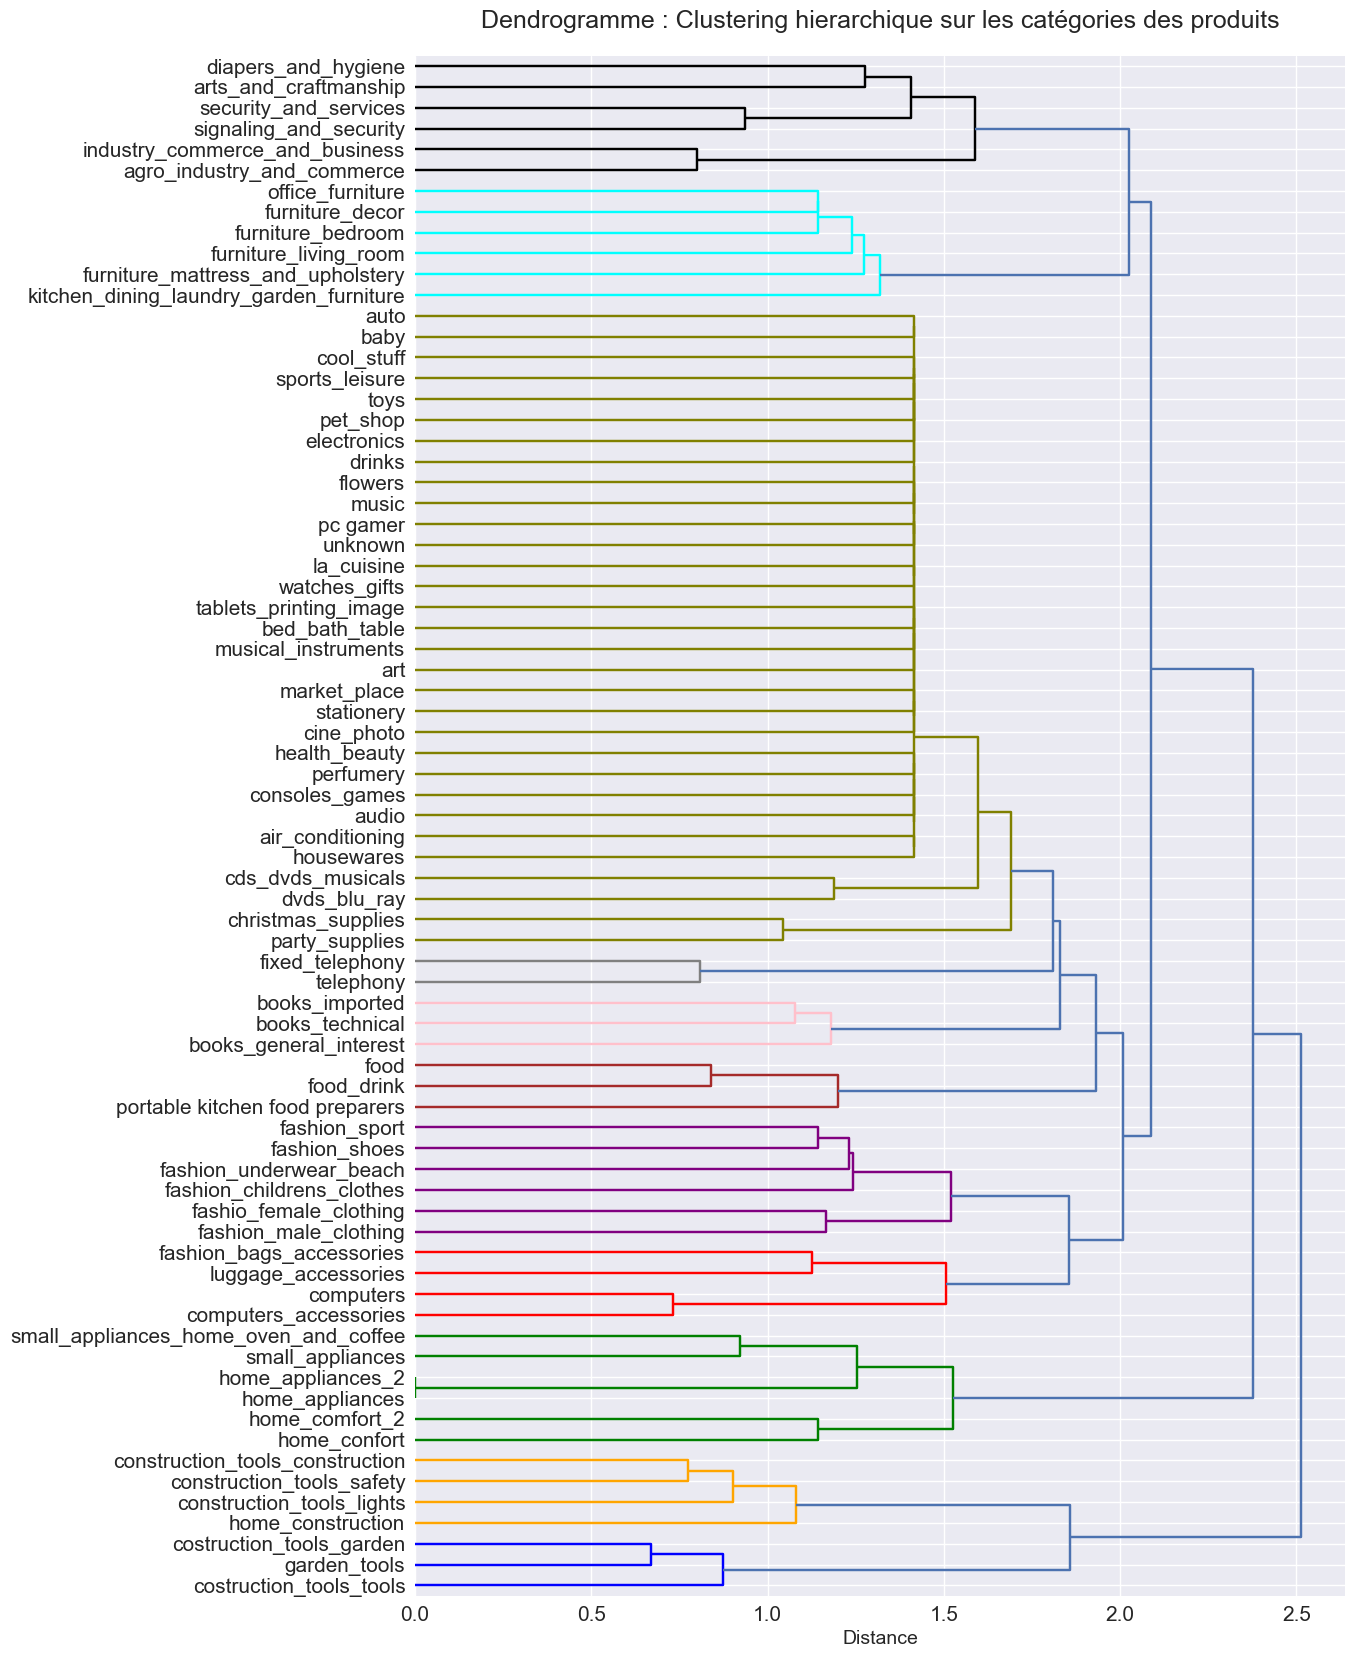

In [176]:
np.random.seed(42)
set_link_color_palette([
    'blue',
    'orange',
    'green',
    'red',
    'purple',
    'brown',
    'pink',
    'gray',
    'olive',
    'cyan',
    'black',
    'white'
])

link = linkage(
    csr_matrix_cat.todense(),
    method='ward',
    optimal_ordering=False
)

plt.figure(figsize=(12,20))
plt.style.use('seaborn')

den = dendrogram(
    link,
    labels=default_cat_labels,
    leaf_rotation=0,
    #leaf_font_size=10,
    orientation='right'
)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Distance", fontsize=14)
plt.title("Dendrogramme : Clustering hierarchique sur les catégories des produits", fontsize=18, pad=20)

plt.show()

In [177]:
print(den.keys())
# print(den['color_list'])

color_list_den = list(set(den['leaves_color_list']))
print("Couleurs utilisées dans le dendrogramme : ", color_list_den)

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])
Couleurs utilisées dans le dendrogramme :  ['pink', 'cyan', 'orange', 'gray', 'red', 'blue', 'green', 'olive', 'purple', 'brown', 'black']


In [178]:
# Inspection de la composition des valeurs du dendrogramme
# display(den)

In [179]:
print(len(den['ivl']))
print(len(den['leaves_color_list']))

74
74


In [180]:
# On récupère les labels qui ont été groupés par couleur à l'aide du dendrogramme
for color in color_list_den:
    cat_labels = [i for i, j in zip(den['ivl'], den['leaves_color_list']) if j == color]
    print(color)
    print(cat_labels, "\n")

pink
['books_general_interest', 'books_technical', 'books_imported'] 

cyan
['kitchen_dining_laundry_garden_furniture', 'furniture_mattress_and_upholstery', 'furniture_living_room', 'furniture_bedroom', 'furniture_decor', 'office_furniture'] 

orange
['home_construction', 'construction_tools_lights', 'construction_tools_safety', 'construction_tools_construction'] 

gray
['telephony', 'fixed_telephony'] 

red
['computers_accessories', 'computers', 'luggage_accessories', 'fashion_bags_accessories'] 

blue
['costruction_tools_tools', 'garden_tools', 'costruction_tools_garden'] 

green
['home_confort', 'home_comfort_2', 'home_appliances', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee'] 

olive
['party_supplies', 'christmas_supplies', 'dvds_blu_ray', 'cds_dvds_musicals', 'housewares', 'air_conditioning', 'audio', 'consoles_games', 'perfumery', 'health_beauty', 'cine_photo', 'stationery', 'market_place', 'art', 'musical_instruments', 'bed_bath_table', 'table

> Conclusion :<br />
Une alternative expérimentale visuelle au "words counting" pour distinguer des catégories de produits,<br />
ou à l'affectation 100% manuelle pour la simplification du nombre de catégories.<br />
Basé sur la répétabilité des mots (fréquence) et les mots en communs (similarité)<br />
J'ai employé cette méthode pour regarder ce que je pouvais obtenir bien qu'elle n'est pas pertinente :<br />
au sens où l'on a peu de mots par description de catégorie produit et peu de mots en commun en général entre catégories (1 ou 2)

#### Affectation à des catégories simplifiées à partir des résultats obtenus
On passe de 74 à 16 catégories (à modifier si la BDD du client s'élargie en type et en nombre de catégories par la suite)

In [181]:
print(len(dfs['products']['product_category_name'].unique()))
print(len(dfs['product_category']['product_category_name'].unique()))
print(
    list(
        set(dfs['products']['product_category_name'].unique()) - \
        set(dfs['product_category']['product_category_name'].unique())
    )
)

74
71
[nan, 'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer']


In [182]:
display(df_product_cat_en.info())
print(len(df_product_cat_en['product_category_name_english'].unique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32951 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32951 non-null  object 
dtypes: float64(7), object(3)
memory usage: 3.8+ MB


None

74


In [183]:
cat_books = ['books_general_interest', 'books_technical', 'books_imported']

cat_home_office_furniture = ['kitchen_dining_laundry_garden_furniture', 'furniture_mattress_and_upholstery',
                             'furniture_living_room', 'furniture_bedroom', 'furniture_decor', 'office_furniture'] + \
                            ['stationery']

cat_telephony = ['telephony', 'fixed_telephony']

cat_construction_tools = ['home_construction', 'construction_tools_lights',
                          'construction_tools_safety', 'construction_tools_construction'] + \
                         ['costruction_tools_tools', 'garden_tools', 'costruction_tools_garden']

cat_home_comfort_appliance = ['home_confort', 'home_comfort_2', 'home_appliances', 'home_appliances_2',
                              'small_appliances', 'small_appliances_home_oven_and_coffee'] + \
                             ['portable kitchen food preparers'] + \
                             ['la_cuisine', 'bed_bath_table', 'air_conditioning', 'housewares'] + \
                             ['pet_shop']

cat_food = ['food_drink', 'food'] + ['drinks']

cat_fashion_clothes_accessories = ['fashion_male_clothing', 'fashio_female_clothing', 'fashion_childrens_clothes',
                                   'fashion_underwear_beach', 'fashion_shoes', 'fashion_sport'] + \
                                  ['fashion_bags_accessories', 'luggage_accessories']

cat_health_beauty_hygiene = ['health_beauty', 'perfumery', 'diapers_and_hygiene']

cat_video_audio_instruments = ['dvds_blu_ray', 'cds_dvds_musicals', 'audio', 'music', 'musical_instruments', 'consoles_games']

cat_high_tech = ['pc gamer' 'electronics', 'tablets_printing_image', 'cine_photo', 'market_place'] + \
                ['computers', 'computers_accessories']

cat_unknown = ['unknown']

cat_gifts_art_decoration = ['watches_gifts', 'art', 'christmas_supplies', 'party_supplies', 'flowers',
                            'cool_stuff', 'arts_and_craftmanship']

cat_childhood = ['baby', 'toys']

cat_sports_leisure = ['sports_leisure']

cat_auto = ['auto']

cat_professional = ['agro_industry_and_commerce', 'industry_commerce_and_business', 'signaling_and_security',
                    'security_and_services'] 

In [184]:
# On affecte les valeurs à la manière d'un pandas get_dummies
# On réutilise df_product_cat_en (merge de dfs['product_category'] et de dfs['products'] avec la correction des catégories en anglais)
df_product_category = df_product_cat_en.copy()

df_product_category['cat_books'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_books), 'cat_books'] = 1

df_product_category['cat_home_office_furniture'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_home_office_furniture), 'cat_home_office_furniture'] = 1

df_product_category['cat_telephony'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_telephony), 'cat_telephony'] = 1

df_product_category['cat_construction_tools'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_construction_tools), 'cat_construction_tools'] = 1

df_product_category['cat_home_comfort_appliance'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_home_comfort_appliance), 'cat_home_comfort_appliance'] = 1

df_product_category['cat_food'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_food), 'cat_food'] = 1

df_product_category['cat_fashion_clothes_accessories'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_fashion_clothes_accessories), 'cat_fashion_clothes_accessories'] = 1

df_product_category['cat_health_beauty_hygiene'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_health_beauty_hygiene), 'cat_health_beauty_hygiene'] = 1

df_product_category['cat_video_audio_instruments'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_video_audio_instruments), 'cat_video_audio_instruments'] = 1

df_product_category['cat_high_tech'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_high_tech), 'cat_high_tech'] = 1

df_product_category['cat_unknown'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_unknown), 'cat_unknown'] = 1

df_product_category['cat_gifts_art_decoration'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_gifts_art_decoration), 'cat_gifts_art_decoration'] = 1

df_product_category['cat_childhood'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_childhood), 'cat_childhood'] = 1

df_product_category['cat_sports_leisure'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_sports_leisure), 'cat_sports_leisure'] = 1

df_product_category['cat_auto'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_auto), 'cat_auto'] = 1

df_product_category['cat_professional'] = 0
df_product_category.loc[df_product_category['product_category_name_english'].isin(
    cat_professional), 'cat_professional'] = 1

#### Fusion des DataFrames

##### Merge 01 : 
dfs['customers'] + dfs['orders']

In [185]:
# dfs['customers'] & dfs['orders'] -> même dimensions (rows) initialement
df_merge01 = dfs['customers'].merge(dfs['orders'], how='inner', on='customer_id')
print(df_merge01.info())
display(df_merge01.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_estimated_delivery_date  99441 non-null  datetime64[ns]
 11  order_delivery_

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_estimated_delivery_date  order_delivery_time  
0                    2017-06-05             8.812500  
1                    2018-02-06            16.661748  
2                    2018-06-13            26.077153  
3                    2018-04-10            14.998461  
4                    2018-08-15            11.461319

##### Merge 02 : 
Récapitulatif :
<ul>
    <li>dfs['customers']</li>
    <li>+ dfs['orders']</li>
    <li>+ dfs['order_reviews] préparé</li>
</ul>

In [186]:
# df_orders_order_reviews2 issus de la fusion : 
# dfs['customers'] & dfs['order_reviews'] avec corrections pour les scores/quotes multiples
print(df_orders_order_reviews2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   review_id                      99441 non-null  object 
 9   review_score                   99441 non-null  float64
 10  review_comment_title           11697 non-null  object 
 11  review_comment_message         41606 non-null  object 
 12  review_creation_date           99441 non-null 

In [187]:
df_merge02 = df_merge01.merge(
    df_orders_order_reviews2,
    on='customer_id',
    how='inner',
    suffixes=('_left', '_right')
)

In [188]:
df_merge02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          99441 non-null  object        
 1   customer_unique_id                   99441 non-null  object        
 2   customer_zip_code_prefix             99441 non-null  int64         
 3   customer_city                        99441 non-null  object        
 4   customer_state                       99441 non-null  object        
 5   order_id_left                        99441 non-null  object        
 6   order_status_left                    99441 non-null  object        
 7   order_purchase_timestamp_left        99441 non-null  datetime64[ns]
 8   order_approved_at_left               99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date_left    97658 non-null  datetime64[ns]
 10  order_esti

In [189]:
df_merge02.drop([
    'order_id_right',
    'order_status_right',
    'order_purchase_timestamp_right',
    'order_approved_at_right',
    'order_delivered_carrier_date_right',
    #'order_delivered_customer_date',
    'order_estimated_delivery_date_right'
], axis=1, inplace=True)

df_merge02.rename(columns={
    'order_id_left' : 'order_id',
    'order_status_left' : 'order_status',
    'order_purchase_timestamp_left' : 'order_purchase_timestamp',
    'order_approved_at_left' : 'order_approved_at',
    'order_delivered_carrier_date_left' : 'order_delivered_carrier_date',
    #'order_delivered_customer_date_left' : 'order_delivered_customer_date',
    'order_estimated_delivery_date_left' : 'order_estimated_delivery_date'
}, inplace=True)

print(df_merge02.info())
display(df_merge02.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_estimated_delivery_date  99441 non-null  datetime64[ns]
 11  order_delivery_

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_estimated_delivery_date  order_delivery_time  \
0                    2017-06-05             8.812500   
1                    2018-02-06            16.661748   
2                    2018-06-13            26.077153   
3                    2018-04-10            14.998461   
4                    2018-08-15            11.461319   

  order_delivered_customer_date                         review_id  \
0           2017-05-25 10:35:35  88b8b52d46df026a9d1ad2136a59b30b   
1           2018-01-29 12:41:19  02fc48a9efa3e3d0f1a8ea26507eeec3   
2           2018-06-14 17:58:51  5ad6695d76ee186dc473c42706984d87   
3           2018-03-28 16:04:25  059a801bb31f6aab2266e672cab87bc5   
4           2018-08-09 20:55:48  8490879d58d6c5d7773f2739a03f089a   

   review_score review_comment_title  \
0           4.0                  NaN   
1           5.0                  NaN   
2           5.0                  NaN   
3           5.0                  NaN   
4           5.0        a melhor nota   

                          review_comment_message review_creation_date  \
0                                            NaN  2017-05-26 00:00:00   
1                                            NaN  2018-01-30 00:00:00   
2                                            NaN  2018-06-15 00:00:00   
3                                            NaN  2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon  2018-08-10 00:00:00   

  review_answer_timestamp  
0     2017-05-30 22:34:40  
1     2018-02-10 22:43:29  
2     2018-06-15 12:10:59  
3     2018-04-02 18:36:47  
4     2018-08-17 01:59:52

##### Merge 03 : 
Récapitulatif :
<ul>
    <li>dfs['customers'] + dfs['orders']</li>
    <li>+ dfs['order_reviews] préparé</li>
    <li>+ dfs['order_payments'] préparé</li>
</ul>

In [190]:
# Modification de dfs['order_payments'] -> il manque une commande par rapport à dfs['orders']
df_cat_payment_type = pd.get_dummies(dfs['order_payments'][['payment_type']], drop_first=False)
df_cat_payment_type.drop('payment_type_not_defined', axis=1, inplace=True)
df_orders_payments = pd.concat([dfs['order_payments'], df_cat_payment_type], axis=1, ignore_index=False)
df_orders_payments.drop('payment_type', axis=1, inplace=True)

gb_orders_payments = df_orders_payments.groupby('order_id')[df_orders_payments.columns].agg({
    'payment_sequential' : 'max', # nombre max de méthode de paiement différentes utilisées
    'payment_installments' : 'max', # nombre max de paiement en plusieurs fois
    'payment_value' : 'sum',
    'payment_type_boleto' : 'sum',
    'payment_type_credit_card' : 'sum',
    'payment_type_debit_card' : 'sum',
    'payment_type_voucher' : 'sum'
})

# Conversion en dataframe pour ensuite pouvoir merger
df_orders_payments = pd.DataFrame(gb_orders_payments).reset_index()
print(df_orders_payments.info())
display(df_orders_payments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99440 non-null  object 
 1   payment_sequential        99440 non-null  int64  
 2   payment_installments      99440 non-null  int64  
 3   payment_value             99440 non-null  float64
 4   payment_type_boleto       99440 non-null  uint8  
 5   payment_type_credit_card  99440 non-null  uint8  
 6   payment_type_debit_card   99440 non-null  uint8  
 7   payment_type_voucher      99440 non-null  uint8  
dtypes: float64(1), int64(2), object(1), uint8(4)
memory usage: 3.4+ MB
None


order_id  payment_sequential  \
0      00010242fe8c5a6d1ba2dd792cb16214                   1   
1      00018f77f2f0320c557190d7a144bdd3                   1   
2      000229ec398224ef6ca0657da4fc703e                   1   
3      00024acbcdf0a6daa1e931b038114c75                   1   
4      00042b26cf59d7ce69dfabb4e55b4fd9                   1   
...                                 ...                 ...   
99435  fffc94f6ce00a00581880bf54a75a037                   1   
99436  fffcd46ef2263f404302a634eb57f7eb                   1   
99437  fffce4705a9662cd70adb13d4a31832d                   1   
99438  fffe18544ffabc95dfada21779c9644f                   1   
99439  fffe41c64501cc87c801fd61db3f6244                   1   

       payment_installments  payment_value  payment_type_boleto  \
0                         2          72.19                    0   
1                         3         259.83                    0   
2                         5         216.87                    0   
3                         2          25.78                    0   
4                         3         218.04                    0   
...                     ...            ...                  ...   
99435                     1         343.40                    1   
99436                     1         386.53                    1   
99437                     3         116.85                    0   
99438                     3          64.71                    0   
99439                     1          55.79                    0   

       payment_type_credit_card  payment_type_debit_card  payment_type_voucher  
0                             1                        0                     0  
1                             1                        0                     0  
2                             1                        0                     0  
3                             1                        0                     0  
4                             1                        0                     0  
...                         ...                      ...                   ...  
99435                         0                        0                     0  
99436                         0                        0                     0  
99437                         1                        0                     0  
99438                         1                        0                     0  
99439                         1                        0                     0  

[99440 rows x 8 columns]

In [191]:
# Merge du df_merge02 & df_orders_payments
df_merge03 = df_merge02.merge(df_orders_payments, on='order_id', how='left')
print(df_merge03.info())
display(df_merge03.head())

# On affiche les lignes avec Nan pour vérification
display(df_merge03[df_merge03.isna().any(axis=1)].head())
display(df_merge03[['order_id','order_status', 'payment_value']][df_merge03['payment_value'].isnull()])

# On recherche la valeur dans dfs['order_payments'] -> commande délivré sans paiement ! (espèces à la livraison ?)
display(dfs['order_payments'][dfs['order_payments']['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_estimated_delivery_date  99441 non-null  datetime64[ns]
 11  order_delivery_

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1 2018-01-12 20:58:32          2018-01-15 17:14:59  ...   
2 2018-05-20 16:19:10          2018-06-11 14:31:00  ...   
3 2018-03-13 17:29:19          2018-03-27 23:22:42  ...   
4 2018-07-29 10:10:09          2018-07-30 15:16:00  ...   

                          review_comment_message  review_creation_date  \
0                                            NaN   2017-05-26 00:00:00   
1                                            NaN   2018-01-30 00:00:00   
2                                            NaN   2018-06-15 00:00:00   
3                                            NaN   2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon   2018-08-10 00:00:00   

  review_answer_timestamp payment_sequential  payment_installments  \
0     2017-05-30 22:34:40                1.0                   2.0   
1     2018-02-10 22:43:29                1.0                   8.0   
2     2018-06-15 12:10:59                1.0                   7.0   
3     2018-04-02 18:36:47                1.0                   1.0   
4     2018-08-17 01:59:52                1.0                   8.0   

  payment_value payment_type_boleto payment_type_credit_card  \
0        146.87                 0.0                      1.0   
1        335.48                 0.0                      1.0   
2        157.73                 0.0                      1.0   
3        173.30                 0.0                      1.0   
4        252.25                 0.0                      1.0   

  payment_type_debit_card  payment_type_voucher  
0                     0.0                   0.0  
1                     0.0                   0.0  
2                     0.0                   0.0  
3                     0.0                   0.0  
4                     0.0                   0.0  

[5 rows x 26 columns]

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
5  879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
5                     89254         jaragua do sul             SC   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
5  5741ea1f91b5fbab2bd2dc653a5b5099    delivered      2017-09-14 18:14:31   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1 2018-01-12 20:58:32          2018-01-15 17:14:59  ...   
2 2018-05-20 16:19:10          2018-06-11 14:31:00  ...   
3 2018-03-13 17:29:19          2018-03-27 23:22:42  ...   
5 2017-09-14 18:25:11          2017-09-18 21:27:40  ...   

  review_comment_message  review_creation_date review_answer_timestamp  \
0                    NaN   2017-05-26 00:00:00     2017-05-30 22:34:40   
1                    NaN   2018-01-30 00:00:00     2018-02-10 22:43:29   
2                    NaN   2018-06-15 00:00:00     2018-06-15 12:10:59   
3                    NaN   2018-03-29 00:00:00     2018-04-02 18:36:47   
5       Loja responsável   2017-09-29 00:00:00     2017-10-01 21:52:53   

  payment_sequential  payment_installments payment_value payment_type_boleto  \
0                1.0                   2.0        146.87                 0.0   
1                1.0                   8.0        335.48                 0.0   
2                1.0                   7.0        157.73                 0.0   
3                1.0                   1.0        173.30                 0.0   
5                1.0                   1.0        282.21                 0.0   

  payment_type_credit_card payment_type_debit_card  payment_type_voucher  
0                      1.0                     0.0                   0.0  
1                      1.0                     0.0                   0.0  
2                      1.0                     0.0                   0.0  
3                      1.0                     0.0                   0.0  
5                      0.0                     1.0                   0.0  

[5 rows x 26 columns]

order_id order_status  payment_value
21125  bfbd0f9bdef84302105ad712db648a6c    delivered            NaN

Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []

###### Merge de  :  dfs['products'] avec catégories eng + dfs['order_items'] + dfs['sellers']
But : compresser l'ensemble avec des uniques 'order_id'

In [192]:
print(df_product_category.info())
display(df_product_category.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_id                       32951 non-null  object 
 1   product_category_name            32951 non-null  object 
 2   product_name_lenght              32341 non-null  float64
 3   product_description_lenght       32341 non-null  float64
 4   product_photos_qty               32341 non-null  float64
 5   product_weight_g                 32949 non-null  float64
 6   product_length_cm                32949 non-null  float64
 7   product_height_cm                32949 non-null  float64
 8   product_width_cm                 32949 non-null  float64
 9   product_category_name_english    32951 non-null  object 
 10  cat_books                        32951 non-null  int64  
 11  cat_home_office_furniture        32951 non-null  int64  
 12  cat_telephony     

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

  product_category_name_english  ...  cat_fashion_clothes_accessories  \
0                     perfumery  ...                                0   
1                           art  ...                                0   
2                sports_leisure  ...                                0   
3                          baby  ...                                0   
4                    housewares  ...                                0   

   cat_health_beauty_hygiene  cat_video_audio_instruments  cat_high_tech  \
0                          1                            0              0   
1                          0                            0              0   
2                          0                            0              0   
3                          0                            0              0   
4                          0                            0              0   

   cat_unknown  cat_gifts_art_decoration  cat_childhood  cat_sports_leisure  \
0            0                         0              0                   0   
1            0                         1              0                   0   
2            0                         0              0                   1   
3            0                         0              1                   0   
4            0                         0              0                   0   

   cat_auto  cat_professional  
0         0                 0  
1         0                 0  
2         0                 0  
3         0                 0  
4         0                 0  

[5 rows x 26 columns]

In [193]:
# On retravaille le merge de dfs['products'] avec dfs['product_category']
df_product_category.drop([
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_category_name_english'
], axis=1, inplace=True)

##### Inspection des valeurs infinies

In [194]:
# Selection de valeurs proches pour imputation
display(dfs['products'][
    (dfs['products']['product_length_cm'] == 30) & 
    (dfs['products']['product_height_cm'] == 25) &  
    (dfs['products']['product_width_cm'] == 30) & 
    (dfs['products']['product_weight_g'] != 0)
].head())

mean_value_retrieved = dfs['products'][['product_weight_g']][
    (dfs['products']['product_length_cm'] == 30) & 
    (dfs['products']['product_height_cm'] == 25) &  
    (dfs['products']['product_width_cm'] == 30) & 
    (dfs['products']['product_weight_g'] != 0)
].mean()

print(mean_value_retrieved)

product_id  product_category_name  \
1339  72a2153c4d20cfbcdb7f75d9c39f5814  utilidades_domesticas   
1731  500909059ad72b36b2554150cc327edb        cama_mesa_banho   
5291  a779a9eec979527333131437db0882b1             automotivo   
5883  42b5c89883ffcf6b4d081833fcda6286  utilidades_domesticas   
6151  84aa780b4f8692cf7a28b30cd0ff671d             automotivo   

      product_name_lenght  product_description_lenght  product_photos_qty  \
1339                 36.0                       565.0                 3.0   
1731                 39.0                      1140.0                 1.0   
5291                 56.0                       855.0                 5.0   
5883                 45.0                       694.0                 2.0   
6151                 58.0                       855.0                 6.0   

      product_weight_g  product_length_cm  product_height_cm  product_width_cm  
1339            1100.0               30.0               25.0              30.0  
1731            3100.0               30.0               25.0              30.0  
5291            1950.0               30.0               25.0              30.0  
5883             950.0               30.0               25.0              30.0  
6151            2050.0               30.0               25.0              30.0

product_weight_g    1865.789474
dtype: float64


In [195]:
# On impute par la moyenne pour correction
df_product_category.loc[df_product_category['product_weight_g'] == 0, 'product_weight_g'] = mean_value_retrieved

In [196]:
# On vérifie
inspect_inf_values = df_product_category.isin([np.inf, -np.inf])
print(df_product_category[inspect_inf_values].sum())

product_id                           0
product_photos_qty                 0.0
product_weight_g                   0.0
product_length_cm                  0.0
product_height_cm                  0.0
product_width_cm                   0.0
cat_books                          0.0
cat_home_office_furniture          0.0
cat_telephony                      0.0
cat_construction_tools             0.0
cat_home_comfort_appliance         0.0
cat_food                           0.0
cat_fashion_clothes_accessories    0.0
cat_health_beauty_hygiene          0.0
cat_video_audio_instruments        0.0
cat_high_tech                      0.0
cat_unknown                        0.0
cat_gifts_art_decoration           0.0
cat_childhood                      0.0
cat_sports_leisure                 0.0
cat_auto                           0.0
cat_professional                   0.0
dtype: object


In [197]:
# Feature transformation : Calcule de la masse volumétrique cm**3/g
df_product_category['product_density'] = \
df_product_category['product_length_cm']\
.multiply(df_product_category['product_height_cm'])\
.multiply(df_product_category['product_width_cm'])\
.divide(df_product_category['product_weight_g'])

In [198]:
df_product_category.drop([
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
], axis=1, inplace=True)

In [199]:
df_product_category.head()

product_id  product_photos_qty  cat_books  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 1.0          0   
1  3aa071139cb16b67ca9e5dea641aaa2f                 1.0          0   
2  96bd76ec8810374ed1b65e291975717f                 1.0          0   
3  cef67bcfe19066a932b7673e239eb23d                 1.0          0   
4  9dc1a7de274444849c219cff195d0b71                 4.0          0   

   cat_home_office_furniture  cat_telephony  cat_construction_tools  \
0                          0              0                       0   
1                          0              0                       0   
2                          0              0                       0   
3                          0              0                       0   
4                          0              0                       0   

   cat_home_comfort_appliance  cat_food  cat_fashion_clothes_accessories  \
0                           0         0                                0   
1                           0         0                                0   
2                           0         0                                0   
3                           0         0                                0   
4                           1         0                                0   

   cat_health_beauty_hygiene  cat_video_audio_instruments  cat_high_tech  \
0                          1                            0              0   
1                          0                            0              0   
2                          0                            0              0   
3                          0                            0              0   
4                          0                            0              0   

   cat_unknown  cat_gifts_art_decoration  cat_childhood  cat_sports_leisure  \
0            0                         0              0                   0   
1            0                         1              0                   0   
2            0                         0              0                   1   
3            0                         0              1                   0   
4            0                         0              0                   0   

   cat_auto  cat_professional  product_density  
0         0                 0         9.955556  
1         0                 0        10.800000  
2         0                 0        15.779221  
3         0                 0         7.288410  
4         0                 0         7.072000

In [200]:
df_order_items_products = dfs['order_items'].merge(df_product_category, how='left', on='product_id')
print(df_order_items_products.info())
display(df_order_items_products.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   order_id                         112650 non-null  object 
 1   order_item_id                    112650 non-null  int64  
 2   product_id                       112650 non-null  object 
 3   seller_id                        112650 non-null  object 
 4   shipping_limit_date              112650 non-null  object 
 5   price                            112650 non-null  float64
 6   freight_value                    112650 non-null  float64
 7   product_photos_qty               111047 non-null  float64
 8   cat_books                        112650 non-null  int64  
 9   cat_home_office_furniture        112650 non-null  int64  
 10  cat_telephony                    112650 non-null  int64  
 11  cat_construction_tools           112650 non-null  int64  
 12  ca

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  product_photos_qty  cat_books  \
0  2017-09-19 09:45:35   58.90          13.29                 4.0          0   
1  2017-05-03 11:05:13  239.90          19.93                 2.0          0   
2  2018-01-18 14:48:30  199.00          17.87                 2.0          0   
3  2018-08-15 10:10:18   12.99          12.79                 1.0          0   
4  2017-02-13 13:57:51  199.90          18.14                 1.0          0   

   cat_home_office_furniture  ...  cat_health_beauty_hygiene  \
0                          0  ...                          0   
1                          0  ...                          0   
2                          1  ...                          0   
3                          0  ...                          1   
4                          0  ...                          0   

   cat_video_audio_instruments  cat_high_tech  cat_unknown  \
0                            0              0            0   
1                            0              0            0   
2                            0              0            0   
3                            0              0            0   
4                            0              0            0   

   cat_gifts_art_decoration  cat_childhood  cat_sports_leisure  cat_auto  \
0                         1              0                   0         0   
1                         0              0                   0         0   
2                         0              0                   0         0   
3                         0              0                   0         0   
4                         0              0                   0         0   

   cat_professional  product_density  
0                 0         5.427692  
1                 0         2.000000  
2                 0         4.641639  
3                 0        12.000000  
4                 0        11.200000  

[5 rows x 25 columns]

In [201]:
# Y a t-il autant de vendeurs dans le DataFrame que de vendeurs différents ? (=pas de doublon)
print(len(dfs['sellers']['seller_id'].unique()))
print(dfs['sellers'].shape[0])

3095
3095


In [202]:
# Autant de vendeurs que de zip_code ?
# Il faut utiliser les seller_id en feature
print(len(dfs['sellers']['seller_id'].unique()))
print(len(dfs['sellers']['seller_zip_code_prefix'].unique()))

3095
2246


In [203]:
df_order_items_products_sellers = df_order_items_products.merge(dfs['sellers'], how='left', on='seller_id')
# le code postal suffit pas besoin de la ville et du state_code
df_order_items_products_sellers.drop(['seller_zip_code_prefix', 'seller_state'], axis=1, inplace=True)
print(df_order_items_products_sellers.info())
display(df_order_items_products_sellers.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   order_id                         112650 non-null  object 
 1   order_item_id                    112650 non-null  int64  
 2   product_id                       112650 non-null  object 
 3   seller_id                        112650 non-null  object 
 4   shipping_limit_date              112650 non-null  object 
 5   price                            112650 non-null  float64
 6   freight_value                    112650 non-null  float64
 7   product_photos_qty               111047 non-null  float64
 8   cat_books                        112650 non-null  int64  
 9   cat_home_office_furniture        112650 non-null  int64  
 10  cat_telephony                    112650 non-null  int64  
 11  cat_construction_tools           112650 non-null  int64  
 12  ca

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  product_photos_qty  cat_books  \
0  2017-09-19 09:45:35   58.90          13.29                 4.0          0   
1  2017-05-03 11:05:13  239.90          19.93                 2.0          0   
2  2018-01-18 14:48:30  199.00          17.87                 2.0          0   
3  2018-08-15 10:10:18   12.99          12.79                 1.0          0   
4  2017-02-13 13:57:51  199.90          18.14                 1.0          0   

   cat_home_office_furniture  ...  cat_video_audio_instruments  cat_high_tech  \
0                          0  ...                            0              0   
1                          0  ...                            0              0   
2                          1  ...                            0              0   
3                          0  ...                            0              0   
4                          0  ...                            0              0   

   cat_unknown  cat_gifts_art_decoration  cat_childhood  cat_sports_leisure  \
0            0                         1              0                   0   
1            0                         0              0                   0   
2            0                         0              0                   0   
3            0                         0              0                   0   
4            0                         0              0                   0   

   cat_auto  cat_professional  product_density    seller_city  
0         0                 0         5.427692  volta redonda  
1         0                 0         2.000000      sao paulo  
2         0                 0         4.641639  borda da mata  
3         0                 0        12.000000         franca  
4         0                 0        11.200000         loanda  

[5 rows x 26 columns]

In [204]:
# Exemple type pour vérification et inspection 
# (n'est pas représentatif de l'ensemble des particularités observées sur les cas particuliers, ici un unique vendeur)
df_order_items_products_sellers[df_order_items_products_sellers['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

order_id  order_item_id  \
57297  8272b63d03f5f79c56e9e4120aec44ef              1   
57298  8272b63d03f5f79c56e9e4120aec44ef              2   
57299  8272b63d03f5f79c56e9e4120aec44ef              3   
57300  8272b63d03f5f79c56e9e4120aec44ef              4   
57301  8272b63d03f5f79c56e9e4120aec44ef              5   
57302  8272b63d03f5f79c56e9e4120aec44ef              6   
57303  8272b63d03f5f79c56e9e4120aec44ef              7   
57304  8272b63d03f5f79c56e9e4120aec44ef              8   
57305  8272b63d03f5f79c56e9e4120aec44ef              9   
57306  8272b63d03f5f79c56e9e4120aec44ef             10   
57307  8272b63d03f5f79c56e9e4120aec44ef             11   
57308  8272b63d03f5f79c56e9e4120aec44ef             12   
57309  8272b63d03f5f79c56e9e4120aec44ef             13   
57310  8272b63d03f5f79c56e9e4120aec44ef             14   
57311  8272b63d03f5f79c56e9e4120aec44ef             15   
57312  8272b63d03f5f79c56e9e4120aec44ef             16   
57313  8272b63d03f5f79c56e9e4120aec44ef             17   
57314  8272b63d03f5f79c56e9e4120aec44ef             18   
57315  8272b63d03f5f79c56e9e4120aec44ef             19   
57316  8272b63d03f5f79c56e9e4120aec44ef             20   
57317  8272b63d03f5f79c56e9e4120aec44ef             21   

                             product_id                         seller_id  \
57297  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57298  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57299  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57300  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57301  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57302  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57303  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57304  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57305  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57306  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57307  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57308  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57309  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57310  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57311  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57312  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57313  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57314  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57315  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57316  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   

       shipping_limit_date  price  freight_value  product_photos_qty  \
57297  2017-07-21 18:25:23    1.2           7.89                 3.0   
57298  2017-07-21 18:25:23    1.2           7.89                 3.0   
57299  2017-07-21 18:25:23    1.2           7.89                 3.0   
57300  2017-07-21 18:25:23    1.2           7.89                 3.0   
57301  2017-07-21 18:25:23    1.2           7.89                 3.0   
57302  2017-07-21 18:25:23    1.2           7.89                 3.0   
57303  2017-07-21 18:25:23    1.2           7.89                 3.0   
57304  2017-07-21 18:25:23    1.2           7.89                 3.0   
57305  2017-07-21 18:25:23    1.2           7.89                 3.0   
57306  2017-07-21 18:25:23    1.2           7.89                 3.0   
57307  2017-07-21 18:25:23    1.2           7.89                 3.0   
57308  2017-07-21 18:25:23    1.2           7.89                 3.0   
57309  2017-07-21 18:25:23    1.2           7.89                 3.0   
57310  2017-07-21 18:25:23    1.2           7.89   

In [205]:
gb_cat_feat_unique_order_id = df_order_items_products_sellers[df_order_items_products_sellers.columns.difference([
    'order_item_id',
    'product_id',
    'seller_id',
    'shipping_limit_date',
    'price',
    'freight_value',
    'product_photos_qty',
    'product_density',
    'seller_id'
])].groupby('order_id').sum()
display(gb_cat_feat_unique_order_id.head())

cat_auto  cat_books  cat_childhood  \
order_id                                                               
00010242fe8c5a6d1ba2dd792cb16214         0          0              0   
00018f77f2f0320c557190d7a144bdd3         0          0              0   
000229ec398224ef6ca0657da4fc703e         0          0              0   
00024acbcdf0a6daa1e931b038114c75         0          0              0   
00042b26cf59d7ce69dfabb4e55b4fd9         0          0              0   

                                  cat_construction_tools  \
order_id                                                   
00010242fe8c5a6d1ba2dd792cb16214                       0   
00018f77f2f0320c557190d7a144bdd3                       0   
000229ec398224ef6ca0657da4fc703e                       0   
00024acbcdf0a6daa1e931b038114c75                       0   
00042b26cf59d7ce69dfabb4e55b4fd9                       1   

                                  cat_fashion_clothes_accessories  cat_food  \
order_id                                                                      
00010242fe8c5a6d1ba2dd792cb16214                                0         0   
00018f77f2f0320c557190d7a144bdd3                                0         0   
000229ec398224ef6ca0657da4fc703e                                0         0   
00024acbcdf0a6daa1e931b038114c75                                0         0   
00042b26cf59d7ce69dfabb4e55b4fd9                                0         0   

                                  cat_gifts_art_decoration  \
order_id                                                     
00010242fe8c5a6d1ba2dd792cb16214                         1   
00018f77f2f0320c557190d7a144bdd3                         0   
000229ec398224ef6ca0657da4fc703e                         0   
00024acbcdf0a6daa1e931b038114c75                         0   
00042b26cf59d7ce69dfabb4e55b4fd9                         0   

                                  cat_health_beauty_hygiene  cat_high_tech  \
order_id                                                                     
00010242fe8c5a6d1ba2dd792cb16214                          0              0   
00018f77f2f0320c557190d7a144bdd3                          0              0   
000229ec398224ef6ca0657da4fc703e                          0              0   
00024acbcdf0a6daa1e931b038114c75                          1              0   
00042b26cf59d7ce69dfabb4e55b4fd9                          0              0   

                                  cat_home_comfort_appliance  \
order_id                                                       
00010242fe8c5a6d1ba2dd792cb16214                           0   
00018f77f2f0320c557190d7a144bdd3                           1   
000229ec398224ef6ca0657da4fc703e                           0   
00024acbcdf0a6daa1e931b038114c75                           0   
00042b26cf59d7ce69dfabb4e55b4fd9                           0   

                                  cat_home_office_furniture  cat_professional  \
order_id                                                                        
00010242fe8c5a6d1ba2dd792cb16214                          0                 0   
00018f77f2f0320c557190d7a144bdd3                          0                 0   
000229ec398224ef6ca0657da4fc703e                          1                 0   
00024acbcdf0a6daa1e931b038114c75                          0                 0   
00042b26cf59d7ce69dfabb4e55b4fd9                          0                 0   

                                  cat_sports_leisure  cat_telephony  \
order_id                                                              
00010242fe8c5a6d1ba2dd792cb16214                   0              0   
00018f77f2f0320c557190d7a144bdd3                   0              0   
000229ec398224ef6ca0657da4fc703e                   0              0   
00024acbcdf0a6daa1e931b038114c75                   0              0   
00042b26cf59d7ce69dfabb4e55b4fd9                   0              0   

                                  cat_unknown  cat_video_

In [206]:
# Par défaut le groupby calcule la somme donc pas besoin d'indiquer les variables booléennes
gb_agg_col_unique_order_id = df_order_items_products_sellers.groupby('order_id').agg({
    'order_item_id' : 'max', # retourne le nombre d'objets commandés
    'product_id' : lambda x: len(x.unique()), # On connait pas la dénomination des articles donc on prendra seulement le nombre différents d'articles commandés
    #'seller_id' : lambda x: len(x.unique()), # On prend le premier (pas de changement)
    'shipping_limit_date' : 'last', # On prend la dernière date de shipping de la commande
    'price' : 'sum', # On additionne le prix des articles
    'freight_value' : 'sum', # On additionne le prix des frais de port
    'product_photos_qty' : 'sum',
    'product_density' : 'sum', # On additionne également
    'seller_id' : lambda x: len(x.unique()) # Permet de savoir si les vendeurs de la commande sont dans des villes différentes ou non / seller_id
})
display(gb_agg_col_unique_order_id.head())

order_item_id  product_id  \
order_id                                                      
00010242fe8c5a6d1ba2dd792cb16214              1           1   
00018f77f2f0320c557190d7a144bdd3              1           1   
000229ec398224ef6ca0657da4fc703e              1           1   
00024acbcdf0a6daa1e931b038114c75              1           1   
00042b26cf59d7ce69dfabb4e55b4fd9              1           1   

                                  shipping_limit_date   price  freight_value  \
order_id                                                                       
00010242fe8c5a6d1ba2dd792cb16214  2017-09-19 09:45:35   58.90          13.29   
00018f77f2f0320c557190d7a144bdd3  2017-05-03 11:05:13  239.90          19.93   
000229ec398224ef6ca0657da4fc703e  2018-01-18 14:48:30  199.00          17.87   
00024acbcdf0a6daa1e931b038114c75  2018-08-15 10:10:18   12.99          12.79   
00042b26cf59d7ce69dfabb4e55b4fd9  2017-02-13 13:57:51  199.90          18.14   

                                  product_photos_qty  product_density  \
order_id                                                                
00010242fe8c5a6d1ba2dd792cb16214                 4.0         5.427692   
00018f77f2f0320c557190d7a144bdd3                 2.0         2.000000   
000229ec398224ef6ca0657da4fc703e                 2.0         4.641639   
00024acbcdf0a6daa1e931b038114c75                 1.0        12.000000   
00042b26cf59d7ce69dfabb4e55b4fd9                 1.0        11.200000   

                                  seller_id  
order_id                                     
00010242fe8c5a6d1ba2dd792cb16214          1  
00018f77f2f0320c557190d7a144bdd3          1  
000229ec398224ef6ca0657da4fc703e          1  
00024acbcdf0a6daa1e931b038114c75          1  
00042b26cf59d7ce69dfabb4e55b4fd9          1

In [207]:
# Merging des deux sous ensembles sur l'index
df_cat_feat_unique_order_id = pd.DataFrame(gb_cat_feat_unique_order_id)
df_agg_col_unique_order_id = pd.DataFrame(gb_agg_col_unique_order_id)

In [208]:
df_unique_order_id = pd.merge(df_agg_col_unique_order_id, df_cat_feat_unique_order_id, on='order_id').reset_index()
print(df_unique_order_id.info())
display(df_unique_order_id.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   order_id                         98666 non-null  object 
 1   order_item_id                    98666 non-null  int64  
 2   product_id                       98666 non-null  int64  
 3   shipping_limit_date              98666 non-null  object 
 4   price                            98666 non-null  float64
 5   freight_value                    98666 non-null  float64
 6   product_photos_qty               98666 non-null  float64
 7   product_density                  98666 non-null  float64
 8   seller_id                        98666 non-null  int64  
 9   cat_auto                         98666 non-null  int64  
 10  cat_books                        98666 non-null  int64  
 11  cat_childhood                    98666 non-null  int64  
 12  cat_construction_t

order_id  order_item_id  product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1           1   
1  00018f77f2f0320c557190d7a144bdd3              1           1   
2  000229ec398224ef6ca0657da4fc703e              1           1   
3  00024acbcdf0a6daa1e931b038114c75              1           1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1           1   

   shipping_limit_date   price  freight_value  product_photos_qty  \
0  2017-09-19 09:45:35   58.90          13.29                 4.0   
1  2017-05-03 11:05:13  239.90          19.93                 2.0   
2  2018-01-18 14:48:30  199.00          17.87                 2.0   
3  2018-08-15 10:10:18   12.99          12.79                 1.0   
4  2017-02-13 13:57:51  199.90          18.14                 1.0   

   product_density  seller_id  cat_auto  ...  cat_gifts_art_decoration  \
0         5.427692          1         0  ...                         1   
1         2.000000          1         0  ...                         0   
2         4.641639          1         0  ...                         0   
3        12.000000          1         0  ...                         0   
4        11.200000          1         0  ...                         0   

   cat_health_beauty_hygiene  cat_high_tech  cat_home_comfort_appliance  \
0                          0              0                           0   
1                          0              0                           1   
2                          0              0                           0   
3                          1              0                           0   
4                          0              0                           0   

   cat_home_office_furniture  cat_professional  cat_sports_leisure  \
0                          0                 0                   0   
1                          0                 0                   0   
2                          1                 0                   0   
3                          0                 0                   0   
4                          0                 0                   0   

   cat_telephony  cat_unknown  cat_video_audio_instruments  
0              0            0                            0  
1              0            0                            0  
2              0            0                            0  
3              0            0                            0  
4              0            0                            0  

[5 rows x 25 columns]

###### Vérification par comparaison avec une valeur typique

In [209]:
# Entrée
df_order_items_products_sellers[df_order_items_products_sellers['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

order_id  order_item_id  \
57297  8272b63d03f5f79c56e9e4120aec44ef              1   
57298  8272b63d03f5f79c56e9e4120aec44ef              2   
57299  8272b63d03f5f79c56e9e4120aec44ef              3   
57300  8272b63d03f5f79c56e9e4120aec44ef              4   
57301  8272b63d03f5f79c56e9e4120aec44ef              5   
57302  8272b63d03f5f79c56e9e4120aec44ef              6   
57303  8272b63d03f5f79c56e9e4120aec44ef              7   
57304  8272b63d03f5f79c56e9e4120aec44ef              8   
57305  8272b63d03f5f79c56e9e4120aec44ef              9   
57306  8272b63d03f5f79c56e9e4120aec44ef             10   
57307  8272b63d03f5f79c56e9e4120aec44ef             11   
57308  8272b63d03f5f79c56e9e4120aec44ef             12   
57309  8272b63d03f5f79c56e9e4120aec44ef             13   
57310  8272b63d03f5f79c56e9e4120aec44ef             14   
57311  8272b63d03f5f79c56e9e4120aec44ef             15   
57312  8272b63d03f5f79c56e9e4120aec44ef             16   
57313  8272b63d03f5f79c56e9e4120aec44ef             17   
57314  8272b63d03f5f79c56e9e4120aec44ef             18   
57315  8272b63d03f5f79c56e9e4120aec44ef             19   
57316  8272b63d03f5f79c56e9e4120aec44ef             20   
57317  8272b63d03f5f79c56e9e4120aec44ef             21   

                             product_id                         seller_id  \
57297  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57298  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57299  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57300  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57301  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57302  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57303  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57304  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57305  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57306  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57307  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57308  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57309  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57310  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57311  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57312  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57313  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57314  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57315  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57316  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   

       shipping_limit_date  price  freight_value  product_photos_qty  \
57297  2017-07-21 18:25:23    1.2           7.89                 3.0   
57298  2017-07-21 18:25:23    1.2           7.89                 3.0   
57299  2017-07-21 18:25:23    1.2           7.89                 3.0   
57300  2017-07-21 18:25:23    1.2           7.89                 3.0   
57301  2017-07-21 18:25:23    1.2           7.89                 3.0   
57302  2017-07-21 18:25:23    1.2           7.89                 3.0   
57303  2017-07-21 18:25:23    1.2           7.89                 3.0   
57304  2017-07-21 18:25:23    1.2           7.89                 3.0   
57305  2017-07-21 18:25:23    1.2           7.89                 3.0   
57306  2017-07-21 18:25:23    1.2           7.89                 3.0   
57307  2017-07-21 18:25:23    1.2           7.89                 3.0   
57308  2017-07-21 18:25:23    1.2           7.89                 3.0   
57309  2017-07-21 18:25:23    1.2           7.89                 3.0   
57310  2017-07-21 18:25:23    1.2           7.89   

In [210]:
# Sortie
df_unique_order_id[df_unique_order_id['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

order_id  order_item_id  product_id  \
50137  8272b63d03f5f79c56e9e4120aec44ef             21           3   

       shipping_limit_date  price  freight_value  product_photos_qty  \
50137  2017-07-21 18:25:23   31.8         164.37                62.0   

       product_density  seller_id  cat_auto  ...  cat_gifts_art_decoration  \
50137             33.3          1         0  ...                         0   

       cat_health_beauty_hygiene  cat_high_tech  cat_home_comfort_appliance  \
50137                         21              0                           0   

       cat_home_office_furniture  cat_professional  cat_sports_leisure  \
50137                          0                 0                   0   

       cat_telephony  cat_unknown  cat_video_audio_instruments  
50137              0            0                            0  

[1 rows x 25 columns]

In [211]:
# Comparaison d'order_id : dfs['order_items'] et dfs['orders']
# A vérifier les commandes approuved et non validées (la différence doit s'expliquer)
print(len(dfs['order_items']['order_id'].unique()))
print(len(dfs['orders']['order_id'].unique()))
display(df_merge03.head())
display(df_unique_order_id.head())

98666
99441


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1 2018-01-12 20:58:32          2018-01-15 17:14:59  ...   
2 2018-05-20 16:19:10          2018-06-11 14:31:00  ...   
3 2018-03-13 17:29:19          2018-03-27 23:22:42  ...   
4 2018-07-29 10:10:09          2018-07-30 15:16:00  ...   

                          review_comment_message  review_creation_date  \
0                                            NaN   2017-05-26 00:00:00   
1                                            NaN   2018-01-30 00:00:00   
2                                            NaN   2018-06-15 00:00:00   
3                                            NaN   2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon   2018-08-10 00:00:00   

  review_answer_timestamp payment_sequential  payment_installments  \
0     2017-05-30 22:34:40                1.0                   2.0   
1     2018-02-10 22:43:29                1.0                   8.0   
2     2018-06-15 12:10:59                1.0                   7.0   
3     2018-04-02 18:36:47                1.0                   1.0   
4     2018-08-17 01:59:52                1.0                   8.0   

  payment_value payment_type_boleto payment_type_credit_card  \
0        146.87                 0.0                      1.0   
1        335.48                 0.0                      1.0   
2        157.73                 0.0                      1.0   
3        173.30                 0.0                      1.0   
4        252.25                 0.0                      1.0   

  payment_type_debit_card  payment_type_voucher  
0                     0.0                   0.0  
1                     0.0                   0.0  
2                     0.0                   0.0  
3                     0.0                   0.0  
4                     0.0                   0.0  

[5 rows x 26 columns]

order_id  order_item_id  product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1           1   
1  00018f77f2f0320c557190d7a144bdd3              1           1   
2  000229ec398224ef6ca0657da4fc703e              1           1   
3  00024acbcdf0a6daa1e931b038114c75              1           1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1           1   

   shipping_limit_date   price  freight_value  product_photos_qty  \
0  2017-09-19 09:45:35   58.90          13.29                 4.0   
1  2017-05-03 11:05:13  239.90          19.93                 2.0   
2  2018-01-18 14:48:30  199.00          17.87                 2.0   
3  2018-08-15 10:10:18   12.99          12.79                 1.0   
4  2017-02-13 13:57:51  199.90          18.14                 1.0   

   product_density  seller_id  cat_auto  ...  cat_gifts_art_decoration  \
0         5.427692          1         0  ...                         1   
1         2.000000          1         0  ...                         0   
2         4.641639          1         0  ...                         0   
3        12.000000          1         0  ...                         0   
4        11.200000          1         0  ...                         0   

   cat_health_beauty_hygiene  cat_high_tech  cat_home_comfort_appliance  \
0                          0              0                           0   
1                          0              0                           1   
2                          0              0                           0   
3                          1              0                           0   
4                          0              0                           0   

   cat_home_office_furniture  cat_professional  cat_sports_leisure  \
0                          0                 0                   0   
1                          0                 0                   0   
2                          1                 0                   0   
3                          0                 0                   0   
4                          0                 0                   0   

   cat_telephony  cat_unknown  cat_video_audio_instruments  
0              0            0                            0  
1              0            0                            0  
2              0            0                            0  
3              0            0                            0  
4              0            0                            0  

[5 rows x 25 columns]

#####  Les catégories dont les produits sont les plus vendus ?

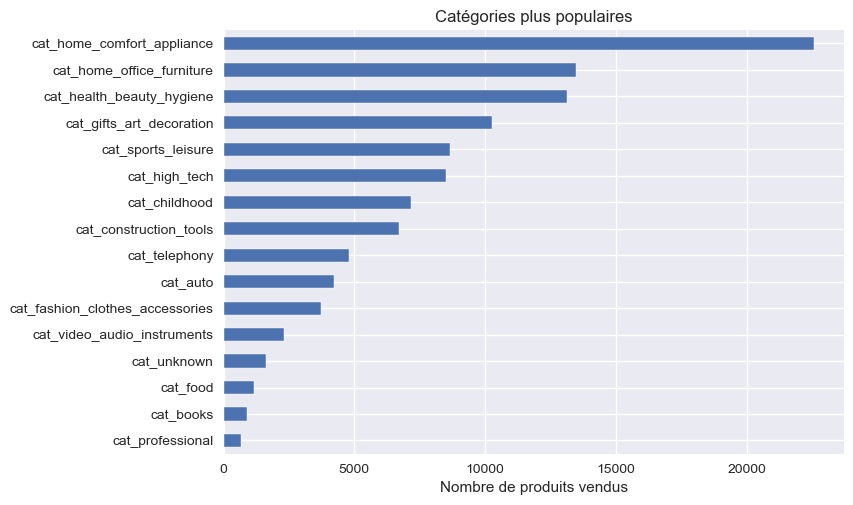

In [212]:
cat_cols = [col for col in df_unique_order_id.columns if col.startswith('cat_')]
#print(cat_cols)
df_unique_order_id[cat_cols] \
.sum() \
.sort_values() \
.plot(kind='barh', title='Catégories les plus populaires')

plt.xlabel("Nombre de produits vendus")

plt.show()

##### Merge 04 : 
Récapitulatif :
<ul>
    <li>dfs['customers'] 
    <li>+ dfs['orders']</li>
    <li>+ dfs['order_reviews] préparé</li>
    <li>+ dfs['order_payments'] préparé</li>
    <li>+ dfs['products'] avec catégories en anglais 
    <li>+ dfs['order_items']</li>
    <li>+ dfs['sellers']</li>
</ul>

In [213]:
df_merge04 = df_merge03.merge(df_unique_order_id, how='left', on='order_id')
print(df_merge04.info())
display(df_merge04.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   customer_id                      99441 non-null  object        
 1   customer_unique_id               99441 non-null  object        
 2   customer_zip_code_prefix         99441 non-null  int64         
 3   customer_city                    99441 non-null  object        
 4   customer_state                   99441 non-null  object        
 5   order_id                         99441 non-null  object        
 6   order_status                     99441 non-null  object        
 7   order_purchase_timestamp         99441 non-null  datetime64[ns]
 8   order_approved_at                99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date     97658 non-null  datetime64[ns]
 10  order_estimated_delivery_date    99441 non-null  datetime6

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1 2018-01-12 20:58:32          2018-01-15 17:14:59  ...   
2 2018-05-20 16:19:10          2018-06-11 14:31:00  ...   
3 2018-03-13 17:29:19          2018-03-27 23:22:42  ...   
4 2018-07-29 10:10:09          2018-07-30 15:16:00  ...   

  cat_gifts_art_decoration  cat_health_beauty_hygiene cat_high_tech  \
0                      0.0                        0.0           0.0   
1                      0.0                        0.0           0.0   
2                      0.0                        0.0           0.0   
3                      0.0                        0.0           0.0   
4                      0.0                        0.0           0.0   

  cat_home_comfort_appliance  cat_home_office_furniture cat_professional  \
0                        0.0                        1.0              0.0   
1                        1.0                        0.0              0.0   
2                        0.0                        1.0              0.0   
3                        0.0                        1.0              0.0   
4                        1.0                        0.0              0.0   

  cat_sports_leisure cat_telephony cat_unknown  cat_video_audio_instruments  
0                0.0           0.0         0.0                          0.0  
1                0.0           0.0         0.0                          0.0  
2                0.0           0.0         0.0                          0.0  
3                0.0           0.0         0.0                          0.0  
4                0.0           0.0         0.0                          0.0  

[5 rows x 50 columns]

In [214]:
# dfs['geolocation'] -> plusieurs fois le même code postal avec des coordonnées différentes
# On a les coordonnées des clients mais aussi des vendeurs d'après le schéma de la base.
# Coordonnées que l'on considère en 2D assez proches donc il suffit de trouver le centre (centroid) :
# https://en.wikipedia.org/wiki/Centroid#Centroid_of_polygon
# ce qui revient à faire en groupant (groupby) par 'geolocation_city' : Somme des lat./long. / n éléments
gb_geolocation  = dfs['geolocation'].groupby(['geolocation_zip_code_prefix'])[['geolocation_lat', 'geolocation_lng']].agg(['sum', 'count']).reset_index()
gb_geolocation.columns = ['zip_code', 'geoloc_lat_sum', 'geoloc_lat_count', 'geoloc_lng_sum', 'geoloc_lng_count']
df_geolocation = pd.DataFrame(gb_geolocation)
df_geolocation['centroid_lat'] = df_geolocation['geoloc_lat_sum'].divide(df_geolocation['geoloc_lat_count'])
df_geolocation['centroid_lng'] = df_geolocation['geoloc_lng_sum'].divide(df_geolocation['geoloc_lng_count'])
display(df_geolocation)
df_geolocation.drop(['geoloc_lat_sum', 'geoloc_lat_count', 'geoloc_lng_sum', 'geoloc_lng_count'], axis=1, inplace=True)

zip_code  geoloc_lat_sum  geoloc_lat_count  geoloc_lng_sum  \
0          1001     -612.304934                26    -1212.484612   
1          1002     -306.125895                13     -606.254730   
2          1003     -400.332893                17     -792.807432   
3          1004     -518.095575                22    -1025.964653   
4          1005     -588.736405                25    -1165.918324   
...         ...             ...               ...             ...   
19010     99960     -139.768609                 5     -260.127557   
19011     99965     -169.100232                 6     -312.239103   
19012     99970     -595.219090                21    -1089.368475   
19013     99980     -738.117364                26    -1347.939736   
19014     99990      -56.659190                 2     -103.538724   

       geoloc_lng_count  centroid_lat  centroid_lng  
0                    26    -23.550190    -46.634024  
1                    13    -23.548146    -46.634979  
2                    17    -23.548994    -46.635731  
3                    22    -23.549799    -46.634757  
4                    25    -23.549456    -46.636733  
...                 ...           ...           ...  
19010                 5    -27.953722    -52.025511  
19011                 6    -28.183372    -52.039850  
19012                21    -28.343766    -51.874689  
19013                26    -28.389129    -51.843836  
19014                 2    -28.329595    -51.769362  

[19015 rows x 7 columns]

##### Merge 05: 
Récapitulatif :
<ul>
    <li>dfs['customers'] 
    <li>+ dfs['orders']</li>
    <li>+ dfs['order_reviews] préparé</li>
    <li>+ dfs['order_payments'] préparé</li>
    <li>+ dfs['products'] avec catégories en anglais (dfs['product_category'])
    <li>+ dfs['order_items']</li>
    <li>+ dfs['sellers']</li>
    <li>+ dfs['geolocation'] préparé</li>
</ul>

In [215]:
# Merge de df_merge05 avec df_geolocation (on prend customer_zip_code_prefix -> car pas de NaN dans la colonne)
df_merge05 = df_merge04 \
.merge(df_geolocation, how='left', left_on='customer_zip_code_prefix', right_on='zip_code')
print(df_merge05.info())
display(df_merge05.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   customer_id                      99441 non-null  object        
 1   customer_unique_id               99441 non-null  object        
 2   customer_zip_code_prefix         99441 non-null  int64         
 3   customer_city                    99441 non-null  object        
 4   customer_state                   99441 non-null  object        
 5   order_id                         99441 non-null  object        
 6   order_status                     99441 non-null  object        
 7   order_purchase_timestamp         99441 non-null  datetime64[ns]
 8   order_approved_at                99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date     97658 non-null  datetime64[ns]
 10  order_estimated_delivery_date    99441 non-null  datetime6

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1 2018-01-12 20:58:32          2018-01-15 17:14:59  ...   
2 2018-05-20 16:19:10          2018-06-11 14:31:00  ...   
3 2018-03-13 17:29:19          2018-03-27 23:22:42  ...   
4 2018-07-29 10:10:09          2018-07-30 15:16:00  ...   

  cat_home_comfort_appliance  cat_home_office_furniture cat_professional  \
0                        0.0                        1.0              0.0   
1                        1.0                        0.0              0.0   
2                        0.0                        1.0              0.0   
3                        0.0                        1.0              0.0   
4                        1.0                        0.0              0.0   

  cat_sports_leisure  cat_telephony cat_unknown cat_video_audio_instruments  \
0                0.0            0.0         0.0                         0.0   
1                0.0            0.0         0.0                         0.0   
2                0.0            0.0         0.0                         0.0   
3                0.0            0.0         0.0                         0.0   
4                0.0            0.0         0.0                         0.0   

  zip_code centroid_lat  centroid_lng  
0  14409.0   -20.498489    -47.396929  
1   9790.0   -23.727992    -46.542848  
2   1151.0   -23.531642    -46.656289  
3   8775.0   -23.499702    -46.185233  
4  13056.0   -22.975100    -47.142925  

[5 rows x 53 columns]

In [216]:
# Il y a des codes postaux ('customer_zip_code_prefix') qui n'ont pas de coordonnées
print(len(dfs['customers']['customer_zip_code_prefix'].unique()))
print(len(dfs['geolocation']['geolocation_zip_code_prefix'].unique()))
diff_zip_code = list(
    set(dfs['customers']['customer_zip_code_prefix'].unique()) - \
    set(dfs['geolocation']['geolocation_zip_code_prefix'].unique())
)
print(len(diff_zip_code))

14994
19015
157


#### Inspection des 'merging' réalisés

In [217]:
dfs['order_items'][dfs['order_items']['order_item_id'] > 10].sort_values(by='order_item_id', ascending=False)

order_id  order_item_id  \
57317  8272b63d03f5f79c56e9e4120aec44ef             21   
57316  8272b63d03f5f79c56e9e4120aec44ef             20   
75122  ab14fdcfbe524636d65ee38360e22ce8             20   
11951  1b15974a0141d54e36626dca3fdc731a             20   
57315  8272b63d03f5f79c56e9e4120aec44ef             19   
...                                 ...            ...   
50924  73c8ab38f07dc94389065f7eba4f297a             11   
69650  9ef13efd6949e4573a18964dd1bbe7f5             11   
55924  7f2c22c54cbae55091a09a9653fd2b8a             11   
57307  8272b63d03f5f79c56e9e4120aec44ef             11   
11942  1b15974a0141d54e36626dca3fdc731a             11   

                             product_id                         seller_id  \
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   
57316  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
75122  9571759451b1d780ee7c15012ea109d4  ce27a3cc3c8cc1ea79d11e561e9bebb6   
11951  ee3d532c8a438679776d222e997606b3  8e6d7754bc7e0f22c96d255ebda59eba   
57315  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
...                                 ...                               ...   
50924  422879e10f46682990de24d770e7f83d  1f50f920176fa81dab994f9023523100   
69650  37eb69aca8718e843d897aa7b82f462d  0b36063d5818f81ccb94b54adfaebbf5   
55924  2ef36e1cae01b86d0ff0a2f50ff2bd53  1025f0e2d44d7041d6cf58b6550e0bfa   
57307  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
11942  ee3d532c8a438679776d222e997606b3  8e6d7754bc7e0f22c96d255ebda59eba   

       shipping_limit_date  price  freight_value  
57317  2017-07-21 18:25:23    7.8           6.57  
57316  2017-07-21 18:25:23    1.2           7.89  
75122  2017-08-30 14:30:23   98.7          14.44  
11951  2018-03-01 02:50:48  100.0          10.12  
57315  2017-07-21 18:25:23    1.2           7.89  
...                    ...    ...            ...  
50924  2017-12-21 02:30:41   59.0          13.43  
69650  2017-02-03 21:44:49   51.0           1.20  
55924  2018-03-15 10:55:56   84.0          29.44  
57307  2017-07-21 18:25:23    1.2           7.89  
11942  2018-03-01 02:50:48  100.0          10.12  

[66 rows x 7 columns]

In [218]:
dfs['order_items'][dfs['order_items']['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

order_id  order_item_id  \
57297  8272b63d03f5f79c56e9e4120aec44ef              1   
57298  8272b63d03f5f79c56e9e4120aec44ef              2   
57299  8272b63d03f5f79c56e9e4120aec44ef              3   
57300  8272b63d03f5f79c56e9e4120aec44ef              4   
57301  8272b63d03f5f79c56e9e4120aec44ef              5   
57302  8272b63d03f5f79c56e9e4120aec44ef              6   
57303  8272b63d03f5f79c56e9e4120aec44ef              7   
57304  8272b63d03f5f79c56e9e4120aec44ef              8   
57305  8272b63d03f5f79c56e9e4120aec44ef              9   
57306  8272b63d03f5f79c56e9e4120aec44ef             10   
57307  8272b63d03f5f79c56e9e4120aec44ef             11   
57308  8272b63d03f5f79c56e9e4120aec44ef             12   
57309  8272b63d03f5f79c56e9e4120aec44ef             13   
57310  8272b63d03f5f79c56e9e4120aec44ef             14   
57311  8272b63d03f5f79c56e9e4120aec44ef             15   
57312  8272b63d03f5f79c56e9e4120aec44ef             16   
57313  8272b63d03f5f79c56e9e4120aec44ef             17   
57314  8272b63d03f5f79c56e9e4120aec44ef             18   
57315  8272b63d03f5f79c56e9e4120aec44ef             19   
57316  8272b63d03f5f79c56e9e4120aec44ef             20   
57317  8272b63d03f5f79c56e9e4120aec44ef             21   

                             product_id                         seller_id  \
57297  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57298  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57299  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57300  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57301  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57302  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57303  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57304  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57305  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57306  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57307  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57308  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57309  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57310  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57311  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57312  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57313  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57314  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57315  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57316  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   

       shipping_limit_date  price  freight_value  
57297  2017-07-21 18:25:23    1.2           7.89  
57298  2017-07-21 18:25:23    1.2           7.89  
57299  2017-07-21 18:25:23    1.2           7.89  
57300  2017-07-21 18:25:23    1.2           7.89  
57301  2017-07-21 18:25:23    1.2           7.89  
57302  2017-07-21 18:25:23    1.2           7.89  
57303  2017-07-21 18:25:23    1.2           7.89  
57304  2017-07-21 18:25:23    1.2           7.89  
57305  2017-07-21 18:25:23    1.2           7.89  
57306  2017-07-21 18:25:23    1.2           7.89  
57307  2017-07-21 18:25:23    1.2           7.89  
57308  2017-07-21 18:25:23    1.2           7.89  
57309  2017-07-21 18:25:23    1.2           7.89  
57310  2017-07-21 18:25:23    1.2           7.89  
57311  2017-07-21 18:25:23    1.2           7.89  
57312  2017-07-21 18:25:23    1.2           7.89  
57313  2017-07-21 18:25:23    1.2           7.89  
57314  2017-07-21 18:25:23    1.2           7.89  
57315  2017-07-21 18:25:23    1.2           7.89  
57316  2017-07-21 18:25:23    1.2      

In [219]:
col_to_inspect = [
    'order_id',
    'order_item_id',
    'product_id',
    'seller_id',
    'shipping_limit_date',
    'price',
    'freight_value'
]
df_merge05[col_to_inspect][df_merge05['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

order_id  order_item_id  product_id  seller_id  \
47120  8272b63d03f5f79c56e9e4120aec44ef           21.0         3.0        1.0   

       shipping_limit_date  price  freight_value  
47120  2017-07-21 18:25:23   31.8         164.37

In [220]:
df_merge05.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1 2018-01-12 20:58:32          2018-01-15 17:14:59  ...   
2 2018-05-20 16:19:10          2018-06-11 14:31:00  ...   
3 2018-03-13 17:29:19          2018-03-27 23:22:42  ...   
4 2018-07-29 10:10:09          2018-07-30 15:16:00  ...   

  cat_home_comfort_appliance  cat_home_office_furniture cat_professional  \
0                        0.0                        1.0              0.0   
1                        1.0                        0.0              0.0   
2                        0.0                        1.0              0.0   
3                        0.0                        1.0              0.0   
4                        1.0                        0.0              0.0   

  cat_sports_leisure  cat_telephony cat_unknown cat_video_audio_instruments  \
0                0.0            0.0         0.0                         0.0   
1                0.0            0.0         0.0                         0.0   
2                0.0            0.0         0.0                         0.0   
3                0.0            0.0         0.0                         0.0   
4                0.0            0.0         0.0                         0.0   

  zip_code centroid_lat  centroid_lng  
0  14409.0   -20.498489    -47.396929  
1   9790.0   -23.727992    -46.542848  
2   1151.0   -23.531642    -46.656289  
3   8775.0   -23.499702    -46.185233  
4  13056.0   -22.975100    -47.142925  

[5 rows x 53 columns]

In [221]:
print("Nombre total de commandes :", df_merge05.groupby('order_status')['order_id'].count().sum())
print(df_merge05.groupby('order_status')['order_id'].count())

Nombre total de commandes : 99441
order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64


In [222]:
df_merge05['order_delivery_time']

0         8.812500
1        16.661748
2        26.077153
3        14.998461
4        11.461319
           ...    
99436     6.179398
99437     7.440544
99438    30.952373
99439    12.951458
99440     7.177234
Name: order_delivery_time, Length: 99441, dtype: float64

##### Suppression des 'order_item_id' sans aucune référence de paiement

In [223]:
# On a des commandes pour lesquelles on a aucun type de paiement et c'est normal
print(len(dfs['order_items']['order_id'].unique()))
print(len(dfs['order_payments']['order_id'].unique()))

98666
99440


In [224]:
# pd.set_option("display.max_columns", 20)
display(df_merge05[df_merge05['order_item_id'].isna()])
idx_order_item_id_to_drop = df_merge05[df_merge05['order_item_id'].isna()].index
print(idx_order_item_id_to_drop)

customer_id                customer_unique_id  \
46     f34a6e874087ec1f0e3dab9fdf659c5d  233896de79986082f1f479f1f85281cb   
288    5bfe800011656c0afb81db64519982db  0071f46a072a9ae25bbe4438b15efe9c   
373    b08064e24083fee8fbe8797902b07ecd  035f60af6e7d7f78470e9443be08d339   
383    536f46cc0f2f2b1e40d056f7998f0254  340152332a04149987a705602615f0d0   
556    8118922685d2e2c0205f060be4f2579c  d0e87d00021530383c16452a39a393ba   
...                                 ...                               ...   
98267  7353b0fb8e8d9675e3a704c60ca44ebe  21c933c8dd97d088e64c50988c90ccf5   
98319  5effe9491d0f5a1c12ee4a384ec09bdf  e9429d622d9e764ca60ba01bc252b0a8   
98551  75c6e03e7206bd1dd59f427c9f75142a  ff36be26206fffe1eb37afd54c70e18b   
98642  1761db2f0d235bbfa1c281093198af0c  21c2c79d24e2d8e3496aabb1f65d85c6   
99105  882b44646ab3f186597b1622a9443ff9  639b4096a4e5c96549a9bb495ca4871e   

       customer_zip_code_prefix   customer_city customer_state  \
46                        38300       ituiutaba             MG   
288                       16011       aracatuba             SP   
373                       28495         aperibe             RJ   
383                       87030         maringa             PR   
556                       45810    porto seguro             BA   
...                         ...             ...            ...   
98267                      5017       sao paulo             SP   
98319                      8690          suzano             SP   
98551                     13057        campinas             SP   
98642                     20270  rio de janeiro             RJ   
99105                     13972         itapira             SP   

                               order_id order_status order_purchase_timestamp  \
46     6e98de3a85c84ead6689189b825d35b5     canceled      2018-03-15 10:07:02   
288    df8c077268f7f3baaac0892eb3143642  unavailable      2017-02-01 00:04:17   
373    c609f82bcf7a90292a5940205ebd7e93  unavailable      2018-05-13 16:45:55   
383    cb4a79c1e6c9ae44302861e7602cc449  unavailable      2017-12-06 15:46:07   
556    af264f3527e94e431f0dcd56cd6b406d  unavailable      2017-07-12 14:49:11   
...                                 ...          ...                      ...   
98267  2f634e2cebf8c0283e7ef0989f77d217  unavailable      2017-09-27 20:55:33   
98319  2b0edc4c59d83dcef85466718c36a317  unavailable      2017-09-29 19:17:10   
98551  81b7c7bbc8ec003eeb67d87441a6a148     canceled      2018-08-20 09:03:23   
98642  8b08f0e729f58529ed03e763270f78d5  unavailable      2017-08-24 21:02:47   
99105  9b932dca249f9971b86dde2f2d7ad412  unavailable      2017-11-20 17:08:43   

        order_approved_at order_delivered_carrier_date  ...  \
46    2018-03-15 10:29:33                          NaT  ...   
288   2017-02-01 00:30:55                          NaT  ...   
373   2018-05-13 17:11:58                          NaT  ...   
383   2017-12-06 15:57:29                          NaT  ...   
556   2017-07-12 15:04:10                          NaT  ...   
...                   ...                          ...  ...   
98267 2017-09-28 01:32:50                          NaT  ...   
98319 2017-09-29 20:00:07                          NaT  ...   
98551                 NaT                          NaT  ...   
98642 2017-08-24 21:15:36                          NaT  ...   
99105 2017-11-20 17:26:54                          NaT  ...   

      cat_home_comfort_appliance  cat_home_office_furniture cat_professional  \
46                           NaN                        NaN              NaN   
288                          NaN                        NaN              NaN   
373                          NaN                        NaN              NaN   
383                          NaN                        NaN              NaN   
556                          NaN                        NaN              NaN   
...                          ...                        ...              ...   
98267               

Int64Index([   46,   288,   373,   383,   556,   567,   599,   640,   726,
              843,
            ...
            97447, 97491, 97588, 97956, 98005, 98267, 98319, 98551, 98642,
            99105],
           dtype='int64', length=775)


In [225]:
df_merge05.drop(idx_order_item_id_to_drop, inplace=True)

#### Features transformation

##### Délai entre deux commandes, utile ?
On a une majorité de clients qui n'ont commandé qu'une fois,<br>
cependant cela pourrait être intéressant (cette propriété) si la BDD change ensuite.<br>
(A voir ensuite s'il est pertinent ou non de la conserver pour les algos (segmentation, etc))

In [226]:
# Avec 'customer_unique_id' on peut obtenir l'ensemble des commandes passées par un client
# Il faut préalablement trier correctement les colonnes à agréger
df_merge05.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'], ascending=[True, True], inplace=True)

df_merge05['order_renew_time'] = df_merge05 \
.groupby('customer_unique_id')['order_purchase_timestamp'] \
.diff(-1) * (-1) / np.timedelta64(1, 'D') \
#.agg(['first', 'last']).reset_index() # marche pour deux commandes ou une pas plus de 2 !
#.apply(lambda x: x.shift(-1) - x) / np.timedelta64(1, 'D') # -> équivalent à diff en plus clair

In [227]:
df_merge05[[
    'customer_unique_id',
    'order_id',
    'order_purchase_timestamp',
    'order_renew_time'
]][df_merge05['customer_unique_id'] == 'ff36be26206fffe1eb37afd54c70e18b']

customer_unique_id                          order_id  \
13028  ff36be26206fffe1eb37afd54c70e18b  b02682757340133856bfb99145dd61cd   

      order_purchase_timestamp  order_renew_time  
13028      2018-07-28 15:49:27               NaN

In [228]:
gb_mean_time_between_order = df_merge05 \
.groupby('customer_unique_id')['order_renew_time'] \
.mean()

In [229]:
gb_mean_time_between_order.loc['ff36be26206fffe1eb37afd54c70e18b']

nan

In [230]:
df_mean_time_between_order = pd.DataFrame(gb_mean_time_between_order)
df_mean_time_between_order.reset_index(inplace=True)
df_mean_time_between_order.columns.values[1] = 'mean_time_between_order'

In [231]:
# On peut supprimer les variables suivantes : pas utile pour caractériser un client
df_merge05.drop([
     'order_delivered_carrier_date',
     'order_delivered_customer_date',
     'order_estimated_delivery_date'
 ], axis=1, inplace=True)

##### Merge 06 : ajout de feature

In [232]:
# Merge des du délai moyen global entre toutes les commandes
df_merge06 = df_merge05.merge(df_mean_time_between_order, how='left', on='customer_unique_id')
df_merge06[[
    'customer_unique_id',
    'order_id',
    'order_purchase_timestamp',
    'order_renew_time',
    'mean_time_between_order',
    'price',
    'freight_value'
]][df_merge06['customer_unique_id'] == 'ff36be26206fffe1eb37afd54c70e18b']

customer_unique_id                          order_id  \
98350  ff36be26206fffe1eb37afd54c70e18b  b02682757340133856bfb99145dd61cd   

      order_purchase_timestamp  order_renew_time  mean_time_between_order  \
98350      2018-07-28 15:49:27               NaN                      NaN   

       price  freight_value  
98350   77.9          14.86

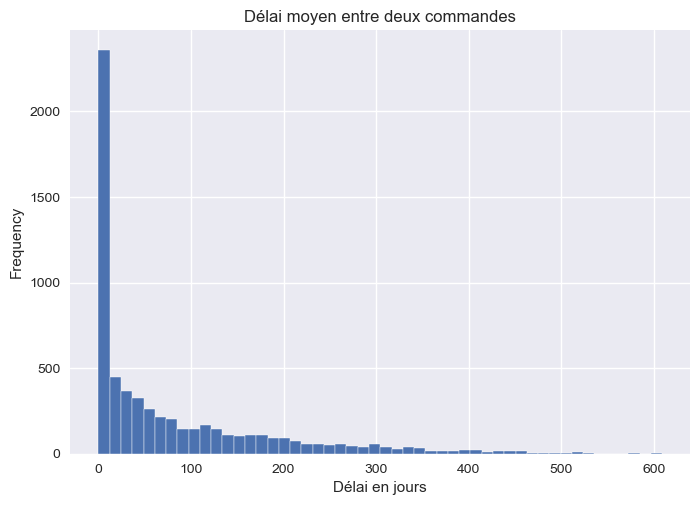

In [233]:
df_merge06['mean_time_between_order'].plot(kind='hist', bins=50, title='Délai moyen entre deux commandes')
plt.xlabel('Délai en jours')
plt.show()

#### Variable intéressante : proportion des frais de port dans la commande
Car on sait que cela peut influencer la décision d'achat d'un client potentiel

In [234]:
df_merge06['perct_freight_price'] = \
df_merge06['freight_value'] \
.divide(df_merge06['price']) \
.multiply(100)

In [235]:
df_merge06[['freight_value', 'price', 'perct_freight_price']].head()

freight_value   price  perct_freight_price
0          12.00  129.90             9.237875
1           8.29   18.90            43.862434
2          17.22   69.00            24.956522
3          17.63   25.99            67.833782
4          16.89  180.00             9.383333

In [236]:
# On peut supprimer la variable 'freight_value' sinon on créé un redondance (corrélation)
df_merge06.drop('freight_value', axis=1, inplace=True)

#### Autre variable intéressante : moyenne dépensé par un client ?
Bien que l'on ait une majorité de client n'ayant effectué qu'une seule commande,<br>
cela pourrait changer et il serait alors intéressant de savoir combien un client dépense en moyenne.<br>
Je l'intégre donc et je verrai la pertinence dans la prédiction de segment ensuite.

In [237]:
gb_customer_mean_order = df_merge06.groupby('customer_unique_id')[['order_id', 'price']] \
.agg({'order_id': 'count', 'price':'sum'}) \
.reset_index()
df_customer_mean_order = pd.DataFrame(gb_customer_mean_order)
df_customer_mean_order['customer_mean_order'] = df_customer_mean_order['price'] \
.divide(df_customer_mean_order['order_id'])
display(df_customer_mean_order.head())
display(df_customer_mean_order[df_customer_mean_order['customer_unique_id'] == 'ff36be26206fffe1eb37afd54c70e18b'])

customer_unique_id  order_id   price  customer_mean_order
0  0000366f3b9a7992bf8c76cfdf3221e2         1  129.90               129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f         1   18.90                18.90
2  0000f46a3911fa3c0805444483337064         1   69.00                69.00
3  0000f6ccb0745a6a4b88665a16c9f078         1   25.99                25.99
4  0004aac84e0df4da2b147fca70cf8255         1  180.00               180.00

customer_unique_id  order_id  price  customer_mean_order
95109  ff36be26206fffe1eb37afd54c70e18b         1   77.9                 77.9

In [238]:
df_customer_mean_order.drop(['order_id', 'price'], axis=1, inplace=True)

#### Merge 07 : récupération de la moyene de commande d'un client


In [239]:
df_merge07 = df_merge06.merge(df_customer_mean_order, how='left', on='customer_unique_id')

In [240]:
df_merge07[df_merge07['customer_unique_id'] == 'ff36be26206fffe1eb37afd54c70e18b']

customer_id                customer_unique_id  \
98350  13362fc2728edd1397282bb32cf319c1  ff36be26206fffe1eb37afd54c70e18b   

       customer_zip_code_prefix customer_city customer_state  \
98350                     13057      campinas             SP   

                               order_id order_status order_purchase_timestamp  \
98350  b02682757340133856bfb99145dd61cd      shipped      2018-07-28 15:49:27   

        order_approved_at  order_delivery_time  ... cat_telephony  \
98350 2018-07-28 16:24:00                  NaN  ...           0.0   

       cat_unknown cat_video_audio_instruments zip_code centroid_lat  \
98350          0.0                         0.0  13057.0   -22.972177   

      centroid_lng  order_renew_time  mean_time_between_order  \
98350   -47.164119               NaN                      NaN   

       perct_freight_price  customer_mean_order  
98350            19.075738                 77.9  

[1 rows x 53 columns]

### Ajustement et transformation pour 'customer_unique_id'
A dropper (customer_id, zip_code)

In [241]:
df_merge07.isna().sum()

customer_id                            0
customer_unique_id                     0
customer_zip_code_prefix               0
customer_city                          0
customer_state                         0
order_id                               0
order_status                           0
order_purchase_timestamp               0
order_approved_at                     14
order_delivery_time                 2190
review_id                              0
review_score                           0
review_comment_title               87061
review_comment_message             57603
review_creation_date                   0
review_answer_timestamp                0
payment_sequential                     1
payment_installments                   1
payment_value                          1
payment_type_boleto                    1
payment_type_credit_card               1
payment_type_debit_card                1
payment_type_voucher                   1
order_item_id                          0
product_id      

In [242]:
# Les client qui n'ont commandé qu'une seule fois n'ont pas de :
# 'order_renew_time' : temps entre une commande et la suivante
# 'mean_time_between_order' : temps moyen entre chaque commande
df_merge07.loc[df_merge07['order_renew_time'].isna(), 'order_renew_time'] = 0
df_merge07.loc[df_merge07['mean_time_between_order'].isna(), 'mean_time_between_order'] = 0

In [243]:
df_merge07[['order_renew_time', 'mean_time_between_order']].isna()

order_renew_time  mean_time_between_order
0                 False                    False
1                 False                    False
2                 False                    False
3                 False                    False
4                 False                    False
...                 ...                      ...
98661             False                    False
98662             False                    False
98663             False                    False
98664             False                    False
98665             False                    False

[98666 rows x 2 columns]

In [244]:
pd.set_option("display.max_columns", None)
df_merge07[df_merge07['zip_code'].isna()]

customer_id                customer_unique_id  \
101    bd15f9ff1287103a05384574f0525d58  003f4901fdb60ae9c1e2538b84c208e1   
170    bac2d6a45da3161ce6bcf6a09118b99e  006b297ed73773b17d8874a2eb4466e8   
249    876356df457f952458a764348e1858bc  00a39521eb40f7012db50455bf083460   
250    cbb68c721ba9ddb30d8a490cc1897fa1  00a39521eb40f7012db50455bf083460   
443    ed19fa6ce948d52be769926c2baaa17c  0124721bc33e0aa6772b42d4ccfd01db   
...                                 ...                               ...   
95739  e268970912eb010dea9194ee50e22276  f83ac6015ad3b37d4f96603f362cb14e   
96282  a92793be3ea218a1c299ef149d5584c2  f9a19bbde55fdbb899189f8c71272570   
96677  78bebfa74709728a62d4a98efbde8ac0  fac8b5e914037fc2e2476783585f0769   
96854  d09d644ae171858274e3c166df961b4c  fb3d2759405ec9a4a3e8eb61653a0bec   
97026  f09f554198d748578c957bcc58291e08  fbb25ad1452fbf7e073a084f8c2cbda6   

       customer_zip_code_prefix     customer_city customer_state  \
101                       73255          brasilia             DF   
170                       42716  lauro de freitas             BA   
249                       72595          brasilia             DF   
250                       72595          brasilia             DF   
443                       38710       major porto             MG   
...                         ...               ...            ...   
95739                     72280          brasilia             DF   
96282                     72280          brasilia             DF   
96677                     65137            maioba             MA   
96854                     72005          brasilia             DF   
97026                     73081          brasilia             DF   

                               order_id order_status order_purchase_timestamp  \
101    7ff2fc53faa0627c1754a4b00e5f65f2    delivered      2017-11-19 20:22:47   
170    f2a5651dedee83dc9eba7d0cb9703660    delivered      2018-04-09 15:49:31   
249    7d32c87acba91ed87ebd98310fe1c54d    delivered      2018-05-23 20:14:21   
250    cea3e6c11eb60acb9d8d4d51694832f8    delivered      2018-06-03 10:12:57   
443    009fa9bd0d92710e840793bfefa80867    delivered      2017-06-14 09:44:30   
...                                 ...          ...                      ...   
95739  61c5dc8ebe7576aeb5bde7e51ea1b490    delivered      2018-01-10 10:15:32   
96282  243e51c6daa403a763ee38c31ebdb883    delivered      2018-01-04 08:58:51   
96677  8734071c7bfc4d453e59546b22c5ce0e    delivered      2017-10-07 09:50:07   
96854  e2d97f385b79fa2f33a37c2c77965aec    delivered      2017-12-15 22:53:29   
97026  68517b95130ed0ea1dbcc575b88d6a9c    delivered      2018-02-17 12:41:53   

        order_approved_at  order_delivery_time  \
101   2017-11-19 20:35:21            16.996736   
170   2018-04-09 16:10:13            10.225972   
249   2018-05-23 20:35:15            19.018889   
250   2018-06-03 10:50:00            16.244317   
443   2017-06-17 03:50:11            24.320833   
...                   ...                  ...   
95739 2018-01-11 10:09:03            10.320602   
96282 2018-01-04 09:06:24             8.561273   
96677 2017-10-07 10:05:52            52.524016   
96854 2017-12-15 23:11:37            24.566817   
97026 2018-02-17 12:50:26            30.163715   

                              review_id  review_score review_comment_title  \
101    ade19c6b1f344653d62f4f754369111f           5.0                  NaN   
170    cec72a03fb5965b2a74c15b9b328e79c           5.0                  NaN   
249    71038953a8f997d0e6aecac3e76635a1           4.0                  NaN   
250    d18d89667712d5f44b85caf3320b46e1           4.0                  NaN   
443    95aa16d51abe6916225a97c15ed0459f           4.0                  NaN   
...                                 ...           ...                  ...   
95739  b44cb32689b915b14d75c8c75e1fc56c           5.0                  NaN   
96282  ccaad5c116ab37ff701c0f6ce0a7c8d1           5.0                  NaN   
96677  5a6

In [245]:
# Certains code postaux clients n'ont pas de coordonnées
display(df_merge07[df_merge07['order_id'] == '7ff2fc53faa0627c1754a4b00e5f65f2'])
display(dfs['customers'][dfs['customers']['customer_unique_id'] == '003f4901fdb60ae9c1e2538b84c208e1'])
display(dfs['geolocation'][dfs['geolocation']['geolocation_zip_code_prefix'] == '732255'])
display(dfs['geolocation'][dfs['geolocation']['geolocation_city'] == 'brasilia'])

customer_id                customer_unique_id  \
101  bd15f9ff1287103a05384574f0525d58  003f4901fdb60ae9c1e2538b84c208e1   

     customer_zip_code_prefix customer_city customer_state  \
101                     73255      brasilia             DF   

                             order_id order_status order_purchase_timestamp  \
101  7ff2fc53faa0627c1754a4b00e5f65f2    delivered      2017-11-19 20:22:47   

      order_approved_at  order_delivery_time  \
101 2017-11-19 20:35:21            16.996736   

                            review_id  review_score review_comment_title  \
101  ade19c6b1f344653d62f4f754369111f           5.0                  NaN   

    review_comment_message review_creation_date review_answer_timestamp  \
101   Chegou muito rápido   2017-12-07 00:00:00     2017-12-13 01:40:47   

     payment_sequential  payment_installments  payment_value  \
101                 1.0                   2.0         162.79   

     payment_type_boleto  payment_type_credit_card  payment_type_debit_card  \
101                  0.0                       1.0                      0.0   

     payment_type_voucher  order_item_id  product_id  shipping_limit_date  \
101                   0.0            1.0         1.0  2017-11-23 20:30:34   

     price  product_photos_qty  product_density  seller_id  cat_auto  \
101  148.0                 0.0             3.08        1.0       0.0   

     cat_books  cat_childhood  cat_construction_tools  \
101        0.0            0.0                     0.0   

     cat_fashion_clothes_accessories  cat_food  cat_gifts_art_decoration  \
101                              0.0       0.0                       0.0   

     cat_health_beauty_hygiene  cat_high_tech  cat_home_comfort_appliance  \
101                        0.0            0.0                         0.0   

     cat_home_office_furniture  cat_professional  cat_sports_leisure  \
101                        0.0               0.0                 0.0   

     cat_telephony  cat_unknown  cat_video_audio_instruments  zip_code  \
101            0.0          1.0                          0.0       NaN   

     centroid_lat  centroid_lng  order_renew_time  mean_time_between_order  \
101           NaN           NaN               0.0                      0.0   

     perct_freight_price  customer_mean_order  
101             9.993243                148.0

customer_id                customer_unique_id  \
17627  bd15f9ff1287103a05384574f0525d58  003f4901fdb60ae9c1e2538b84c208e1   

       customer_zip_code_prefix customer_city customer_state  
17627                     73255      brasilia             DF

Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
779484                        70057       -15.790439       -47.880655   
779485                        70067       -15.799190       -47.870102   
779488                        70065       -15.797782       -47.874682   
779489                        70048       -15.797782       -47.874682   
779490                        70077       -15.790767       -47.884439   
...                             ...              ...              ...   
793602                        73358       -15.617123       -47.641978   
793603                        73330       -15.790879       -47.850396   
793605                        73355       -15.613975       -47.633489   
793606                        73350       -15.619050       -47.647001   
793607                        73350       -15.616799       -47.649485   

       geolocation_city geolocation_state  
779484         brasilia                DF  
779485         brasilia                DF  
779488         brasilia                DF  
779489         brasilia                DF  
779490         brasilia                DF  
...                 ...               ...  
793602         brasilia                DF  
793603         brasilia                DF  
793605         brasilia                DF  
793606         brasilia                DF  
793607         brasilia                DF  

[10470 rows x 5 columns]

In [246]:
# valeurs moyennes de centroid (geolocalisation) des clients par état 
# (car codes postaux, pas possible : on ne les a pas tous)
gb_mean_centroid_by_state = df_merge07.groupby('customer_state')[['centroid_lat', 'centroid_lng']].agg('mean')
gb_mean_centroid_by_state.reset_index(inplace=True)

In [247]:
df_mean_centroid_by_state = pd.DataFrame(gb_mean_centroid_by_state)
display(df_mean_centroid_by_state.head())
display(df_mean_centroid_by_state[df_mean_centroid_by_state['customer_state'] == 'DF'])

customer_state  centroid_lat  centroid_lng
0             AC     -9.909279    -68.057614
1             AL     -9.618876    -36.016616
2             AM     -3.212150    -60.077177
3             AP      0.064551    -51.163365
4             BA    -13.025458    -39.450486

customer_state  centroid_lat  centroid_lng
6             DF    -15.811397    -47.971719

In [248]:
# Liste des états où l'un des codes postaux n'a pas de coordonnées
zip_code_nan_state = df_merge07['customer_state'].loc[df_merge07[df_merge07['zip_code'].isna()].index].unique()
print(zip_code_nan_state)

['DF' 'BA' 'MG' 'RN' 'PR' 'GO' 'SP' 'ES' 'PA' 'RJ' 'MA' 'CE' 'RS' 'AL'
 'PI' 'PE' 'PB' 'RO' 'SE' 'TO' 'MT']


In [249]:
centroid = \
df_mean_centroid_by_state[['centroid_lat', 'centroid_lng']]\
.loc[df_mean_centroid_by_state['customer_state'] == 'MG'].values.tolist()
print(centroid)

[[-19.917857973632422, -44.440733245801304]]


In [250]:
centroid[0][1]

-44.440733245801304

In [251]:
for state in zip_code_nan_state:
    centroid_lat = df_mean_centroid_by_state[['centroid_lat']][df_mean_centroid_by_state['customer_state'] == state].values
    centroid_lng = df_mean_centroid_by_state[['centroid_lng']][df_mean_centroid_by_state['customer_state'] == state].values
    #print(centroid_lat[0][0], centroid_lng[0][0])
    
    df_merge07.loc[(df_merge07['zip_code'].isna()) & (df_merge07['customer_state'] == state), 'centroid_lat'] = centroid_lat[0][0]
    df_merge07.loc[(df_merge07['zip_code'].isna()) & (df_merge07['customer_state'] == state), 'centroid_lng'] = centroid_lng[0][0]
    #display(df_merge07[['centroid_lat', 'centroid_lng']].loc[(df_merge07['zip_code'].isna()) & (df_merge07['customer_state'] == state)])

In [252]:
# On supprime les colonnes non nécessaires
df_merge07.drop(['customer_id', 'zip_code'], axis=1, inplace=True)

##### Inspection de valeur(s) manquante(s)

In [253]:
df_merge07[df_merge07['payment_sequential'].isna()]

customer_unique_id  customer_zip_code_prefix  \
50638  830d5b7aaa3b6f1e9ad63703bec97d23                     14600   

              customer_city customer_state                          order_id  \
50638  sao joaquim da barra             SP  bfbd0f9bdef84302105ad712db648a6c   

      order_status order_purchase_timestamp   order_approved_at  \
50638    delivered      2016-09-15 12:16:38 2016-09-15 12:16:38   

       order_delivery_time                         review_id  review_score  \
50638            54.813194  6916ca4502d6d3bfd39818759d55d536           1.0   

      review_comment_title                          review_comment_message  \
50638                  NaN  nao recebi o produto e nem resposta da empresa   

      review_creation_date review_answer_timestamp  payment_sequential  \
50638  2016-10-06 00:00:00     2016-10-07 18:32:28                 NaN   

       payment_installments  payment_value  payment_type_boleto  \
50638                   NaN            NaN                  NaN   

       payment_type_credit_card  payment_type_debit_card  \
50638                       NaN                      NaN   

       payment_type_voucher  order_item_id  product_id  shipping_limit_date  \
50638                   NaN            3.0         1.0  2016-09-19 23:11:33   

        price  product_photos_qty  product_density  seller_id  cat_auto  \
50638  134.97                 3.0           12.288        1.0       0.0   

       cat_books  cat_childhood  cat_construction_tools  \
50638        0.0            0.0                     0.0   

       cat_fashion_clothes_accessories  cat_food  cat_gifts_art_decoration  \
50638                              0.0       0.0                       0.0   

       cat_health_beauty_hygiene  cat_high_tech  cat_home_comfort_appliance  \
50638                        3.0            0.0                         0.0   

       cat_home_office_furniture  cat_professional  cat_sports_leisure  \
50638                        0.0               0.0                 0.0   

       cat_telephony  cat_unknown  cat_video_audio_instruments  centroid_lat  \
50638            0.0          0.0                          0.0    -20.585751   

       centroid_lng  order_renew_time  mean_time_between_order  \
50638    -47.863693               0.0                      0.0   

       perct_freight_price  customer_mean_order  
50638             6.290287               134.97

In [254]:
dfs['order_payments'][dfs['order_payments']['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []

In [255]:
payment_cols = [col for col in df_merge07.columns if col.startswith('payment_')]
df_merge07.loc[df_merge07['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c', payment_cols] = 0
#display(df_merge07[df_merge07['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c'])

In [256]:
idx_approved_at_nan = df_merge07[df_merge07['order_approved_at'].isna()].index
df_merge07[df_merge07['order_approved_at'].isna()]

customer_unique_id  customer_zip_code_prefix  \
17803  2e0a2166aa23da2472c6a60c4af6f7a6                      3573   
34907  5a4fa4919cbf2b049e72be460a380e5b                     35620   
43224  6ff8b0d7b35d5c945633b8d60165691b                     11030   
46989  79af1bbf230a2630487975aa5d7d6220                     37660   
48749  7e1a5ca61b572d76b64b6688b9f96473                     62700   
53415  8a9a08c7ca8900a200d83cf838a07e0b                      6708   
56206  91efb7fcabc17925099dced52435837f                     93548   
72608  bc1896dc77f49e6dec880445a9b443a3                     21020   
74378  c094ac95fcd52f821809ec232a7a6956                     95795   
75943  c4c0011e639bdbcf26059ddc38bd3c18                     13225   
77399  c8822fce1d0bfa7ddf0da24fff947172                     27945   
82151  d49f3dae6bad25d05160fc17aca5942d                     36400   
87200  e1f01a1bd6485e58ad3c769a5427d8a8                      8230   
95492  f79be7c08dd24b72d34634f1b89333a4                     65110   

              customer_city customer_state                          order_id  \
17803             sao paulo             SP  d69e5d356402adc8cf17e08b5033acfb   
34907                abaete             MG  2eecb0d85f281280f79fa00f9cec1a95   
43224                santos             SP  c1d4211b3dae76144deccd6c74144a88   
46989          paraisopolis             MG  51eb2eebd5d76a24625b31c33dd41449   
48749               caninde             CE  5cf925b116421afa85ee25e99b4c34fb   
53415                 cotia             SP  e04abd8149ef81b95221e88f6ed9ab6a   
56206         novo hamburgo             RS  8a9adc69528e1001fc68dd0aaebbb54a   
72608        rio de janeiro             RJ  88083e8f64d95b932164187484d90212   
74378         sao vendelino             RS  3c0b8706b065f9919d0505d3b3343881   
75943       varzea paulista             SP  d77031d6a3c8a52f019764e68f211c69   
77399                 macae             RJ  12a95a3c06dbaec84bcfb0e2da5d228a   
82151  conselheiro lafaiete             MG  7002a78c79c519ac54022d4f8a65e6e8   
87200             sao paulo             SP  7013bcfc1c97fe719a7b5e05e61c12db   
95492   sao jose de ribamar             MA  2babbb4b15e6d2dfe95e2de765c97bce   

      order_status order_purchase_timestamp order_approved_at  \
17803    delivered      2017-02-19 01:28:47               NaT   
34907    delivered      2017-02-17 17:21:55               NaT   
43224    delivered      2017-01-19 12:48:08               NaT   
46989    delivered      2017-02-18 15:52:27               NaT   
48749    delivered      2017-02-18 16:48:35               NaT   
53415    delivered      2017-02-18 14:40:00               NaT   
56206    delivered      2017-02-18 12:45:31               NaT   
72608    delivered      2017-02-18 22:49:19               NaT   
74378    delivered      2017-02-17 15:53:27               NaT   
75943    delivered      2017-02-18 11:04:19               NaT   
77399    delivered      2017-02-17 13:05:55               NaT   
82151    delivered      2017-01-19 22:26:59               NaT   
87200    delivered      2017-02-18 13:29:47               NaT   
95492    delivered      2017-02-18 17:15:03               NaT   

       order_delivery_time                         review_id  review_score  \
17803            11.092488  6540ad5bc5a8bfc9ede2d495bfb940dd           5.0   
34907            13.787593  dbe2aa3672139d1bfad4355863939c30           5.0   
43224            11.227697  a8353da830468c234d99152e0b714fed           4.0   
46989            16.920370  6352329f467fe888f25b35e48b11b97e           5.0   
48749            18.611250  4930703ae4fccd4d2d3b44cf63a9e632           5.0   
53415            10.948299  5d0fd5deb7e6a4f952cf63cc52cc18e3           4.0   
56206            11.888600  a2f476daadcb4b1f28542a6eabf99612           5.0   
72608            11.553322  331c2fea3f2c1512a9ca1889436a6904           4.0   
74378            13.829398  8cc64d9567be9b4f56c5cd423cfc3b02           3.0   
75943            12.216019  

In [257]:
# Seulement des commandes déjà livrées, on fixe avec la moyenne du temps d'approbation
mean_time_approved = (df_merge07['order_approved_at'] - df_merge07['order_purchase_timestamp']).mean()

In [258]:
mean_time_approved

Timedelta('0 days 10:19:16.735352552')

In [259]:
df_merge07['order_purchase_timestamp'].loc[df_merge07['order_approved_at'].isna()]

17803   2017-02-19 01:28:47
34907   2017-02-17 17:21:55
43224   2017-01-19 12:48:08
46989   2017-02-18 15:52:27
48749   2017-02-18 16:48:35
53415   2017-02-18 14:40:00
56206   2017-02-18 12:45:31
72608   2017-02-18 22:49:19
74378   2017-02-17 15:53:27
75943   2017-02-18 11:04:19
77399   2017-02-17 13:05:55
82151   2017-01-19 22:26:59
87200   2017-02-18 13:29:47
95492   2017-02-18 17:15:03
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [260]:
df_merge07.loc[df_merge07['order_approved_at'].isna(), 'order_approved_at'] = \
df_merge07['order_purchase_timestamp'].loc[df_merge07['order_approved_at'].isna()] + \
mean_time_approved
#display(df_merge07.loc[idx_approved_at_nan])

In [261]:
df_merge07.head()

customer_unique_id  customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      6053        osasco   
2  0000f46a3911fa3c0805444483337064                     88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                     66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                     18040      sorocaba   

  customer_state                          order_id order_status  \
0             SP  e22acc9c116caa3f2b7121bbb380d08e    delivered   
1             SP  3594e05a005ac4d06a72673270ef9ec9    delivered   
2             SC  b33ec3b699337181488304f362a6b734    delivered   
3             PA  41272756ecddd9a9ed0180413cc22fb6    delivered   
4             SP  d957021f1127559cd947b62533f484f7    delivered   

  order_purchase_timestamp   order_approved_at  order_delivery_time  \
0      2018-05-10 10:56:27 2018-05-10 11:11:18             6.411227   
1      2018-05-07 11:11:27 2018-05-07 18:25:44             3.285590   
2      2017-03-10 21:05:03 2017-03-10 21:05:03            25.731759   
3      2017-10-12 20:29:41 2017-10-12 20:49:17            20.037083   
4      2017-11-14 19:45:42 2017-11-14 20:06:52            13.141134   

                          review_id  review_score review_comment_title  \
0  13359f48c3c7e41a2b8afca340937eeb           5.0      Super Recomendo   
1  e383e10e36a765f04f752a37c1674e43           4.0                  NaN   
2  d89cb4217c23008b141e66c3160de8a4           3.0                  NaN   
3  6f22e4ad2cd9e0d40c5842e4787b4321           4.0                  NaN   
4  880a77e7dd4e496969f138f974cc44a1           5.0                  NaN   

                              review_comment_message review_creation_date  \
0  Adorei a cortina, ficou linda na minha sala, e...  2018-05-17 00:00:00   
1                                                NaN  2018-05-11 00:00:00   
2                                                NaN  2017-04-06 00:00:00   
3                                       Bom vendedor  2017-11-02 00:00:00   
4                                                NaN  2017-11-28 00:00:00   

  review_answer_timestamp  payment_sequential  payment_installments  \
0     2018-05-21 13:44:48                 1.0                   8.0   
1     2018-05-11 22:29:25                 1.0                   1.0   
2     2017-04-07 01:19:44                 1.0                   8.0   
3     2017-11-03 00:17:51                 1.0                   4.0   
4     2017-12-02 22:29:35                 1.0                   6.0   

   payment_value  payment_type_boleto  payment_type_credit_card  \
0         141.90                  0.0                       1.0   
1          27.19                  0.0                       1.0   
2          86.22                  0.0                       1.0   
3          43.62                  0.0                       1.0   
4         196.89                  0.0                       1.0   

   payment_type_debit_card  payment_type_voucher  order_item_id  product_id  \
0                      0.0                   0.0            1.0         1.0   
1                      0.0                   0.0            1.0         1.0   
2                      0.0                   0.0            1.0         1.0   
3                      0.0                   0.0            1.0         1.0   
4                      0.0                   0.0            1.0         1.0   

   shipping_limit_date   price  product_photos_qty  product_density  \
0  2018-05-15 11:11:18  129.90                 1.0         5.077333   
1  2018-05-11 17:56:33   18.90                 1.0        13.728000   
2  2017-03-15 21:05:03   69.00                 3.0        29.166667   
3  2017-10-18 21:49:17   25.99                 5.0         6.966667   
4  2017-11-22 20:06:52  180.00                 3.0         0.087273   

   seller_id  cat_auto  cat_books  cat_childhood  cat_construction_tools

In [262]:
df_merge07_prep = df_merge07.copy()

In [263]:
df_merge07_prep.drop([
    'order_purchase_timestamp',
    'order_approved_at',
    'review_creation_date',
    'review_answer_timestamp',
    #'payment_installments',
    'shipping_limit_date',
    'order_renew_time',
    'price'
], axis=1, inplace=True)

In [264]:
# Une ligne qui résume un consommateur ('customer_unique_id') 
# nécessite d'aggréger l'ensemble avec ce qui a déjà été préparé en ce sens
gb_customer_unique_id = df_merge07_prep.groupby('customer_unique_id')[df_merge07_prep.columns] \
.agg({
    'customer_zip_code_prefix' : 'first',
    'customer_city' : 'first',
    'customer_state' : 'first',
    'order_id' : 'count', # le nombre de commandes passées
    'order_status' : lambda x: len(x.unique()), # e.g. : si deux fois 'shipped' -> 1
    'order_delivery_time' : 'mean', # Moyenne du temps de livraison pour l'ensemble des commandes
    'review_id' : 'count', # Nombre de reviews du client
    'review_score' : 'mean', # Moyenne de notation pour l'ensemble des commandes
    'review_comment_title' : lambda x: x if not np.nan else ' '.join(x.dropna()), # On garde l'ensemble des mots-clefs du client (NMF ?)
    'review_comment_message' : lambda x: x if not np.nan else ' '.join(x.dropna()), # Idem on garde pour éventuellement l'exploiter ensuite
    'payment_sequential' : 'max', # Nombre maximum où le client a payé en plusieurs fois
    'payment_installments' : 'max', # Nombre maximum où le client a étalé le paiement en plusieurs avec un moyen de paiement
    'payment_value' : 'sum', # Somme total de toutes les commandes (avec frais de ports)
    'payment_type_boleto' : 'sum',
    'payment_type_credit_card' : 'sum',
    'payment_type_debit_card' : 'sum',
    'payment_type_voucher' : 'sum',
    'order_item_id' : 'sum', # Nombre d' articles sur l'ensemble des commandes
    'product_id' : 'max', # Nombre maximum des différents types d'articles commandés
    'seller_id' : 'max', # Nombre maximum des différents vendeurs où le client a commandé
    #'price' : 'sum', # Somme des produits commandés sans frais de port
    'product_photos_qty' : 'sum', #  Nombre total de photos rattachées aux produits commandés
    'product_density' : 'sum', # Volume total des produits commandés (gros / petit volume)
    'cat_auto' : 'sum', # Pourquoi la somme ? Comme pour toutes les catégories cela nous donne le nombre de produits de cette catégorie
    'cat_books' : 'sum',
    'cat_childhood' : 'sum',
    'cat_construction_tools' : 'sum',
    'cat_fashion_clothes_accessories' : 'sum',
    'cat_food' : 'sum',
    'cat_gifts_art_decoration' : 'sum',
    'cat_health_beauty_hygiene' : 'sum',
    'cat_high_tech' : 'sum',
    'cat_home_comfort_appliance' : 'sum',
    'cat_home_office_furniture' : 'sum',
    'cat_professional' : 'sum',
    'cat_telephony' : 'sum',
    'cat_unknown' : 'sum',
    'cat_video_audio_instruments' : 'sum',
    'centroid_lat' : 'mean', # Si un client a commandé depuis deux endroits différents ? -> moyenne acceptable si peu de distance
    'centroid_lng' : 'mean',
    'mean_time_between_order' : 'first', # déjà calculé c'est le même pour toutes les commandes d'un client
    'perct_freight_price' : 'mean', # Moyenne de la proportion des frais de port pour l'ensemble des commandes
    'customer_mean_order' : 'first', # déjà calculé c'est le même pour toutes les commandes d'un client
})

In [265]:
# On convertit en DataFrame pour inspection finale
df_customer_unique_id = pd.DataFrame(gb_customer_unique_id)
df_customer_unique_id.reset_index(inplace=True)
print(df_customer_unique_id.isna().sum())
display(df_customer_unique_id.head())

customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_delivery_time                2064
review_id                             0
review_score                          0
review_comment_title                  0
review_comment_message                0
payment_sequential                    0
payment_installments                  0
payment_value                         0
payment_type_boleto                   0
payment_type_credit_card              0
payment_type_debit_card               0
payment_type_voucher                  0
order_item_id                         0
product_id                            0
seller_id                             0
product_photos_qty                    0
product_density                       0
cat_auto                              0
cat_books                             0


customer_unique_id  customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      6053        osasco   
2  0000f46a3911fa3c0805444483337064                     88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                     66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                     18040      sorocaba   

  customer_state  order_id  order_status  order_delivery_time  review_id  \
0             SP         1             1             6.411227          1   
1             SP         1             1             3.285590          1   
2             SC         1             1            25.731759          1   
3             PA         1             1            20.037083          1   
4             SP         1             1            13.141134          1   

   review_score review_comment_title  \
0           5.0      Super Recomendo   
1           4.0                        
2           3.0                        
3           4.0                        
4           5.0                        

                              review_comment_message  payment_sequential  \
0  Adorei a cortina, ficou linda na minha sala, e...                 1.0   
1                                                                    1.0   
2                                                                    1.0   
3                                       Bom vendedor                 1.0   
4                                                                    1.0   

   payment_installments  payment_value  payment_type_boleto  \
0                   8.0         141.90                  0.0   
1                   1.0          27.19                  0.0   
2                   8.0          86.22                  0.0   
3                   4.0          43.62                  0.0   
4                   6.0         196.89                  0.0   

   payment_type_credit_card  payment_type_debit_card  payment_type_voucher  \
0                       1.0                      0.0                   0.0   
1                       1.0                      0.0                   0.0   
2                       1.0                      0.0                   0.0   
3                       1.0                      0.0                   0.0   
4                       1.0                      0.0                   0.0   

   order_item_id  product_id  seller_id  product_photos_qty  product_density  \
0            1.0         1.0        1.0                 1.0         5.077333   
1            1.0         1.0        1.0                 1.0        13.728000   
2            1.0         1.0        1.0                 3.0        29.166667   
3            1.0         1.0        1.0                 5.0         6.966667   
4            1.0         1.0        1.0                 3.0         0.087273   

   cat_auto  cat_books  cat_childhood  cat_construction_tools  \
0       0.0        0.0            0.0                     0.0   
1       0.0        0.0            0.0                     0.0   
2       0.0        0.0            0.0                     0.0   
3       0.0        0.0            0.0                     0.0   
4       0.0        0.0            0.0                     0.0   

   cat_fashion_clothes_accessories  cat_food  cat_gifts_art_decoration  \
0                              0.0       0.0                       0.0   
1                              0.0       0.0                       0.0   
2                              0.0       0.0                       0.0   
3                              0.0       0.0                       0.0   
4                              0.0       0.0                       0.0   

   cat_health_beauty_hygiene  cat_high_tech  cat_home_comfort_appliance  \
0                        0.0            0.0                         1.0   
1                        1.0            0.0                         0.0 

In [266]:
df_customer_unique_id[df_customer_unique_id['customer_unique_id'] == 'fe81bb32c243a86b2f86fbf053fe6140']

customer_unique_id  customer_zip_code_prefix  \
94863  fe81bb32c243a86b2f86fbf053fe6140                      1453   

      customer_city customer_state  order_id  order_status  \
94863     sao paulo             SP         5             1   

       order_delivery_time  review_id  review_score  \
94863             4.049981          5           4.2   

                  review_comment_title  \
94863  Recomendo Muito Recomendo muito   

                                  review_comment_message  payment_sequential  \
94863  O relógio não veio com manual de instruções. P...                 1.0   

       payment_installments  payment_value  payment_type_boleto  \
94863                   5.0        1590.76                  1.0   

       payment_type_credit_card  payment_type_debit_card  \
94863                       4.0                      0.0   

       payment_type_voucher  order_item_id  product_id  seller_id  \
94863                   0.0            5.0         1.0        1.0   

       product_photos_qty  product_density  cat_auto  cat_books  \
94863                 9.0        23.346848       0.0        0.0   

       cat_childhood  cat_construction_tools  cat_fashion_clothes_accessories  \
94863            0.0                     0.0                              0.0   

       cat_food  cat_gifts_art_decoration  cat_health_beauty_hygiene  \
94863       0.0                       5.0                        0.0   

       cat_high_tech  cat_home_comfort_appliance  cat_home_office_furniture  \
94863            0.0                         0.0                        0.0   

       cat_professional  cat_telephony  cat_unknown  \
94863               0.0            0.0          0.0   

       cat_video_audio_instruments  centroid_lat  centroid_lng  \
94863                          0.0    -23.584059    -46.686376   

       mean_time_between_order  perct_freight_price  customer_mean_order  
94863                60.507127             8.755798               307.08

In [267]:
df_merge07[df_merge07['customer_unique_id'] == 'fe81bb32c243a86b2f86fbf053fe6140']

customer_unique_id  customer_zip_code_prefix  \
98096  fe81bb32c243a86b2f86fbf053fe6140                      1453   
98097  fe81bb32c243a86b2f86fbf053fe6140                      1453   
98098  fe81bb32c243a86b2f86fbf053fe6140                      1453   
98099  fe81bb32c243a86b2f86fbf053fe6140                      1453   
98100  fe81bb32c243a86b2f86fbf053fe6140                      1453   

      customer_city customer_state                          order_id  \
98096     sao paulo             SP  f3e4f61152aed686fbbb83e794cc246d   
98097     sao paulo             SP  4b3c7f8318b056586e0407857f44a136   
98098     sao paulo             SP  556b30ae47829a82927b5dff9ca2ba65   
98099     sao paulo             SP  882af1e2ad3e4b132d4b23c429843dc8   
98100     sao paulo             SP  6baca7e224a54a0323eb003e011c9b8a   

      order_status order_purchase_timestamp   order_approved_at  \
98096    delivered      2017-10-22 11:29:22 2017-10-22 11:45:21   
98097    delivered      2017-10-31 16:20:25 2017-11-01 03:26:13   
98098    delivered      2018-02-23 14:34:34 2018-02-23 14:51:07   
98099    delivered      2018-06-14 11:35:32 2018-06-14 11:59:47   
98100    delivered      2018-06-21 12:10:25 2018-06-21 12:40:49   

       order_delivery_time                         review_id  review_score  \
98096             2.378229  1e9cbfefa1b6d6e5fd92e605b5df1427           5.0   
98097             3.171586  4ef1beefd4aabdae125552a34ac8eb47           1.0   
98098             6.289444  2101352833bec05fe85188d6fd75570e           5.0   
98099             4.174282  295c58a1ffe71e708415600cb65f4023           5.0   
98100             4.236366  487518e2f117213d4fac0c40924b8c7b           5.0   

      review_comment_title                          review_comment_message  \
98096                  NaN                                             NaN   
98097                  NaN    O relógio não veio com manual de instruções.   
98098                  NaN                                             NaN   
98099      Recomendo Muito  Produto entregue lacrado e em perfeito estado.   
98100      Recomendo muito             Recebi o relógio em perfeito estado   

      review_creation_date review_answer_timestamp  payment_sequential  \
98096  2017-10-25 00:00:00     2017-10-25 14:15:23                 1.0   
98097  2017-11-04 00:00:00     2017-11-07 16:19:31                 1.0   
98098  2018-03-02 00:00:00     2018-03-04 13:37:44                 1.0   
98099  2018-06-19 00:00:00     2018-06-20 14:11:48                 1.0   
98100  2018-06-26 00:00:00     2018-06-27 12:31:10                 1.0   

       payment_installments  payment_value  payment_type_boleto  \
98096                   1.0          63.78                  0.0   
98097                   1.0          63.78                  1.0   
98098                   1.0          78.88                  0.0   
98099                   5.0        1035.79                  0.0   
98100                   4.0         348.53                  0.0   

       payment_type_credit_card  payment_type_debit_card  \
98096                       1.0                      0.0   
98097                       0.0                      0.0   
98098                       1.0                      0.0   
98099                       1.0                      0.0   
98100                       1.0                      0.0   

       payment_type_voucher  order_item_id  product_id  shipping_limit_date  \
98096                   0.0            1.0         1.0  2017-10-26 11:45:21   
98097                   0.0            1.0         1.0  2017-11-08 03:26:13   
98098                   0.0            1.0         1.0  2018-03-01 14:51:07   
98099                   0.0            1.0         1.0  2018-06-20 11:59:47   
98100                   0.0            1.0         1.0  2018-06-25 12:30:58   

        price  product_photos_qty  product_density  seller_id  cat_auto  \
98096    56.0                 1.0         2.133333        1.0       0.0  

In [268]:
df_merge07[df_merge07['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']

customer_unique_id  customer_zip_code_prefix  \
53554  8af7ac63b2efbcbd88e5b11505e8098a                     78065   

      customer_city customer_state                          order_id  \
53554        cuiaba             MT  fa65dad1b0e818e3ccc5cb0e39231352   

      order_status order_purchase_timestamp   order_approved_at  \
53554      shipped      2017-04-20 12:45:34 2017-04-22 09:10:13   

       order_delivery_time                         review_id  review_score  \
53554                  NaN  f28281373ab8815bafafe371218f02ce           1.0   

      review_comment_title                             review_comment_message  \
53554                  NaN  A mercadoria não foi entregue. Entrara em cont...   

      review_creation_date review_answer_timestamp  payment_sequential  \
53554  2017-05-21 00:00:00     2017-05-24 16:21:27                29.0   

       payment_installments  payment_value  payment_type_boleto  \
53554                   1.0         457.99                  0.0   

       payment_type_credit_card  payment_type_debit_card  \
53554                       0.0                      0.0   

       payment_type_voucher  order_item_id  product_id  shipping_limit_date  \
53554                  29.0            1.0         1.0  2017-04-27 09:10:13   

        price  product_photos_qty  product_density  seller_id  cat_auto  \
53554  392.55                 1.0         5.487805        1.0       0.0   

       cat_books  cat_childhood  cat_construction_tools  \
53554        0.0            0.0                     1.0   

       cat_fashion_clothes_accessories  cat_food  cat_gifts_art_decoration  \
53554                              0.0       0.0                       0.0   

       cat_health_beauty_hygiene  cat_high_tech  cat_home_comfort_appliance  \
53554                        0.0            0.0                         0.0   

       cat_home_office_furniture  cat_professional  cat_sports_leisure  \
53554                        0.0               0.0                 0.0   

       cat_telephony  cat_unknown  cat_video_audio_instruments  centroid_lat  \
53554            0.0          0.0                          0.0    -15.617234   

       centroid_lng  order_renew_time  mean_time_between_order  \
53554    -56.077693               0.0                      0.0   

       perct_freight_price  customer_mean_order  
53554            16.670488               392.55

In [269]:
# Renommage des colonnes pour plus de clarté
df_customer_unique_id.rename(columns={
    'order_id' : 'number_orders',
    'order_delivery_time' : 'mean_delivery_time',
    'review_id' : 'number_reviews',
    'review_score' : 'mean_reviews_score',
    'review_comment_title' : 'words_comments_title',
    'review_comment_message' : 'words_comments_message',
    'payment_sequential' : 'max_number_payments_type', # paiement en plusieurs fois avec un ou différents moyens de paiements
    'payment_installments' : 'max_number_payments_spread', # Etalement du paiement en plusieurs fois (mensualité par exemple)
    'payment_value' : 'total_payments_amount', # incluant les frais de port
    'order_item_id' : 'total_products_ordered',
    'product_id' : 'max_items_type_ordered',
    'seller_id' : 'max_sellers_ordered',
    'perct_freight_price' : 'mean_perct_freight' 
}, inplace=True)

In [270]:
df_customer_unique_id_num = df_customer_unique_id.select_dtypes(include=[np.float64])
df_customer_unique_id_num.head()

mean_delivery_time  mean_reviews_score  max_number_payments_type  \
0            6.411227                 5.0                       1.0   
1            3.285590                 4.0                       1.0   
2           25.731759                 3.0                       1.0   
3           20.037083                 4.0                       1.0   
4           13.141134                 5.0                       1.0   

   max_number_payments_spread  total_payments_amount  payment_type_boleto  \
0                         8.0                 141.90                  0.0   
1                         1.0                  27.19                  0.0   
2                         8.0                  86.22                  0.0   
3                         4.0                  43.62                  0.0   
4                         6.0                 196.89                  0.0   

   payment_type_credit_card  payment_type_debit_card  payment_type_voucher  \
0                       1.0                      0.0                   0.0   
1                       1.0                      0.0                   0.0   
2                       1.0                      0.0                   0.0   
3                       1.0                      0.0                   0.0   
4                       1.0                      0.0                   0.0   

   total_products_ordered  max_items_type_ordered  max_sellers_ordered  \
0                     1.0                     1.0                  1.0   
1                     1.0                     1.0                  1.0   
2                     1.0                     1.0                  1.0   
3                     1.0                     1.0                  1.0   
4                     1.0                     1.0                  1.0   

   product_photos_qty  product_density  cat_auto  cat_books  cat_childhood  \
0                 1.0         5.077333       0.0        0.0            0.0   
1                 1.0        13.728000       0.0        0.0            0.0   
2                 3.0        29.166667       0.0        0.0            0.0   
3                 5.0         6.966667       0.0        0.0            0.0   
4                 3.0         0.087273       0.0        0.0            0.0   

   cat_construction_tools  cat_fashion_clothes_accessories  cat_food  \
0                     0.0                              0.0       0.0   
1                     0.0                              0.0       0.0   
2                     0.0                              0.0       0.0   
3                     0.0                              0.0       0.0   
4                     0.0                              0.0       0.0   

   cat_gifts_art_decoration  cat_health_beauty_hygiene  cat_high_tech  \
0                       0.0                        0.0            0.0   
1                       0.0                        1.0            0.0   
2                       0.0                        0.0            0.0   
3                       0.0                        0.0            0.0   
4                       0.0                        0.0            0.0   

   cat_home_comfort_appliance  cat_home_office_furniture  cat_professional  \
0                         1.0                        0.0               0.0   
1                         0.0                        0.0               0.0   
2                         0.0                        1.0               0.0   
3                         0.0                        0.0               0.0   
4                         0.0                        0.0               0.0   

   cat_telephony  cat_unknown  cat_video_audio_instruments  centroid_lat  \
0            0.0          0.0                          0.0    -23.340235   
1            0.0          0.0                          0.0    -23.559115   
2            0.0          0.0                          0.0    -27.542880   
3            1.0          0.0                          0.0     -1.312214   
4        

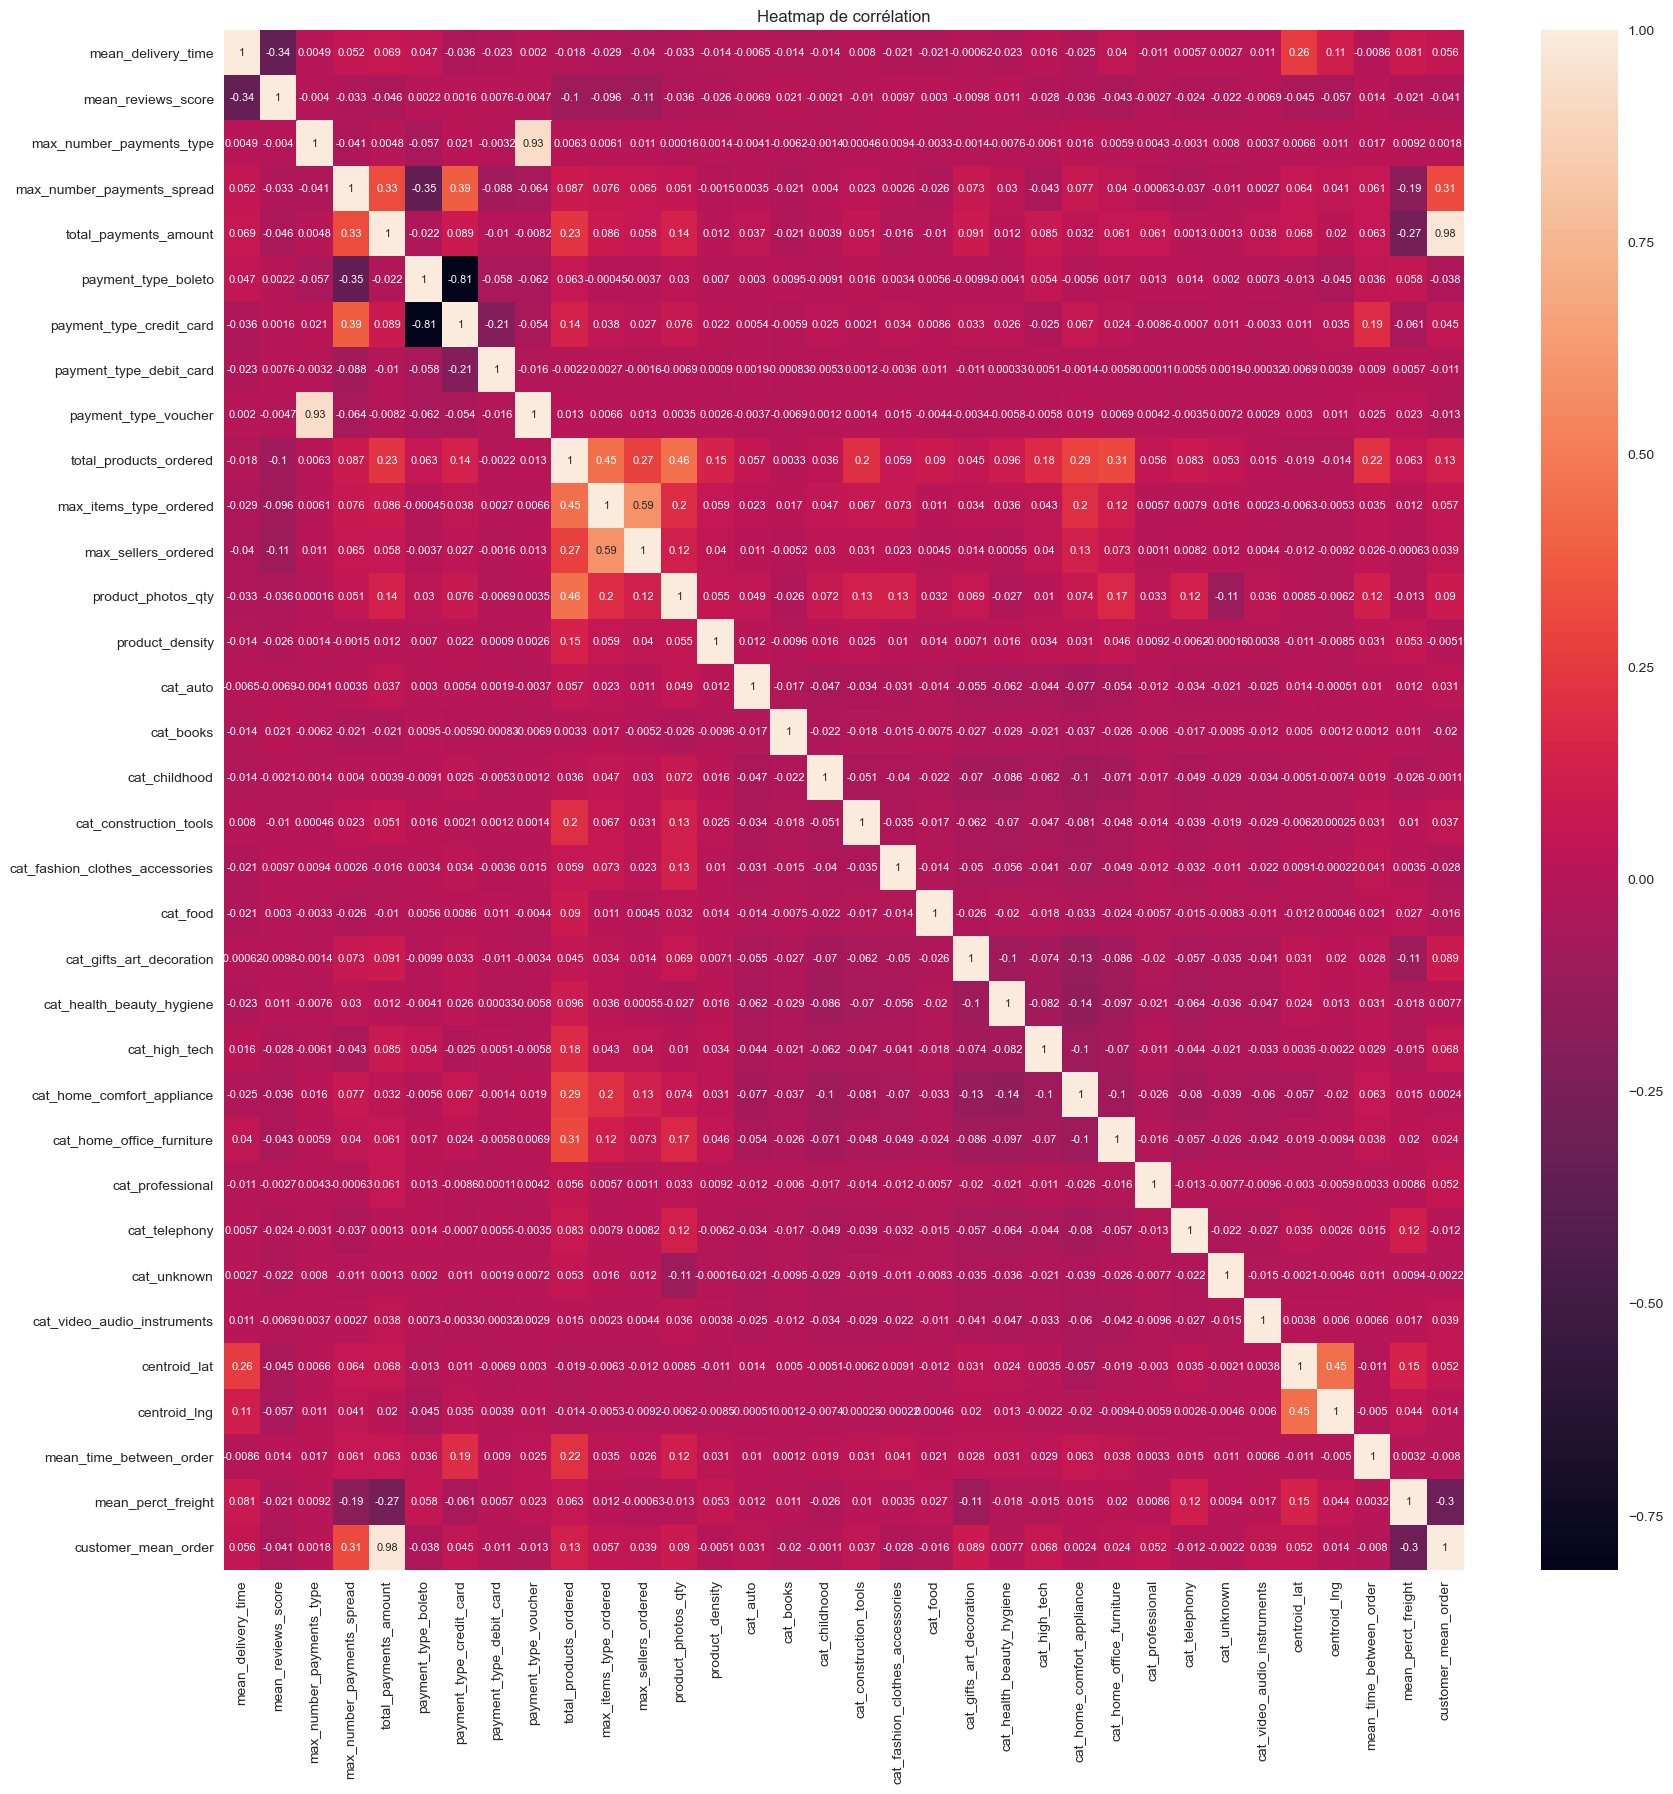

In [271]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df_customer_unique_id_num.corr(), annot=True, annot_kws={"fontsize":8})
ax.set_title("Heatmap de corrélation")
plt.show()

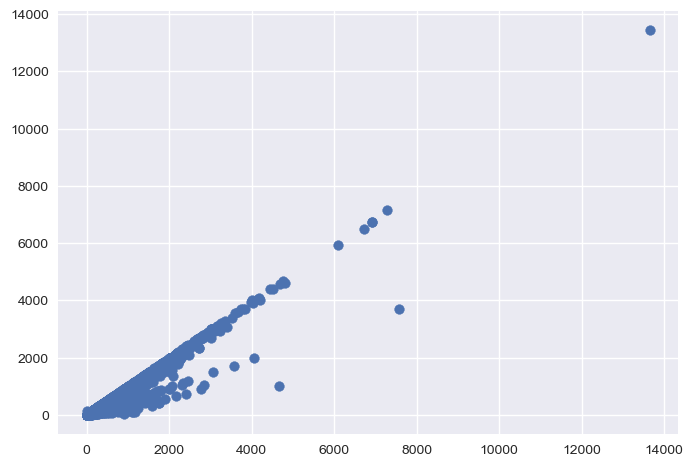

In [272]:
# Peut changer dans le temps car pour l'instant la mojorité des clients passent une unique commande
plt.scatter(df_customer_unique_id['total_payments_amount'], df_customer_unique_id['customer_mean_order'])
plt.show()

### Inspection des valeurs nulles
But : éviter les problèmes de transformation ensuite (log, boxcox, etc)

In [273]:
cat_cols = [col for col in df_customer_unique_id.columns if col.startswith('cat_')]
payment_cols = [col for col in df_customer_unique_id.columns if col.startswith('payment_')]
categories_cols = cat_cols + payment_cols
df_inpect_zero_values = df_customer_unique_id[df_customer_unique_id.columns.difference(categories_cols)]
df_inpect_zero_values = df_inpect_zero_values.iloc[:, 2:].select_dtypes(include=['float64', 'int64'])

#print(df_inpect_zero_values.info())
display(df_inpect_zero_values.loc[df_inpect_zero_values.isnull().any(axis=1)])
display(df_inpect_zero_values.agg(['min', 'max']))

customer_mean_order  customer_zip_code_prefix  max_items_type_ordered  \
44                   99.90                      9581                     1.0   
58                   39.90                      8225                     1.0   
234                  77.00                     22210                     1.0   
306                  38.00                     40290                     1.0   
355                 399.90                     41200                     1.0   
...                    ...                       ...                     ...   
95340                86.42                     14811                     1.0   
95347               141.64                      4431                     1.0   
95365               687.00                     62020                     1.0   
95380                49.98                      8615                     1.0   
95414               688.00                     28909                     1.0   

       max_number_payments_spread  max_number_payments_type  \
44                            1.0                       1.0   
58                            1.0                       1.0   
234                           1.0                       1.0   
306                           1.0                       1.0   
355                          10.0                       1.0   
...                           ...                       ...   
95340                         1.0                       1.0   
95347                         8.0                       1.0   
95365                         1.0                       1.0   
95380                         2.0                       1.0   
95414                         3.0                       1.0   

       max_sellers_ordered  mean_delivery_time  mean_perct_freight  \
44                     1.0                 NaN           16.346346   
58                     1.0                 NaN           31.278195   
234                    1.0                 NaN           18.558442   
306                    1.0                 NaN           44.894737   
355                    1.0                 NaN            5.261315   
...                    ...                 ...                 ...   
95340                  1.0                 NaN            9.662115   
95347                  1.0                 NaN            9.672409   
95365                  1.0                 NaN           16.002911   
95380                  1.0                 NaN           14.785914   
95414                  1.0                 NaN            3.299419   

       mean_reviews_score  mean_time_between_order  number_orders  \
44                    4.0                      0.0              1   
58                    2.0                      0.0              1   
234                   5.0                      0.0              1   
306                   1.0                      0.0              1   
355                   1.0                      0.0              1   
...                   ...                      ...            ...   
95340                 4.0                      0.0              1   
95347                 3.0                      0.0              1   
95365                 1.0                      0.0              1   
95380                 1.0                      0.0              1   
95414                 1.0                      0.0              1   

       number_reviews  order_status  product_density  product_photos_qty  \
44                  1             1         5.965909                 1.0   
58                  1             1        14.423077                 2.0   
234                 1             1         4.356000                 6.0   
306                 1             1        14.080000                 2.0   
355                 1             1         9.773115                 2.0   
...               ...           ...              ...                 ...   
95340               1             1        19.895652                 1.0   
95347      

customer_mean_order  customer_zip_code_prefix  max_items_type_ordered  \
min                 0.85                      1003                     1.0   
max             13440.00                     99990                     8.0   

     max_number_payments_spread  max_number_payments_type  \
min                         0.0                       0.0   
max                        24.0                      29.0   

     max_sellers_ordered  mean_delivery_time  mean_perct_freight  \
min                  1.0            0.533414            0.000000   
max                  5.0          209.628611         2144.705882   

     mean_reviews_score  mean_time_between_order  number_orders  \
min                 1.0                 0.000000              1   
max                 5.0               608.978912             16   

     number_reviews  order_status  product_density  product_photos_qty  \
min               1             1             0.00                 0.0   
max              16             2         13618.86                96.0   

     total_payments_amount  total_products_ordered  
min                   0.00                     1.0  
max               13664.08                    24.0

In [274]:
# Imputation des commandes par la moyenne de livraison des commandes pas encore livrées
print(df_customer_unique_id['mean_delivery_time'].mean())
df_customer_unique_id.loc[df_customer_unique_id['mean_delivery_time'].isna(), 'mean_delivery_time'] = \
df_customer_unique_id['mean_delivery_time'].mean()

12.567974377213531


In [275]:
df_inpect_zero_values[df_inpect_zero_values['max_number_payments_spread'] == 0]

customer_mean_order  customer_zip_code_prefix  max_items_type_ordered  \
48972               134.97                     14600                     1.0   
57113                83.38                     44001                     1.0   
91485                45.90                      5263                     1.0   

       max_number_payments_spread  max_number_payments_type  \
48972                         0.0                       0.0   
57113                         0.0                       2.0   
91485                         0.0                       2.0   

       max_sellers_ordered  mean_delivery_time  mean_perct_freight  \
48972                  1.0           54.813194            6.290287   
57113                  1.0            8.972535           55.840729   
91485                  1.0            5.389421           27.864924   

       mean_reviews_score  mean_time_between_order  number_orders  \
48972                 1.0                      0.0              1   
57113                 5.0                      0.0              1   
91485                 5.0                      0.0              1   

       number_reviews  order_status  product_density  product_photos_qty  \
48972               1             1          12.2880                 3.0   
57113               1             1          23.2760                 2.0   
91485               1             1          12.1875                 1.0   

       total_payments_amount  total_products_ordered  
48972                   0.00                     3.0  
57113                 129.94                     2.0  
91485                  58.69                     1.0

In [276]:
# Corrections : max_number_payments_spread = 0 -> imputation à 1
df_customer_unique_id.loc[[48972, 57113, 91485], 'max_number_payments_spread'] = 1
display(df_customer_unique_id.loc[[48972, 57113, 91485]])

customer_unique_id  customer_zip_code_prefix  \
48972  830d5b7aaa3b6f1e9ad63703bec97d23                     14600   
57113  9925e1d7dff0d807355599dee04830ab                     44001   
91485  f54cea27c80dc09bfe07b1cf1e01b845                      5263   

              customer_city customer_state  number_orders  order_status  \
48972  sao joaquim da barra             SP              1             1   
57113      feira de santana             BA              1             1   
91485             sao paulo             SP              1             1   

       mean_delivery_time  number_reviews  mean_reviews_score  \
48972           54.813194               1                 1.0   
57113            8.972535               1                 5.0   
91485            5.389421               1                 5.0   

      words_comments_title                          words_comments_message  \
48972                       nao recebi o produto e nem resposta da empresa   
57113                                                                        
91485                                                                        

       max_number_payments_type  max_number_payments_spread  \
48972                       0.0                         1.0   
57113                       2.0                         1.0   
91485                       2.0                         1.0   

       total_payments_amount  payment_type_boleto  payment_type_credit_card  \
48972                   0.00                  0.0                       0.0   
57113                 129.94                  0.0                       1.0   
91485                  58.69                  0.0                       1.0   

       payment_type_debit_card  payment_type_voucher  total_products_ordered  \
48972                      0.0                   0.0                     3.0   
57113                      0.0                   0.0                     2.0   
91485                      0.0                   0.0                     1.0   

       max_items_type_ordered  max_sellers_ordered  product_photos_qty  \
48972                     1.0                  1.0                 3.0   
57113                     1.0                  1.0                 2.0   
91485                     1.0                  1.0                 1.0   

       product_density  cat_auto  cat_books  cat_childhood  \
48972          12.2880       0.0        0.0            0.0   
57113          23.2760       0.0        0.0            0.0   
91485          12.1875       0.0        0.0            0.0   

       cat_construction_tools  cat_fashion_clothes_accessories  cat_food  \
48972                     0.0                              0.0       0.0   
57113                     0.0                              0.0       0.0   
91485                     0.0                              0.0       0.0   

       cat_gifts_art_decoration  cat_health_beauty_hygiene  cat_high_tech  \
48972                       0.0                        3.0            0.0   
57113                       0.0                        0.0            0.0   
91485                       0.0                        0.0            0.0   

       cat_home_comfort_appliance  cat_home_office_furniture  \
48972                         0.0                        0.0   
57113                         2.0                        0.0   
91485                         0.0                        0.0   

       cat_professional  cat_telephony  cat_unknown  \
48972               0.0            0.0          0.0   
57113               0.0            0.0          0.0   
91485               0.0            1.0          0.0   

       cat_video_audio_instruments  centroid_lat  centroid_lng  \
48972                          0.0    -20.585751    -47.863693   
57113                          0.0    -12.256296    -38.960748   
91485                          0.0    -23.512606    -46.561457   

       mean_time_between_order  mean_perct_freight  customer_mean_order  
4

In [277]:
# Corrections : max_number_payments_type = 0 -> imputation à 1 (même si le moyen de paiement a été classé en 'Unknown')
display(df_inpect_zero_values[df_inpect_zero_values['max_number_payments_type'] == 0])
df_customer_unique_id.loc[[48972], 'max_number_payments_type'] = 1
display(df_customer_unique_id.loc[[48972]])

customer_mean_order  customer_zip_code_prefix  max_items_type_ordered  \
48972               134.97                     14600                     1.0   

       max_number_payments_spread  max_number_payments_type  \
48972                         0.0                       0.0   

       max_sellers_ordered  mean_delivery_time  mean_perct_freight  \
48972                  1.0           54.813194            6.290287   

       mean_reviews_score  mean_time_between_order  number_orders  \
48972                 1.0                      0.0              1   

       number_reviews  order_status  product_density  product_photos_qty  \
48972               1             1           12.288                 3.0   

       total_payments_amount  total_products_ordered  
48972                    0.0                     3.0

customer_unique_id  customer_zip_code_prefix  \
48972  830d5b7aaa3b6f1e9ad63703bec97d23                     14600   

              customer_city customer_state  number_orders  order_status  \
48972  sao joaquim da barra             SP              1             1   

       mean_delivery_time  number_reviews  mean_reviews_score  \
48972           54.813194               1                 1.0   

      words_comments_title                          words_comments_message  \
48972                       nao recebi o produto e nem resposta da empresa   

       max_number_payments_type  max_number_payments_spread  \
48972                       1.0                         1.0   

       total_payments_amount  payment_type_boleto  payment_type_credit_card  \
48972                    0.0                  0.0                       0.0   

       payment_type_debit_card  payment_type_voucher  total_products_ordered  \
48972                      0.0                   0.0                     3.0   

       max_items_type_ordered  max_sellers_ordered  product_photos_qty  \
48972                     1.0                  1.0                 3.0   

       product_density  cat_auto  cat_books  cat_childhood  \
48972           12.288       0.0        0.0            0.0   

       cat_construction_tools  cat_fashion_clothes_accessories  cat_food  \
48972                     0.0                              0.0       0.0   

       cat_gifts_art_decoration  cat_health_beauty_hygiene  cat_high_tech  \
48972                       0.0                        3.0            0.0   

       cat_home_comfort_appliance  cat_home_office_furniture  \
48972                         0.0                        0.0   

       cat_professional  cat_telephony  cat_unknown  \
48972               0.0            0.0          0.0   

       cat_video_audio_instruments  centroid_lat  centroid_lng  \
48972                          0.0    -20.585751    -47.863693   

       mean_time_between_order  mean_perct_freight  customer_mean_order  
48972                      0.0            6.290287               134.97

In [278]:
display(df_inpect_zero_values[df_inpect_zero_values['mean_time_between_order'] == 0])

customer_mean_order  customer_zip_code_prefix  max_items_type_ordered  \
0                   129.90                      7787                     1.0   
1                    18.90                      6053                     1.0   
2                    69.00                     88115                     1.0   
3                    25.99                     66812                     1.0   
4                   180.00                     18040                     1.0   
...                    ...                       ...                     ...   
95415              1570.00                     55250                     2.0   
95416                64.89                     44054                     1.0   
95417                89.90                     78552                     1.0   
95418               115.00                     29460                     1.0   
95419                56.99                     83608                     1.0   

       max_number_payments_spread  max_number_payments_type  \
0                             8.0                       1.0   
1                             1.0                       1.0   
2                             8.0                       1.0   
3                             4.0                       1.0   
4                             6.0                       1.0   
...                           ...                       ...   
95415                        10.0                       1.0   
95416                         1.0                       1.0   
95417                         1.0                       1.0   
95418                         5.0                       1.0   
95419                         4.0                       1.0   

       max_sellers_ordered  mean_delivery_time  mean_perct_freight  \
0                      1.0            6.411227            9.237875   
1                      1.0            3.285590           43.862434   
2                      1.0           25.731759           24.956522   
3                      1.0           20.037083           67.833782   
4                      1.0           13.141134            9.383333   
...                    ...                 ...                 ...   
95415                  1.0           27.514861           31.682803   
95416                  1.0           30.097500           30.343658   
95417                  1.0           14.872083           25.094549   
95418                  1.0           11.858854           16.252174   
95419                  1.0            7.552118           25.565889   

       mean_reviews_score  mean_time_between_order  number_orders  \
0                     5.0                      0.0              1   
1                     4.0                      0.0              1   
2                     3.0                      0.0              1   
3                     4.0                      0.0              1   
4                     5.0                      0.0              1   
...                   ...                      ...            ...   
95415                 5.0                      0.0              1   
95416                 4.0                      0.0              1   
95417                 5.0                      0.0              1   
95418                 5.0                      0.0              1   
95419                 5.0                      0.0              1   

       number_reviews  order_status  product_density  product_photos_qty  \
0                   1             1         5.077333                 1.0   
1                   1             1        13.728000                 1.0   
2                   1             1        29.166667                 3.0   
3                   1             1         6.966667                 5.0   
4                   1             1         0.087273                 3.0   
...               ...           ...              ...                 ...   
95415               1             1        16.775000                 2.0   
95416      

- Plutôt que de corriger ou re-transformer mes variables, je passerai par la transformation par la racine carré (K-means).
- Après essai la transformation par la racine carré n'est pas satisfaisante, je décide donc d'ajouter une constante,
- à ma variable "mean_time_between_order" pour l'optimisation de centrage de l'ensemble des distributions (log, coxbox).

In [279]:
df_customer_unique_id.loc[: , 'mean_time_between_order'] = \
df_customer_unique_id['mean_time_between_order'].apply(lambda x: x + 1)

In [280]:
df_customer_unique_id.agg(['min']) == 0

customer_unique_id  customer_zip_code_prefix  customer_city  \
min               False                     False          False   

     customer_state  number_orders  order_status  mean_delivery_time  \
min           False          False         False               False   

     number_reviews  mean_reviews_score  words_comments_title  \
min           False               False                 False   

     words_comments_message  max_number_payments_type  \
min                   False                     False   

     max_number_payments_spread  total_payments_amount  payment_type_boleto  \
min                       False                   True                 True   

     payment_type_credit_card  payment_type_debit_card  payment_type_voucher  \
min                      True                     True                  True   

     total_products_ordered  max_items_type_ordered  max_sellers_ordered  \
min                   False                   False                False   

     product_photos_qty  product_density  cat_auto  cat_books  cat_childhood  \
min                True             True      True       True           True   

     cat_construction_tools  cat_fashion_clothes_accessories  cat_food  \
min                    True                             True      True   

     cat_gifts_art_decoration  cat_health_beauty_hygiene  cat_high_tech  \
min                      True                       True           True   

     cat_home_comfort_appliance  cat_home_office_furniture  cat_professional  \
min                        True                       True              True   

     cat_telephony  cat_unknown  cat_video_audio_instruments  centroid_lat  \
min           True         True                         True         False   

     centroid_lng  mean_time_between_order  mean_perct_freight  \
min         False                    False                True   

     customer_mean_order  
min                False

In [281]:
# Corrections par imputations pour éviter les valeurs nulles qui ne sont pas atypiques 
# e.g. : remboursement, retour produit gratuit, etc
# variable : mean_perct_freight
print("mean_perct_freight : ", df_customer_unique_id['mean_perct_freight'].mean())
df_customer_unique_id.loc[df_customer_unique_id['mean_perct_freight'] == 0, 'mean_perct_freight'] = \
df_customer_unique_id['mean_perct_freight'].mean()

# variable : product_density
print("Mean product_density : ", df_customer_unique_id['product_density'].mean())
df_customer_unique_id.loc[df_customer_unique_id['product_density'] == 0, 'product_density'] = \
df_customer_unique_id['product_density'].mean()

# variable : product_photos_qty
print("Mean product_photos_qty : ", df_customer_unique_id['product_photos_qty'].mean())
df_customer_unique_id.loc[df_customer_unique_id['product_photos_qty'] == 0, 'product_photos_qty'] = \
df_customer_unique_id['product_photos_qty'].mean()

# variable : total_payments_amount
print("Mean total_payments_amount : ", df_customer_unique_id['total_payments_amount'].mean())
df_customer_unique_id.loc[df_customer_unique_id['total_payments_amount'] == 0, 'total_payments_amount'] = \
df_customer_unique_id['total_payments_amount'].mean()

mean_perct_freight :  30.7681206526954
Mean product_density :  15.847466742739096
Mean product_photos_qty :  2.5715992454412073
Mean total_payments_amount :  166.0687504715927


### Enregistrement du DataFrame clients pour la segmentation

In [282]:
df_customers = df_customer_unique_id.copy()
df_customers.loc[-1] = df_customer_unique_id.dtypes

In [283]:
df_customers.index = df_customers.index + 1 # pousse les dtypes en première ligne
df_customers.sort_index(inplace=True) # pour recommencer à zéro avec les dtypes

In [284]:
df_customers.to_csv('df_customers.csv', index=False, sep='\t', encoding='utf-8')

In [285]:
# Test de rechargement des données
dtypes = pd.read_csv(path + '/df_customers.csv', sep='\t', encoding='utf-8', nrows=1).loc[0].to_dict()
#print(dtypes)

In [286]:
df_check_load = pd.read_csv(path + '/df_customers.csv', sep='\t', encoding='utf-8', dtype=dtypes, skiprows=[1])
df_check_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95420 entries, 0 to 95419
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_unique_id               95420 non-null  object 
 1   customer_zip_code_prefix         95420 non-null  int64  
 2   customer_city                    95420 non-null  object 
 3   customer_state                   95420 non-null  object 
 4   number_orders                    95420 non-null  int64  
 5   order_status                     95420 non-null  int64  
 6   mean_delivery_time               95420 non-null  float64
 7   number_reviews                   95420 non-null  int64  
 8   mean_reviews_score               95420 non-null  float64
 9   words_comments_title             11456 non-null  object 
 10  words_comments_message           40036 non-null  object 
 11  max_number_payments_type         95420 non-null  float64
 12  max_number_payment

### Analyse complémentaire (supplément) : Cohortes clients

In [287]:
print(df_merge03.info())
display(df_merge03.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_estimated_delivery_date  99441 non-null  datetime64[ns]
 11  order_delivery_

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_estimated_delivery_date  order_delivery_time  \
0                    2017-06-05             8.812500   
1                    2018-02-06            16.661748   
2                    2018-06-13            26.077153   
3                    2018-04-10            14.998461   
4                    2018-08-15            11.461319   

  order_delivered_customer_date                         review_id  \
0           2017-05-25 10:35:35  88b8b52d46df026a9d1ad2136a59b30b   
1           2018-01-29 12:41:19  02fc48a9efa3e3d0f1a8ea26507eeec3   
2           2018-06-14 17:58:51  5ad6695d76ee186dc473c42706984d87   
3           2018-03-28 16:04:25  059a801bb31f6aab2266e672cab87bc5   
4           2018-08-09 20:55:48  8490879d58d6c5d7773f2739a03f089a   

   review_score review_comment_title  \
0           4.0                  NaN   
1           5.0                  NaN   
2           5.0                  NaN   
3           5.0                  NaN   
4           5.0        a melhor nota   

                          review_comment_message review_creation_date  \
0                                            NaN  2017-05-26 00:00:00   
1                                            NaN  2018-01-30 00:00:00   
2                                            NaN  2018-06-15 00:00:00   
3                                            NaN  2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon  2018-08-10 00:00:00   

  review_answer_timestamp  payment_sequential  payment_installments  \
0     2017-05-30 22:34:40                 1.0                   2.0   
1     2018-02-10 22:43:29                 1.0                   8.0   
2     2018-06-15 12:10:59                 1.0                   7.0   
3     2018-04-02 18:36:47                 1.0                   1.0   
4     2018-08-17 01:59:52                 1.0                   8.0   

   payment_value  payment_type_boleto  payment_type_credit_card  \
0         146.87                  0.0                       1.0   
1         335.48                  0.0                       1.0   
2         157.73                  0.0                       1.0   
3         173.30                  0.0                       1.0   
4         252.25                  0.0                       1.0   

   payment_type_debit_card  payment_type_voucher  
0                      0.0                   0.0  
1                 

In [288]:
df_cohort_analysis = df_merge03[[
    'customer_unique_id',
    'order_id',
    'payment_value',
    'order_purchase_timestamp',
    'order_status'
]].copy()

In [289]:
# On se base sur le statut de commande 'delivered' car 'invoiced' est peu représenté et permet d'éviter les 'canceled'
df_cohort_analysis = df_cohort_analysis.loc[df_cohort_analysis['order_status'] == 'delivered']

In [290]:
# On drop les 'erreurs' 
df_cohort_analysis.isna().sum()

customer_unique_id          0
order_id                    0
payment_value               1
order_purchase_timestamp    0
order_status                0
dtype: int64

In [291]:
df_cohort_analysis.dropna(inplace=True)

#### Calcul des time offsets (cohort index) soit en jours ou en mois : ici essayons avec les jours vu les fréquences obtenues via l'EDA

In [292]:
def retrieve_elt_datetime(value):
    """
    Fonction passée en apply du dataframe d'intérêt qui recupère la date de commande au format: année / mois / jour.
    """
    #return dt.datetime(value.year, value.month, value.day)
    return dt.datetime(value.year, value.month, 1) # Le résultat final est plus intéressant au mois seulement.

In [293]:
# On ajoute une colonne à notre dataframe avec ce format date simplifié (_ca = cohort_analysis)
df_cohort_analysis['order_month_ca'] = df_cohort_analysis['order_purchase_timestamp'].apply(retrieve_elt_datetime)

In [294]:
df_cohort_analysis.head()

customer_unique_id                          order_id  \
0  861eff4711a542e4b93843c6dd7febb0  00e7ee1b050b8499577073aeb2a297a1   
1  290c77bc529b7ac935b93aa66c333dc3  29150127e6685892b6eab3eec79f59c7   
2  060e732b5b29e8181a18229c7b0b2b5e  b2059ed67ce144a36e2aa97d2c9e9ad2   
3  259dac757896d24d7702b9acbbff3f3c  951670f92359f4fe4a63112aa7306eba   
4  345ecd01c38d18a9036ed96c73b8d066  6b7d50bd145f6fc7f33cebabd7e49d0f   

   payment_value order_purchase_timestamp order_status order_month_ca  
0         146.87      2017-05-16 15:05:35    delivered     2017-05-01  
1         335.48      2018-01-12 20:48:24    delivered     2018-01-01  
2         157.73      2018-05-19 16:07:45    delivered     2018-05-01  
3         173.30      2018-03-13 16:06:38    delivered     2018-03-01  
4         252.25      2018-07-29 09:51:30    delivered     2018-07-01

In [295]:
#df_cohort_analysis.drop('order_day_ca', axis=1, inplace=True)

In [296]:
# Ensuite on souhaite trouvé pour un client donné parmi toutes ses commandes passées, la date de première commande
gb_customer_orders = df_cohort_analysis.groupby('customer_unique_id')['order_month_ca']

# parmi l'ensemble on retourne la première date (mois) de commande -> d'où le transform('min')
df_cohort_analysis['month_ca'] = gb_customer_orders.transform('min')

# Majoritairement on s'attend à ce qu'il n'y ait pas ou peu de différence car 
# une grande partie des clients n'ont commandé qu'une fois
display(df_cohort_analysis.head())

customer_unique_id                          order_id  \
0  861eff4711a542e4b93843c6dd7febb0  00e7ee1b050b8499577073aeb2a297a1   
1  290c77bc529b7ac935b93aa66c333dc3  29150127e6685892b6eab3eec79f59c7   
2  060e732b5b29e8181a18229c7b0b2b5e  b2059ed67ce144a36e2aa97d2c9e9ad2   
3  259dac757896d24d7702b9acbbff3f3c  951670f92359f4fe4a63112aa7306eba   
4  345ecd01c38d18a9036ed96c73b8d066  6b7d50bd145f6fc7f33cebabd7e49d0f   

   payment_value order_purchase_timestamp order_status order_month_ca  \
0         146.87      2017-05-16 15:05:35    delivered     2017-05-01   
1         335.48      2018-01-12 20:48:24    delivered     2018-01-01   
2         157.73      2018-05-19 16:07:45    delivered     2018-05-01   
3         173.30      2018-03-13 16:06:38    delivered     2018-03-01   
4         252.25      2018-07-29 09:51:30    delivered     2018-07-01   

    month_ca  
0 2017-05-01  
1 2018-01-01  
2 2018-05-01  
3 2018-03-01  
4 2018-07-01

In [297]:
print(len(df_cohort_analysis['order_id'].unique()) - len(df_cohort_analysis['customer_unique_id'].unique()))

3120


In [298]:
# Calcul du cohort index en mois, il faut pour cela calculer les différences entre les deux colonnes
years_offset = df_cohort_analysis['order_month_ca'].dt.year - df_cohort_analysis['month_ca'].dt.year
months_offset = df_cohort_analysis['order_month_ca'].dt.month - df_cohort_analysis['month_ca'].dt.month
#days_offset = df_cohort_analysis['order_date_ca'].dt.day - df_cohort_analysis['order_day_ca'].dt.day

In [299]:
# On construit le "Cohort Index" en jours à partir des offets calculées
# Note : days_offset + 1 pour éviter d'avoir un index à zéro !
#df_cohort_analysis['index_ca'] = years_offset * 365 + months_offset * 30 + days_offset + 1
# update : même calcul mais pour les 'mois' seulement
df_cohort_analysis['index_ca'] = years_offset * 12 + months_offset + 1
df_cohort_analysis.head()

customer_unique_id                          order_id  \
0  861eff4711a542e4b93843c6dd7febb0  00e7ee1b050b8499577073aeb2a297a1   
1  290c77bc529b7ac935b93aa66c333dc3  29150127e6685892b6eab3eec79f59c7   
2  060e732b5b29e8181a18229c7b0b2b5e  b2059ed67ce144a36e2aa97d2c9e9ad2   
3  259dac757896d24d7702b9acbbff3f3c  951670f92359f4fe4a63112aa7306eba   
4  345ecd01c38d18a9036ed96c73b8d066  6b7d50bd145f6fc7f33cebabd7e49d0f   

   payment_value order_purchase_timestamp order_status order_month_ca  \
0         146.87      2017-05-16 15:05:35    delivered     2017-05-01   
1         335.48      2018-01-12 20:48:24    delivered     2018-01-01   
2         157.73      2018-05-19 16:07:45    delivered     2018-05-01   
3         173.30      2018-03-13 16:06:38    delivered     2018-03-01   
4         252.25      2018-07-29 09:51:30    delivered     2018-07-01   

    month_ca  index_ca  
0 2017-05-01         1  
1 2018-01-01         1  
2 2018-05-01         1  
3 2018-03-01         1  
4 2018-07-01         1

In [300]:
# Pour montrer que la proportion est particulière -> seulement 1899 clients ! sur plus de 90 000
df_cohort_analysis[df_cohort_analysis['index_ca'] > 1].count()[0]

1899

#### 1ère métrique :  la Fidélité Client 
- en anglais cette métrique est appelée "customer retention" avec l'analyse de cohorte
- en général on affiche cela en pourcentage d'où le nom "cohort retention rate"

In [301]:
# Je commence par grouper par "order_day_ca" & "index_ca" pour ensuite savoir combien de clients différents il y a.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html
# Rappel : pivot_table -> aggfunc -> mean par défaut (alors que groupby -> sum)
gb_order_month_index_customers = df_cohort_analysis.groupby([
    'order_month_ca',
    'index_ca'
])['customer_unique_id'].apply(pd.Series.nunique).reset_index()

In [302]:
gb_order_month_index_customers.head(25)

order_month_ca  index_ca  customer_unique_id
0      2016-10-01         1                 262
1      2016-12-01         1                   1
2      2017-01-01         1                 717
3      2017-01-01         2                   1
4      2017-02-01         1                1628
5      2017-02-01         2                   2
6      2017-03-01         1                2503
7      2017-03-01         2                   3
8      2017-03-01         3                   2
9      2017-04-01         1                2256
10     2017-04-01         2                  11
11     2017-04-01         3                   5
12     2017-04-01         4                   1
13     2017-04-01         7                   1
14     2017-05-01         1                3451
15     2017-05-01         2                  14
16     2017-05-01         3                   9
17     2017-05-01         4                   2
18     2017-05-01         5                   3
19     2017-06-01         1                3037
20     2017-06-01         2                  16
21     2017-06-01         3                   5
22     2017-06-01         4                  10
23     2017-06-01         5                   7
24     2017-06-01         6                   1

In [303]:
# On affiche le résultat via un pivot_table
customer_counts_ca = gb_order_month_index_customers.pivot_table(
    index='order_month_ca',
    columns='index_ca',
    values='customer_unique_id',
)

In [304]:
display(customer_counts_ca)

index_ca            1     2     3     4     5     6     7     8     9     10  \
order_month_ca                                                                 
2016-10-01       262.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-12-01         1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01-01       717.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-02-01      1628.0   2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-03-01      2503.0   3.0   2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-04-01      2256.0  11.0   5.0   1.0   NaN   NaN   1.0   NaN   NaN   NaN   
2017-05-01      3451.0  14.0   9.0   2.0   3.0   NaN   NaN   NaN   NaN   NaN   
2017-06-01      3037.0  16.0   5.0  10.0   7.0   1.0   NaN   NaN   NaN   NaN   
2017-07-01      3752.0  15.0  16.0   4.0   9.0   2.0   3.0   NaN   NaN   1.0   
2017-08-01      4057.0  20.0  12.0  10.0   6.0   4.0   4.0   1.0   NaN   NaN   
2017-09-01      4004.0  28.0  13.0  13.0  10.0   6.0   4.0   3.0   1.0   NaN   
2017-10-01      4328.0  28.0  14.0   9.0   9.0  11.0   8.0   8.0   2.0   NaN   
2017-11-01      7060.0  31.0  22.0  11.0  11.0  12.0  14.0   7.0   8.0   3.0   
2017-12-01      5338.0  40.0  11.0  11.0  14.0   8.0  11.0   5.0   7.0   2.0   
2018-01-01      6842.0  11.0  26.0   4.0  18.0  21.0  12.0   7.0   9.0   4.0   
2018-02-01      6288.0  23.0  15.0  12.0  10.0   9.0  12.0   4.0   4.0   9.0   
2018-03-01      6774.0  22.0  25.0  18.0  12.0   9.0   9.0  11.0   7.0   6.0   
2018-04-01      6582.0  27.0  25.0  20.0  14.0  13.0   9.0  10.0   6.0  10.0   
2018-05-01      6506.0  39.0  20.0  19.0  20.0  11.0   8.0  16.0  11.0   6.0   
2018-06-01      5878.0  34.0  20.0  20.0  16.0  11.0   9.0  13.0  12.0   7.0   
2018-07-01      5949.0  25.0  17.0  16.0   8.0  14.0  12.0   1.0   9.0   8.0   
2018-08-01      6144.0  31.0  16.0  12.0   9.0   8.0  13.0  16.0  10.0   4.0   

index_ca          11    12   13   14   15   16   17   18   20   21  
order_month_ca                                                      
2016-10-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-12-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-01-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-02-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-03-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-04-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-05-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-06-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-07-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-08-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-09-01       NaN   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-10-01       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-11-01       3.0   NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
2017-12-01       2.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-01-01       9.0   5.0  5.0  NaN  NaN  1.0  NaN  NaN  NaN  NaN  
2018-02-01       6.0   3.0  2.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  
2018-03-01       9.0   2.0  5.0  3.0  1.0  NaN  NaN  1.0  NaN  NaN  
2018-04-01       9.0  12.0  1.0  3.0  2.0  1.0  NaN  NaN  NaN  NaN  
2018-05-01       8.0  11.0  8.0  1.0  4.0  1.0  2.0  NaN  2.0  NaN  
2018-06-01      10.0  11.0  5.0  1.0  2.0  6.0  1.0  3.0  NaN  2.0  
2018-07-01      10.0   8.0  5.0  5.0  6.0  2.0  2.0  3.0  NaN  NaN  
2018-08-01       9.0   3.0  5.0  9.0  7.0  7.0  3.0  3.0  1.0  NaN

#### Pourcentage des clients qui ont achetés à nouveau les mois suivants (= customer retention rate)

In [305]:
# on divise l'ensemble des lignes à partir de l'index_ca 2 par la première colonne pour obtenir le ratio
ref_customers_ca = customer_counts_ca.iloc[:, 0] # Attention 1ère colonne c'est bien index 0
cohort_retention = customer_counts_ca.divide(ref_customers_ca, axis=0) # rows
cohort_retention_rate = cohort_retention * 100 # -> pour obtenir le ratio

In [306]:
# Affichage pour vérification
display(cohort_retention_rate.round(2))

index_ca           1     2     3     4     5     6     7     8     9     10  \
order_month_ca                                                                
2016-10-01      100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-12-01      100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01-01      100.0  0.14   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-02-01      100.0  0.12   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-03-01      100.0  0.12  0.08   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-04-01      100.0  0.49  0.22  0.04   NaN   NaN  0.04   NaN   NaN   NaN   
2017-05-01      100.0  0.41  0.26  0.06  0.09   NaN   NaN   NaN   NaN   NaN   
2017-06-01      100.0  0.53  0.16  0.33  0.23  0.03   NaN   NaN   NaN   NaN   
2017-07-01      100.0  0.40  0.43  0.11  0.24  0.05  0.08   NaN   NaN  0.03   
2017-08-01      100.0  0.49  0.30  0.25  0.15  0.10  0.10  0.02   NaN   NaN   
2017-09-01      100.0  0.70  0.32  0.32  0.25  0.15  0.10  0.07  0.02   NaN   
2017-10-01      100.0  0.65  0.32  0.21  0.21  0.25  0.18  0.18  0.05   NaN   
2017-11-01      100.0  0.44  0.31  0.16  0.16  0.17  0.20  0.10  0.11  0.04   
2017-12-01      100.0  0.75  0.21  0.21  0.26  0.15  0.21  0.09  0.13  0.04   
2018-01-01      100.0  0.16  0.38  0.06  0.26  0.31  0.18  0.10  0.13  0.06   
2018-02-01      100.0  0.37  0.24  0.19  0.16  0.14  0.19  0.06  0.06  0.14   
2018-03-01      100.0  0.32  0.37  0.27  0.18  0.13  0.13  0.16  0.10  0.09   
2018-04-01      100.0  0.41  0.38  0.30  0.21  0.20  0.14  0.15  0.09  0.15   
2018-05-01      100.0  0.60  0.31  0.29  0.31  0.17  0.12  0.25  0.17  0.09   
2018-06-01      100.0  0.58  0.34  0.34  0.27  0.19  0.15  0.22  0.20  0.12   
2018-07-01      100.0  0.42  0.29  0.27  0.13  0.24  0.20  0.02  0.15  0.13   
2018-08-01      100.0  0.50  0.26  0.20  0.15  0.13  0.21  0.26  0.16  0.07   

index_ca          11    12    13    14    15    16    17    18    20    21  
order_month_ca                                                              
2016-10-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2016-12-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-01-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-02-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-03-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-04-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-05-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-06-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-07-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-08-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-09-01       NaN  0.02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-10-01       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017-11-01      0.04   NaN   NaN  0.01   NaN   NaN   NaN   NaN   NaN   NaN  
2017-12-01      0.04  0.02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2018-01-01      0.13  0.07  0.07   NaN   NaN  0.01   NaN   NaN   NaN   NaN  
2018-02-01      0.10  0.05  0.03  0.05   NaN   NaN   NaN   NaN   NaN   NaN  
2018-03-01      0.13  0.03  0.07  0.04  0.01   NaN   NaN  0.01   NaN   NaN  
2018-04-01      0.14  0.18  0.02  0.05  0.03  0.02   NaN   NaN   NaN   NaN  
2018-05-01      0.12  0.17  0.12  0.02  0.06  0.02  0.03   NaN  0.03   NaN  
2018-06-01      0.17  0.19  0.09  0.02  0.03  0.10  0.02  0.05   NaN  0.03  
2018-07-01      0.17  0.13  0.08  0.08  0.10  0.03  0.03  0.05   NaN   NaN  
2018-08-01      0.15  0.05  0.08  0.15  0.11  0.11  0.05  0.05  0.02   NaN

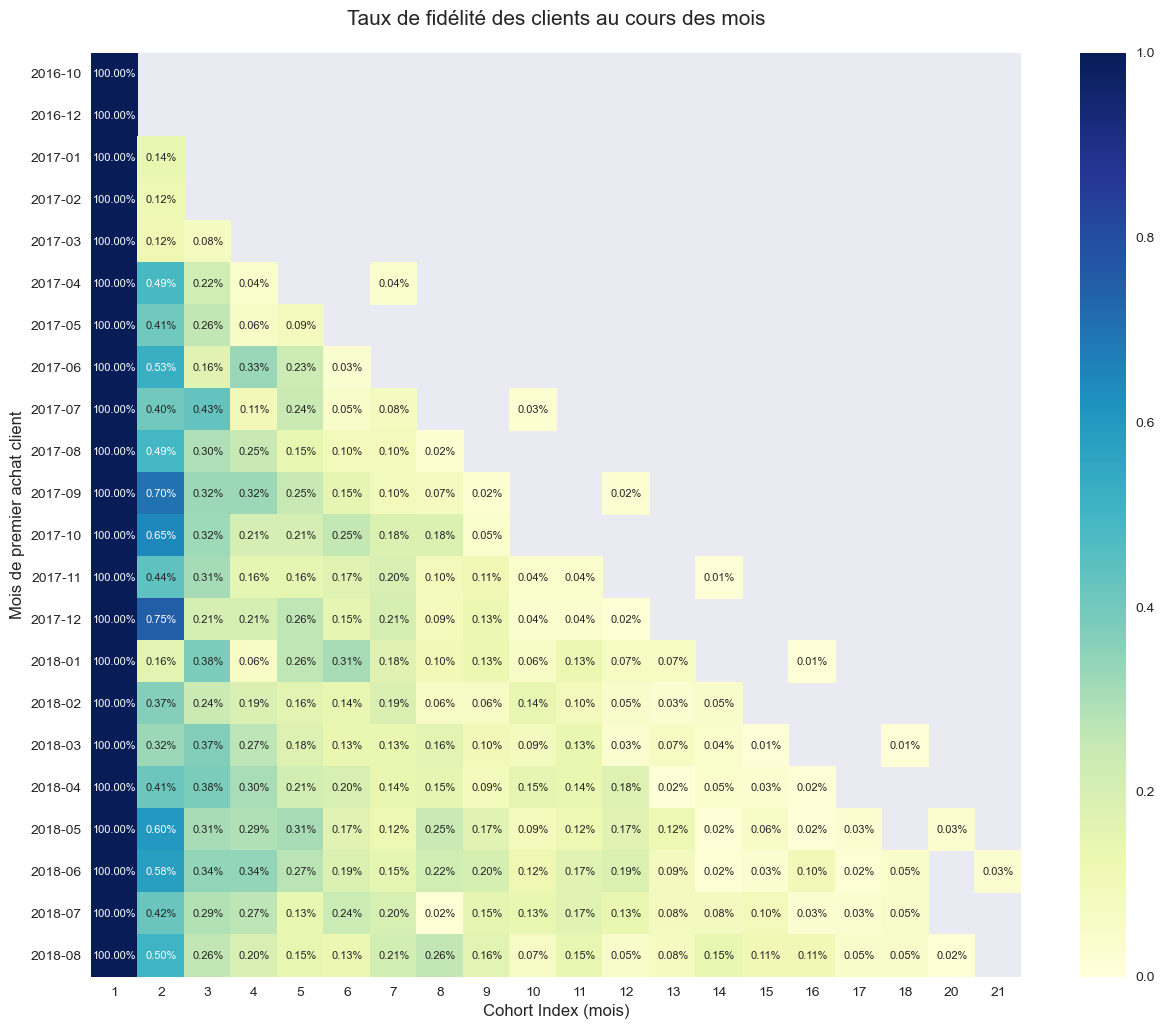

In [307]:
# On utilise une heatmap seaborn pour mettre en évidence ces chiffres qui caractérisent "la fidélité des clients"
plt.figure(figsize=(15, 12))

graph_ca_retention_rate = sns.heatmap(
    data=cohort_retention_rate,
    annot=True,
    annot_kws={"size":8},
    fmt='.2f',
    cmap='YlGnBu',
    vmin=0, vmax=1
)

for text in graph_ca_retention_rate.texts: text.set_text(text.get_text() + "%")
plt.title("Taux de fidélité des clients au cours des mois", fontsize=15, pad=20)
months_order = [date[:-3] for date in cohort_retention_rate.index.astype(str).tolist()]
graph_ca_retention_rate.set_yticklabels(months_order)
plt.xlabel("Cohort Index (mois)", fontsize=12)
plt.ylabel("Mois de premier achat client", fontsize=12)

plt.show()

#### 2ème métrique : Moyenne de commande en utilisant les cohortes clients par mois


In [308]:
# On réutilise en groupby similaire même avec la colonne 'payment_value'
gb_order_month_index_payment_value = df_cohort_analysis.groupby([
    'order_month_ca',
    'index_ca'
])['payment_value'].mean().reset_index()

In [309]:
display(gb_order_month_index_payment_value.head())

order_month_ca  index_ca  payment_value
0     2016-10-01         1     175.723434
1     2016-12-01         1      19.620000
2     2017-01-01         1     170.261749
3     2017-01-01         2      19.620000
4     2017-02-01         1     164.256560

In [310]:
# On affiche le résultat via un pivot_table
customer_payment_value_ca = gb_order_month_index_payment_value.pivot_table(
    index='order_month_ca',
    columns='index_ca',
    values='payment_value',
)
display(customer_payment_value_ca.round(2))

index_ca            1       2       3       4       5       6       7   \
order_month_ca                                                           
2016-10-01      175.72     NaN     NaN     NaN     NaN     NaN     NaN   
2016-12-01       19.62     NaN     NaN     NaN     NaN     NaN     NaN   
2017-01-01      170.26   19.62     NaN     NaN     NaN     NaN     NaN   
2017-02-01      164.26   55.54     NaN     NaN     NaN     NaN     NaN   
2017-03-01      162.84  160.56   57.35     NaN     NaN     NaN     NaN   
2017-04-01      170.12  135.30  114.13   89.70     NaN     NaN  111.30   
2017-05-01      159.80  195.80  193.01   59.36   82.08     NaN     NaN   
2017-06-01      156.63  113.62  156.73  153.01  164.57   69.33     NaN   
2017-07-01      146.21  135.12  178.60  151.64  134.89   37.11  149.48   
2017-08-01      153.78  139.57  164.77  183.57  193.05  358.35  172.23   
2017-09-01      169.49  174.37  100.58  114.22  121.90  201.39  172.30   
2017-10-01      168.25  130.69  139.31  128.48  143.44  136.54  231.54   
2017-11-01      158.60  134.65  144.66   92.24   98.57  132.96  187.64   
2017-12-01      152.80  192.34  149.40  110.76  125.37  233.21  145.58   
2018-01-01      152.58  215.45  147.01  144.61  179.23  125.38  212.77   
2018-02-01      147.67  158.73  120.17  132.41  135.18  158.15  155.39   
2018-03-01      160.50  137.48  147.44  108.43  177.01  156.45  118.59   
2018-04-01      167.05  113.26  162.70  170.91  139.96  135.36  122.54   
2018-05-01      167.79  130.51  153.34  185.19  133.16  186.84  125.93   
2018-06-01      166.12  236.50  179.06  155.47  135.52  132.22  139.86   
2018-07-01      167.12  124.96  154.32  117.93  170.10  217.90  116.13   
2018-08-01      155.82  145.86  124.58  141.60   84.90   64.96  133.14   

index_ca            8       9       10      11      12      13      14  \
order_month_ca                                                           
2016-10-01         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2016-12-01         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-01-01         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-02-01         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-03-01         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-04-01         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-05-01         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-06-01         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-07-01         NaN     NaN  356.13     NaN     NaN     NaN     NaN   
2017-08-01      105.17     NaN     NaN     NaN     NaN     NaN     NaN   
2017-09-01       91.43   47.05     NaN     NaN   56.78     NaN     NaN   
2017-10-01      110.93  232.30     NaN     NaN     NaN     NaN     NaN   
2017-11-01      156.65  173.20  128.45  142.35     NaN     NaN  163.53   
2017-12-01      121.60  137.71  118.98  171.61   66.60     NaN     NaN   
2018-01-01      117.55  180.39  124.96   80.66   90.88  110.49     NaN   
2018-02-01       62.59   86.56  123.08  115.80  126.77  139.62  117.22   
2018-03-01      177.26   51.74   82.88  162.12  171.58  181.46  132.37   
2018-04-01       96.53  300.00  188.28  248.01  119.86  175.13   79.53   
2018-05-01      144.01  106.20  200.82  145.38  171.92  132.10  271.64   
2018-06-01      139.38  180.72   99.40  146.02  105.40  102.69   62.33   
2018-07-01      284.96  147.07  247.17  119.52  228.20  281.88  174.65   
2018-08-01      102.72  154.38  169.58  106.71  108.77  119.16   97.39   

index_ca            15      16      17      18      20     21  
order_month_ca                                                 
2016-10-01         NaN     NaN     NaN     NaN     NaN    NaN  
2016-12-01         NaN     NaN     NaN     NaN     NaN    NaN  
2017-01-01         NaN     NaN     NaN     NaN     NaN    NaN  
2017-02-01         NaN     NaN     NaN     NaN     NaN    NaN  
2017-03-01         NaN     NaN     NaN     NaN     NaN    NaN 

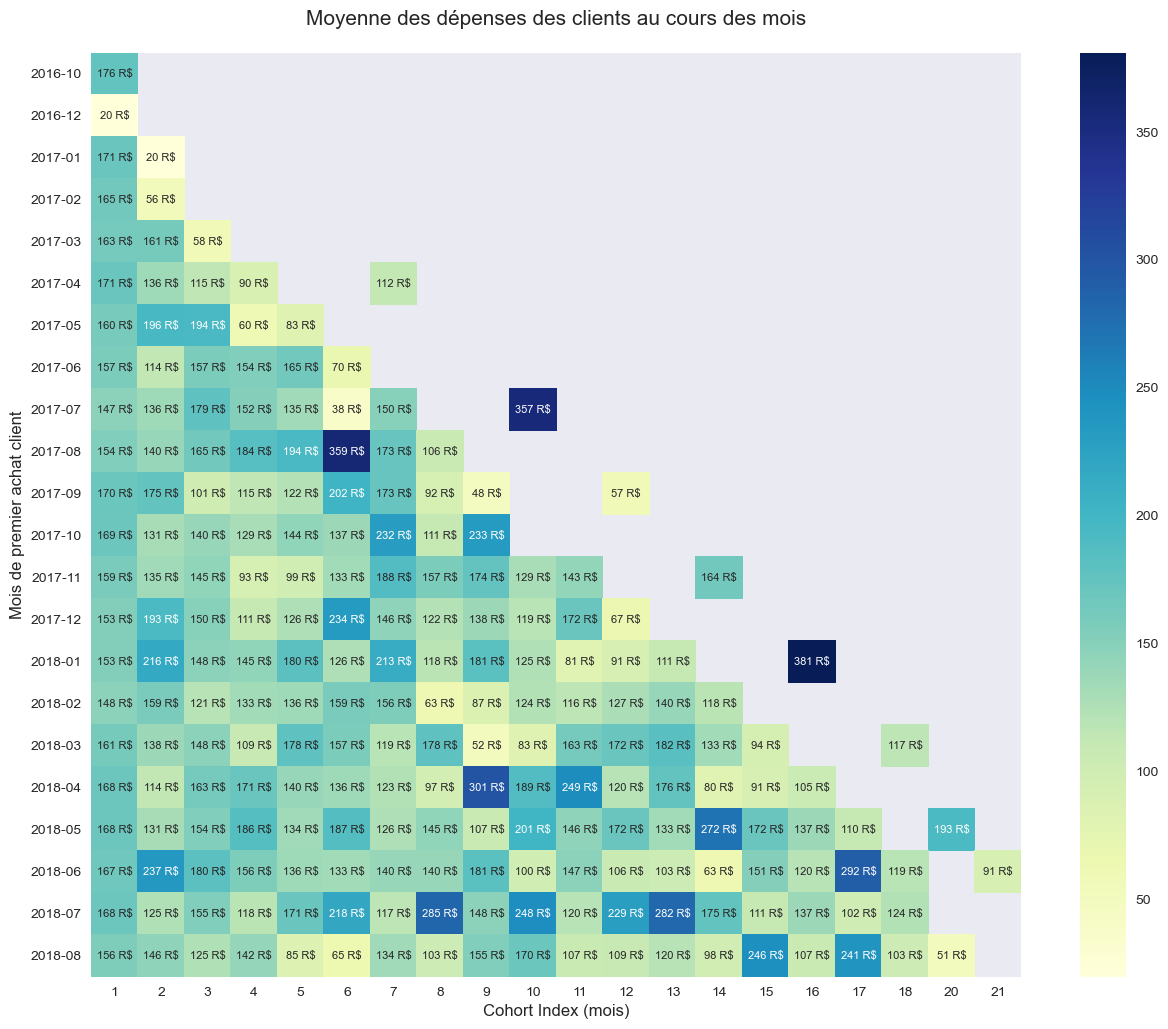

In [311]:
# On réutilise une heatmap pour aider à l'interprétation des valeurs
plt.figure(figsize=(15, 12))

graph_ca_retention_rate = sns.heatmap(
    data=customer_payment_value_ca.apply(np.ceil),
    annot=True,
    annot_kws={"size":8},
    fmt='.0f',
    cmap='YlGnBu',
    vmin=customer_payment_value_ca.min().min(), vmax=customer_payment_value_ca.max().max()
)

for text in graph_ca_retention_rate.texts: text.set_text(text.get_text() + " R$")
plt.title("Moyenne des dépenses des clients au cours des mois", fontsize=15, pad=20)
months_order = [date[:-3] for date in cohort_retention_rate.index.astype(str).tolist()]
graph_ca_retention_rate.set_yticklabels(months_order)
plt.xlabel("Cohort Index (mois)", fontsize=12)
plt.ylabel("Mois de premier achat client", fontsize=12)

plt.show()

### Enregistrement de df_merge03 pour analyse RFM

In [312]:
# On transforme les datetime64 au format datetime pandas
date_cols = [col for col in df_merge03.columns if 'datetime64' in str(df_merge03[col].dtype)]
date_cols.extend(['review_creation_date', 'review_answer_timestamp'])
print(date_cols)

['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp']


In [313]:
df_rfm_analysis = df_merge03.copy()

In [314]:
df_merge03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_estimated_delivery_date  99441 non-null  datetime64[ns]
 11  order_delivery_

In [315]:
df_rfm_analysis.to_csv(path + '/df_rfm_analysis.csv', index=False, sep='\t', encoding='utf-8')

In [316]:
df_check_load2 = pd.read_csv(path + '/df_rfm_analysis.csv', sep='\t', encoding='utf-8', parse_dates=date_cols)
df_rfm_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_estimated_delivery_date  99441 non-null  datetime64[ns]
 11  order_delivery_

In [317]:
df_rfm_analysis.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_estimated_delivery_date  order_delivery_time  \
0                    2017-06-05             8.812500   
1                    2018-02-06            16.661748   
2                    2018-06-13            26.077153   
3                    2018-04-10            14.998461   
4                    2018-08-15            11.461319   

  order_delivered_customer_date                         review_id  \
0           2017-05-25 10:35:35  88b8b52d46df026a9d1ad2136a59b30b   
1           2018-01-29 12:41:19  02fc48a9efa3e3d0f1a8ea26507eeec3   
2           2018-06-14 17:58:51  5ad6695d76ee186dc473c42706984d87   
3           2018-03-28 16:04:25  059a801bb31f6aab2266e672cab87bc5   
4           2018-08-09 20:55:48  8490879d58d6c5d7773f2739a03f089a   

   review_score review_comment_title  \
0           4.0                  NaN   
1           5.0                  NaN   
2           5.0                  NaN   
3           5.0                  NaN   
4           5.0        a melhor nota   

                          review_comment_message review_creation_date  \
0                                            NaN  2017-05-26 00:00:00   
1                                            NaN  2018-01-30 00:00:00   
2                                            NaN  2018-06-15 00:00:00   
3                                            NaN  2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon  2018-08-10 00:00:00   

  review_answer_timestamp  payment_sequential  payment_installments  \
0     2017-05-30 22:34:40                 1.0                   2.0   
1     2018-02-10 22:43:29                 1.0                   8.0   
2     2018-06-15 12:10:59                 1.0                   7.0   
3     2018-04-02 18:36:47                 1.0                   1.0   
4     2018-08-17 01:59:52                 1.0                   8.0   

   payment_value  payment_type_boleto  payment_type_credit_card  \
0         146.87                  0.0                       1.0   
1         335.48                  0.0                       1.0   
2         157.73                  0.0                       1.0   
3         173.30                  0.0                       1.0   
4         252.25                  0.0                       1.0   

   payment_type_debit_card  payment_type_voucher  
0                      0.0                   0.0  
1                 